In [17]:
import numpy as np
import pandas as pd
from ziff.stats import BinnedStatistic

filename = '~/temp/shapes_2019_09_17_fid1.hdf'

# Get histogram
shapes = pd.read_hdf(filename)
bs = BinnedStatistic(shapes,groupby=['ccd'])
bins_u, bins_v, hist = bs.get_spatial_bs('T_data', norm_key = 'T_data', statistic = 'median',nbins=100) # Histogram on the size
# care of Nans if there are some
hist[np.isnan((hist))] = 1

# Do the interpolation
from scipy.interpolate import RegularGridInterpolator
interp = RegularGridInterpolator((bins_u[0:-1],bins_v[0:-1]), hist, bounds_error=False, fill_value=1)

# Saving
import pickle
with open('/Users/graziani/temp/interpolator.pkl', 'wb') as f:
    pickle.dump(interp, f)


<IPython.core.display.Javascript object>


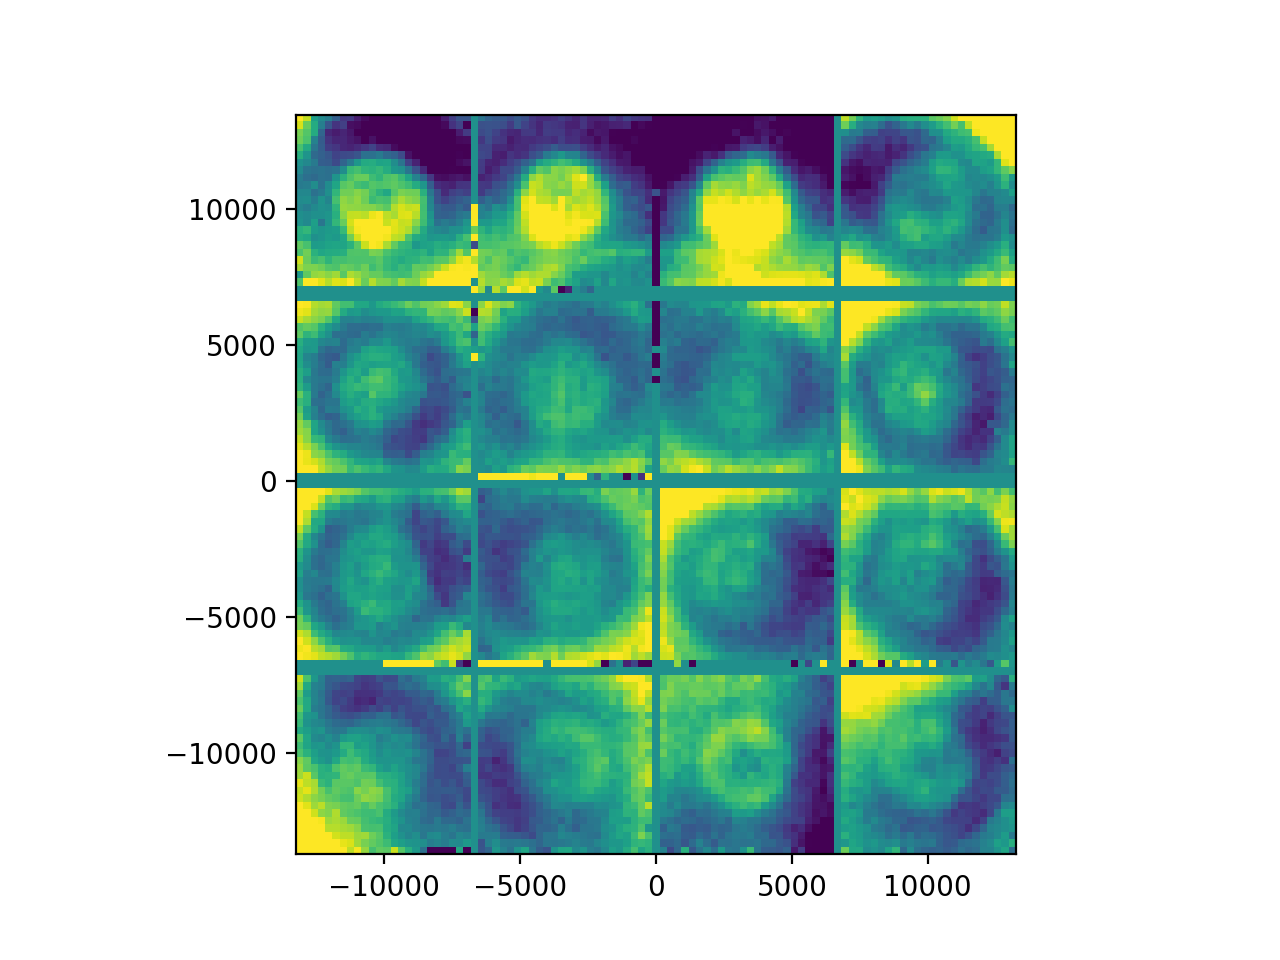

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(hist.T, origin = 'lower', extent = (bins_u[0], bins_u[-1], bins_v[0], bins_v[-1]),vmin=0.98, vmax = 1.02)

# WITH MAP

In [9]:
from ztfquery.query import ZTFQuery
zquery = ZTFQuery()
zquery.load_metadata(sql_query = "ccdid=7 and fid=1 and obsjd BETWEEN 2458543.9 AND 2458544")


In [10]:
zquery.metatable

,ra,dec,infobits,field,ccdid,qid,rcid,fid,filtercode,pid,...,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,ipac_pub_date,ipac_gid
0,208.543856,-11.230473,0,374,7,3,26,1,zg,789481062615,...,208.985202,-10.798164,208.105416,-10.795479,208.101440,-11.661835,208.983621,-11.664786,2019-12-11 00:00:00+00,1
1,208.546661,-10.363731,0,374,7,2,25,1,zg,789481062515,...,208.986732,-9.931451,208.109506,-9.929001,208.105414,-10.795472,208.985237,-10.798157,2019-12-11 00:00:00+00,1
2,209.425366,-10.365166,0,374,7,1,24,1,zg,789481062415,...,209.864023,-9.931860,208.986791,-9.931419,208.985253,-10.798146,209.865058,-10.798383,2019-12-11 00:00:00+00,1
3,209.425043,-11.231947,0,374,7,4,27,1,zg,789481062715,...,209.865066,-10.798394,208.985248,-10.798166,208.983638,-11.664792,209.865862,-11.664889,2019-12-11 00:00:00+00,1
4,221.601111,10.363755,0,530,7,4,27,1,zg,789481572715,...,222.039866,10.797876,221.160064,10.795612,221.163577,9.929144,222.040680,9.931525,2019-12-11 00:00:00+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,258.419766,31.957635,33554432,681,7,4,27,1,zg,789499392715,...,258.928818,32.392048,257.905414,32.387589,257.915494,31.521284,258.929022,31.525842,2099-12-31 00:00:00+00,2
152,250.561209,32.825513,33554432,680,7,1,24,1,zg,789499842415,...,251.074991,33.259787,250.041731,33.255338,250.052191,32.388958,251.075563,32.393510,2099-12-31 00:00:00+00,2
153,249.548016,31.950413,0,680,7,3,26,1,zg,789499842615,...,250.052152,32.388963,249.028918,32.376072,249.049045,31.510160,250.062346,31.522680,2099-12-31 00:00:00+00,2
154,250.566588,31.959065,0,680,7,4,27,1,zg,789499842715,...,251.075567,32.393504,250.052166,32.388977,250.062353,31.522651,251.075867,31.527299,2099-12-31 00:00:00+00,2


In [13]:
import ziff.ziff 
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

z = ziff.ziff.ZiffCollection.from_zquery(zquery, groupby=['qid','filefracday'],build_default_cat = False, load_default_cat = False)


04:18:41 INFO:test


In [ ]:
z.eval_func('load_default_catalog')
z.eval_func('set_config_value',key_path = 'psf,interp,order',value=3)
z.eval_func('set_config_value',key_path = 'psf,outliers,max_remove',value=20)
z.eval_func('set_config_value',key_path='psf,interp,type',value='BasisPolynomialPlusMap')
z.eval_func('set_config_value',key_path = 'psf,interp,interpolation_map_file',value='/Users/graziani/temp/interpolator.pkl')
z.eval_func('run_piff', catalog = 'gaia_calibration', overwrite_cat=True)


Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Catalogs not found
Buildi

04:18:47 INFO:Loading KWallet
04:18:47 INFO:Loading SecretService
04:18:47 INFO:Loading Windows
04:18:47 INFO:Loading chainer
04:18:47 INFO:Loading macOS


Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default catalogs
Loading default catalogs
Catalogs not found
Building default cata

/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))
04:23:29 INFO:Reading in 1 images
04:23:29 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_sciimg.fits
04:23:29 INFO:Setting pointing from keywords TELRA, TELDEC
04:23:29 INFO:Setting pointing to: 13.995 h, -9.850 d
04:23:29 INFO:Reading in 1 images
04:23:29 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_z

04:25:32 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482963/ztf_20190301482963_000476_zg_c07_o_q1_sciimg.fits
04:25:32 INFO:Setting pointing from keywords TELRA, TELDEC
04:25:32 INFO:Setting pointing to: 13.729 h, 4.550 d
04:25:33 INFO:Reading in 1 images
04:25:33 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482963/ztf_20190301482963_000476_zg_c07_o_q1_sciimg.fits
04:25:33 INFO:Setting pointing from keywords TELRA, TELDEC
04:25:33 INFO:Setting pointing to: 13.729 h, 4.550 d
04:25:33 WARNING:Iteration 1: Fitting 195 stars
04:25:41 INFO:Beginning solution of matrix size (3150, 3150)
04:25:41 INFO:Ill-conditioned matrix (rcond=1.69749e-34): result may not be accurate.
04:25:42 WARNING:             Total chisq = 19385.14 / 43797 dof
04:25:42 WARNING:Iteration 2: Fitting 195 stars
04:25:50 INFO:Beginning solution of matrix size (3150, 3150)
04:25:50 INFO:Ill-conditioned matrix (rcond=1.70674e-34): result may not be accurate.
04:25

04:27:29 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/485243/ztf_20190301485243_000717_zg_c07_o_q1_sciimg.fits
04:27:29 INFO:Setting pointing from keywords TELRA, TELDEC
04:27:29 INFO:Setting pointing to: 13.391 h, 40.550 d
04:27:29 INFO:Reading in 1 images
04:27:29 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/485243/ztf_20190301485243_000717_zg_c07_o_q1_sciimg.fits
04:27:29 INFO:Setting pointing from keywords TELRA, TELDEC
04:27:29 INFO:Setting pointing to: 13.391 h, 40.550 d
04:27:29 WARNING:Iteration 1: Fitting 120 stars
04:27:34 INFO:Beginning solution of matrix size (3150, 3150)
04:27:34 INFO:Ill-conditioned matrix (rcond=1.9676e-34): result may not be accurate.
04:27:35 WARNING:             Total chisq = 9486.52 / 26922 dof
04:27:35 WARNING:Iteration 2: Fitting 120 stars
04:27:39 INFO:Beginning solution of matrix size (3150, 3150)
04:27:40 INFO:Ill-conditioned matrix (rcond=1.97697e-34): result may not be accurate.
04:27

04:29:01 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/487315/ztf_20190301487315_000845_zg_c07_o_q1_sciimg.fits
04:29:01 INFO:Setting pointing from keywords TELRA, TELDEC
04:29:01 INFO:Setting pointing to: 14.286 h, 69.350 d
04:29:01 INFO:Reading in 1 images
04:29:01 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/487315/ztf_20190301487315_000845_zg_c07_o_q1_sciimg.fits
04:29:01 INFO:Setting pointing from keywords TELRA, TELDEC
04:29:01 INFO:Setting pointing to: 14.286 h, 69.350 d
04:29:01 WARNING:Iteration 1: Fitting 200 stars
04:29:10 INFO:Beginning solution of matrix size (3150, 3150)
04:29:10 INFO:Ill-conditioned matrix (rcond=1.65083e-34): result may not be accurate.
04:29:11 WARNING:             Total chisq = 27142.42 / 44452 dof
04:29:11 WARNING:Iteration 2: Fitting 200 stars
04:29:19 INFO:Beginning solution of matrix size (3150, 3150)
04:29:20 INFO:Ill-conditioned matrix (rcond=1.65093e-34): result may not be accurate.
04:

04:30:54 INFO:Setting pointing to: 14.540 h, 40.550 d
04:30:54 INFO:Reading in 1 images
04:30:54 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/489178/ztf_20190301489178_000719_zg_c07_o_q1_sciimg.fits
04:30:54 INFO:Setting pointing from keywords TELRA, TELDEC
04:30:54 INFO:Setting pointing to: 14.540 h, 40.550 d
04:30:54 WARNING:Iteration 1: Fitting 172 stars
04:31:01 INFO:Beginning solution of matrix size (3150, 3150)
04:31:02 INFO:Ill-conditioned matrix (rcond=2.73448e-34): result may not be accurate.
04:31:02 WARNING:             Total chisq = 7641.45 / 38542 dof
04:31:02 WARNING:Iteration 2: Fitting 172 stars
04:31:10 INFO:Beginning solution of matrix size (3150, 3150)
04:31:11 INFO:Ill-conditioned matrix (rcond=2.75912e-34): result may not be accurate.
04:31:11 INFO:Found 3 stars with chisq > thresh
04:31:11 INFO:             Removed 3 outliers
04:31:11 WARNING:             Total chisq = 6029.06 / 37875 dof
04:31:11 WARNING:Iteration 3: Fitting 169 star

04:32:43 INFO:Setting pointing from keywords TELRA, TELDEC
04:32:43 INFO:Setting pointing to: 15.556 h, 62.150 d
04:32:43 WARNING:Iteration 1: Fitting 200 stars
04:32:51 INFO:Beginning solution of matrix size (3150, 3150)
04:32:52 INFO:Ill-conditioned matrix (rcond=8.73708e-35): result may not be accurate.
04:32:52 WARNING:             Total chisq = 9466.54 / 44622 dof
04:32:52 WARNING:Iteration 2: Fitting 200 stars
04:33:01 INFO:Beginning solution of matrix size (3150, 3150)
04:33:01 INFO:Ill-conditioned matrix (rcond=8.73434e-35): result may not be accurate.
04:33:02 INFO:Found 5 stars with chisq > thresh
04:33:02 INFO:             Removed 5 outliers
04:33:02 WARNING:             Total chisq = 6663.08 / 43526 dof
04:33:02 WARNING:Iteration 3: Fitting 195 stars
04:33:11 INFO:Beginning solution of matrix size (3150, 3150)
04:33:11 INFO:Ill-conditioned matrix (rcond=9.13086e-35): result may not be accurate.
04:33:12 WARNING:             Total chisq = 6444.95 / 43526 dof
/Users/graziani/

04:34:47 INFO:Ill-conditioned matrix (rcond=2.40434e-35): result may not be accurate.
04:34:48 WARNING:             Total chisq = 20710.55 / 44798 dof
04:34:48 WARNING:Iteration 2: Fitting 200 stars
04:34:57 INFO:Beginning solution of matrix size (3150, 3150)
04:34:57 INFO:Ill-conditioned matrix (rcond=2.40738e-35): result may not be accurate.
04:34:58 INFO:Found 7 stars with chisq > thresh
04:34:58 INFO:             Removed 7 outliers
04:34:58 WARNING:             Total chisq = 6002.80 / 43223 dof
04:34:58 WARNING:Iteration 3: Fitting 193 stars


In [17]:
#z.eval_func('set_config_value', key_path = 'i/o,nstars', value = 10000)
#stars = z.eval_func('make_stars',catalog = 'gaia_full',overwrite_cat=False,append_df_keys = ['RPmag','BPmag','Gmag','colormag','sky','xpos','ypos'])
new_stars = z.eval_func_stars('reflux_stars',stars,fit_center=False, which='piff')
shapes = z.eval_func_stars('compute_shapes',new_stars)




03:28:32 INFO:Reading in 1 images
03:28:32 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_sciimg.fits
03:28:32 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:32 INFO:Setting pointing to: 13.995 h, -9.850 d


Processing 1/928 Processing 2/928 Processing 3/928 Processing 4/928 Processing 5/928 Processing 6/928 Processing 7/928 Processing 8/928 Processing 9/928 Processing 10/928 Processing 11/928 Processing 12/928 Processing 13/928 Processing 14/928 Processing 15/928 Processing 16/928 Processing 17/928 Processing 18/928 Processing 19/928 Processing 20/928 Processing 21/928 Processing 22/928 Processing 23/928 Processing 24/928 Processing 25/928 Processing 26/928 Processing 27/928 Processing 28/928 Processing 29/928 Processing 30/928 Processing 31/928 Processing 32/928 Processing 33/928 Processing 34/928 Processing 35/928 Processing 36/928 Processing 37/928 Processing 38/928 Processing 39/928 Processing 40/928 Processing 41/928 Processing 42/928 Processing 43/928 Processing 44/928 Processing 45/928 Processing 46/928 Processing 47/928 Processing 48/928 Processing 49/928 Processing 50/928 Processing 51/928 Processing 52/928 Processing 53/928 Processing 54/928 Processing 55/928 Processing 56/928 P

Processing 472/928 Processing 473/928 Processing 474/928 Processing 475/928 Processing 476/928 Processing 477/928 Processing 478/928 Processing 479/928 Processing 480/928 Processing 481/928 Processing 482/928 Processing 483/928 Processing 484/928 Processing 485/928 Processing 486/928 Processing 487/928 Processing 488/928 Processing 489/928 Processing 490/928 Processing 491/928 Processing 492/928 Processing 493/928 Processing 494/928 Processing 495/928 Processing 496/928 Processing 497/928 Processing 498/928 Processing 499/928 Processing 500/928 Processing 501/928 Processing 502/928 Processing 503/928 Processing 504/928 Processing 505/928 Processing 506/928 Processing 507/928 Processing 508/928 Processing 509/928 Processing 510/928 Processing 511/928 Processing 512/928 Processing 513/928 Processing 514/928 Processing 515/928 Processing 516/928 Processing 517/928 Processing 518/928 Processing 519/928 Processing 520/928 Processing 521/928 Processing 522/928 Processing 523/928 Processing 5

03:28:36 INFO:Reading in 1 images
03:28:36 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c07_o_q1_sciimg.fits
03:28:36 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:36 INFO:Setting pointing to: 14.807 h, 11.750 d


Processing 906/928 Processing 907/928 Processing 908/928 Processing 909/928 Processing 910/928 Processing 911/928 Processing 912/928 Processing 913/928 Processing 914/928 Processing 915/928 Processing 916/928 Processing 917/928 Processing 918/928 Processing 919/928 Processing 920/928 Processing 921/928 Processing 922/928 Processing 923/928 Processing 924/928 Processing 925/928 Processing 926/928 Processing 927/928 Processing 928/928 Processing 1/703 Processing 2/703 Processing 3/703 Processing 4/703 Processing 5/703 Processing 6/703 Processing 7/703 Processing 8/703 Processing 9/703 Processing 10/703 Processing 11/703 Processing 12/703 Processing 13/703 Processing 14/703 Processing 15/703 Processing 16/703 Processing 17/703 Processing 18/703 Processing 19/703 Processing 20/703 Processing 21/703 Processing 22/703 Processing 23/703 Processing 24/703 Processing 25/703 Processing 26/703 Processing 27/703 Processing 28/703 Processing 29/703 Processing 30/703 Processing 31/703 Processing 32/

Processing 439/703 Processing 440/703 Processing 441/703 Processing 442/703 Processing 443/703 Processing 444/703 Processing 445/703 Processing 446/703 Processing 447/703 Processing 448/703 Processing 449/703 Processing 450/703 Processing 451/703 Processing 452/703 Processing 453/703 Processing 454/703 Processing 455/703 Processing 456/703 Processing 457/703 Processing 458/703 Processing 459/703 Processing 460/703 Processing 461/703 Processing 462/703 Processing 463/703 Processing 464/703 Processing 465/703 Processing 466/703 Processing 467/703 Processing 468/703 Processing 469/703 Processing 470/703 Processing 471/703 Processing 472/703 Processing 473/703 Processing 474/703 Processing 475/703 Processing 476/703 Processing 477/703 Processing 478/703 Processing 479/703 Processing 480/703 Processing 481/703 Processing 482/703 Processing 483/703 Processing 484/703 Processing 485/703 Processing 486/703 Processing 487/703 Processing 488/703 Processing 489/703 Processing 490/703 Processing 4

03:28:39 INFO:Reading in 1 images
03:28:39 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482025/ztf_20190301482025_000529_zg_c07_o_q1_sciimg.fits
03:28:39 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:39 INFO:Setting pointing to: 14.342 h, 11.750 d


Processing 677/703 Processing 678/703 Processing 679/703 Processing 680/703 Processing 681/703 Processing 682/703 Processing 683/703 Processing 684/703 Processing 685/703 Processing 686/703 Processing 687/703 Processing 688/703 Processing 689/703 Processing 690/703 Processing 691/703 Processing 692/703 Processing 693/703 Processing 694/703 Processing 695/703 Processing 696/703 Processing 697/703 Processing 698/703 Processing 699/703 Processing 700/703 Processing 701/703 Processing 702/703 Processing 703/703 Processing 1/629 Processing 2/629 Processing 3/629 Processing 4/629 Processing 5/629 Processing 6/629 Processing 7/629 Processing 8/629 Processing 9/629 Processing 10/629 Processing 11/629 Processing 12/629 Processing 13/629 Processing 14/629 Processing 15/629 Processing 16/629 Processing 17/629 Processing 18/629 Processing 19/629 Processing 20/629 Processing 21/629 Processing 22/629 Processing 23/629 Processing 24/629 Processing 25/629 Processing 26/629 Processing 27/629 Processing

Processing 453/629 Processing 454/629 Processing 455/629 Processing 456/629 Processing 457/629 Processing 458/629 Processing 459/629 Processing 460/629 Processing 461/629 Processing 462/629 Processing 463/629 Processing 464/629 Processing 465/629 Processing 466/629 Processing 467/629 Processing 468/629 Processing 469/629 Processing 470/629 Processing 471/629 Processing 472/629 Processing 473/629 Processing 474/629 Processing 475/629 Processing 476/629 Processing 477/629 Processing 478/629 Processing 479/629 Processing 480/629 Processing 481/629 Processing 482/629 Processing 483/629 Processing 484/629 Processing 485/629 Processing 486/629 Processing 487/629 Processing 488/629 Processing 489/629 Processing 490/629 Processing 491/629 Processing 492/629 Processing 493/629 Processing 494/629 Processing 495/629 Processing 496/629 Processing 497/629 Processing 498/629 Processing 499/629 Processing 500/629 Processing 501/629 Processing 502/629 Processing 503/629 Processing 504/629 Processing 5

03:28:42 INFO:Reading in 1 images
03:28:42 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482477/ztf_20190301482477_000425_zg_c07_o_q1_sciimg.fits
03:28:42 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:42 INFO:Setting pointing to: 13.762 h, -2.650 d


Processing 604/629 Processing 605/629 Processing 606/629 Processing 607/629 Processing 608/629 Processing 609/629 Processing 610/629 Processing 611/629 Processing 612/629 Processing 613/629 Processing 614/629 Processing 615/629 Processing 616/629 Processing 617/629 Processing 618/629 Processing 619/629 Processing 620/629 Processing 621/629 Processing 622/629 Processing 623/629 Processing 624/629 Processing 625/629 Processing 626/629 Processing 627/629 Processing 628/629 Processing 629/629 Processing 1/652 Processing 2/652 Processing 3/652 Processing 4/652 Processing 5/652 Processing 6/652 Processing 7/652 Processing 8/652 Processing 9/652 Processing 10/652 Processing 11/652 Processing 12/652 Processing 13/652 Processing 14/652 Processing 15/652 Processing 16/652 Processing 17/652 Processing 18/652 Processing 19/652 Processing 20/652 Processing 21/652 Processing 22/652 Processing 23/652 Processing 24/652 Processing 25/652 Processing 26/652 Processing 27/652 Processing 28/652 Processing 

Processing 459/652 Processing 460/652 Processing 461/652 Processing 462/652 Processing 463/652 Processing 464/652 Processing 465/652 Processing 466/652 Processing 467/652 Processing 468/652 Processing 469/652 Processing 470/652 Processing 471/652 Processing 472/652 Processing 473/652 Processing 474/652 Processing 475/652 Processing 476/652 Processing 477/652 Processing 478/652 Processing 479/652 Processing 480/652 Processing 481/652 Processing 482/652 Processing 483/652 Processing 484/652 Processing 485/652 Processing 486/652 Processing 487/652 Processing 488/652 Processing 489/652 Processing 490/652 Processing 491/652 Processing 492/652 Processing 493/652 Processing 494/652 Processing 495/652 Processing 496/652 Processing 497/652 Processing 498/652 Processing 499/652 Processing 500/652 Processing 501/652 Processing 502/652 Processing 503/652 Processing 504/652 Processing 505/652 Processing 506/652 Processing 507/652 Processing 508/652 Processing 509/652 Processing 510/652 Processing 5

03:28:44 INFO:Reading in 1 images


Processing 610/652 Processing 611/652 Processing 612/652 Processing 613/652 Processing 614/652 Processing 615/652 Processing 616/652 Processing 617/652 Processing 618/652 Processing 619/652 Processing 620/652 Processing 621/652 Processing 622/652 Processing 623/652 Processing 624/652 Processing 625/652 Processing 626/652 Processing 627/652 Processing 628/652 Processing 629/652 Processing 630/652 Processing 631/652 Processing 632/652 Processing 633/652 Processing 634/652 Processing 635/652 Processing 636/652 Processing 637/652 Processing 638/652 Processing 639/652 Processing 640/652 Processing 641/652 Processing 642/652 Processing 643/652 Processing 644/652 Processing 645/652 Processing 646/652 Processing 647/652 Processing 648/652 Processing 649/652 Processing 650/652 Processing 651/652 Processing 652/652 

03:28:44 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482963/ztf_20190301482963_000476_zg_c07_o_q1_sciimg.fits
03:28:44 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:44 INFO:Setting pointing to: 13.729 h, 4.550 d


Processing 1/595 Processing 2/595 Processing 3/595 Processing 4/595 Processing 5/595 Processing 6/595 Processing 7/595 Processing 8/595 Processing 9/595 Processing 10/595 Processing 11/595 Processing 12/595 Processing 13/595 Processing 14/595 Processing 15/595 Processing 16/595 Processing 17/595 Processing 18/595 Processing 19/595 Processing 20/595 Processing 21/595 Processing 22/595 Processing 23/595 Processing 24/595 Processing 25/595 Processing 26/595 Processing 27/595 Processing 28/595 Processing 29/595 Processing 30/595 Processing 31/595 Processing 32/595 Processing 33/595 Processing 34/595 Processing 35/595 Processing 36/595 Processing 37/595 Processing 38/595 Processing 39/595 Processing 40/595 Processing 41/595 Processing 42/595 Processing 43/595 Processing 44/595 Processing 45/595 Processing 46/595 Processing 47/595 Processing 48/595 Processing 49/595 Processing 50/595 Processing 51/595 Processing 52/595 Processing 53/595 Processing 54/595 Processing 55/595 Processing 56/595 P

Processing 448/595 Processing 449/595 Processing 450/595 Processing 451/595 Processing 452/595 Processing 453/595 Processing 454/595 Processing 455/595 Processing 456/595 Processing 457/595 Processing 458/595 Processing 459/595 Processing 460/595 Processing 461/595 Processing 462/595 Processing 463/595 Processing 464/595 Processing 465/595 Processing 466/595 Processing 467/595 Processing 468/595 Processing 469/595 Processing 470/595 Processing 471/595 Processing 472/595 Processing 473/595 Processing 474/595 Processing 475/595 Processing 476/595 Processing 477/595 Processing 478/595 Processing 479/595 Processing 480/595 Processing 481/595 Processing 482/595 Processing 483/595 Processing 484/595 Processing 485/595 Processing 486/595 Processing 487/595 Processing 488/595 Processing 489/595 Processing 490/595 Processing 491/595 Processing 492/595 Processing 493/595 Processing 494/595 Processing 495/595 Processing 496/595 Processing 497/595 Processing 498/595 Processing 499/595 Processing 5

03:28:47 INFO:Reading in 1 images
03:28:47 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
03:28:47 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:47 INFO:Setting pointing to: 13.931 h, 18.950 d


Processing 1/459 Processing 2/459 Processing 3/459 Processing 4/459 Processing 5/459 Processing 6/459 Processing 7/459 Processing 8/459 Processing 9/459 Processing 10/459 Processing 11/459 Processing 12/459 Processing 13/459 Processing 14/459 Processing 15/459 Processing 16/459 Processing 17/459 Processing 18/459 Processing 19/459 Processing 20/459 Processing 21/459 Processing 22/459 Processing 23/459 Processing 24/459 Processing 25/459 Processing 26/459 Processing 27/459 Processing 28/459 Processing 29/459 Processing 30/459 Processing 31/459 Processing 32/459 Processing 33/459 Processing 34/459 Processing 35/459 Processing 36/459 Processing 37/459 Processing 38/459 Processing 39/459 Processing 40/459 Processing 41/459 Processing 42/459 Processing 43/459 Processing 44/459 Processing 45/459 Processing 46/459 Processing 47/459 Processing 48/459 Processing 49/459 Processing 50/459 Processing 51/459 Processing 52/459 Processing 53/459 Processing 54/459 Processing 55/459 Processing 56/459 P

03:28:49 INFO:Reading in 1 images
03:28:49 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/484329/ztf_20190301484329_000528_zg_c07_o_q1_sciimg.fits
03:28:49 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:49 INFO:Setting pointing to: 13.877 h, 11.750 d


Processing 442/459 Processing 443/459 Processing 444/459 Processing 445/459 Processing 446/459 Processing 447/459 Processing 448/459 Processing 449/459 Processing 450/459 Processing 451/459 Processing 452/459 Processing 453/459 Processing 454/459 Processing 455/459 Processing 456/459 Processing 457/459 Processing 458/459 Processing 459/459 Processing 1/543 Processing 2/543 Processing 3/543 Processing 4/543 Processing 5/543 Processing 6/543 Processing 7/543 Processing 8/543 Processing 9/543 Processing 10/543 Processing 11/543 Processing 12/543 Processing 13/543 Processing 14/543 Processing 15/543 Processing 16/543 Processing 17/543 Processing 18/543 Processing 19/543 Processing 20/543 Processing 21/543 Processing 22/543 Processing 23/543 Processing 24/543 Processing 25/543 Processing 26/543 Processing 27/543 Processing 28/543 Processing 29/543 Processing 30/543 Processing 31/543 Processing 32/543 Processing 33/543 Processing 34/543 Processing 35/543 Processing 36/543 Processing 37/543 P

Processing 464/543 Processing 465/543 Processing 466/543 Processing 467/543 Processing 468/543 Processing 469/543 Processing 470/543 Processing 471/543 Processing 472/543 Processing 473/543 Processing 474/543 Processing 475/543 Processing 476/543 Processing 477/543 Processing 478/543 Processing 479/543 Processing 480/543 Processing 481/543 Processing 482/543 Processing 483/543 Processing 484/543 Processing 485/543 Processing 486/543 Processing 487/543 Processing 488/543 Processing 489/543 Processing 490/543 Processing 491/543 Processing 492/543 Processing 493/543 Processing 494/543 Processing 495/543 Processing 496/543 Processing 497/543 Processing 498/543 Processing 499/543 Processing 500/543 Processing 501/543 Processing 502/543 Processing 503/543 Processing 504/543 Processing 505/543 Processing 506/543 

03:28:51 INFO:Reading in 1 images
03:28:51 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/484792/ztf_20190301484792_000527_zg_c07_o_q1_sciimg.fits
03:28:51 INFO:Setting pointing from keywords TELRA, TELDEC


Processing 507/543 Processing 508/543 Processing 509/543 Processing 510/543 Processing 511/543 Processing 512/543 Processing 513/543 Processing 514/543 Processing 515/543 Processing 516/543 Processing 517/543 Processing 518/543 Processing 519/543 Processing 520/543 Processing 521/543 Processing 522/543 Processing 523/543 Processing 524/543 Processing 525/543 Processing 526/543 Processing 527/543 Processing 528/543 Processing 529/543 Processing 530/543 Processing 531/543 Processing 532/543 Processing 533/543 Processing 534/543 Processing 535/543 Processing 536/543 Processing 537/543 Processing 538/543 Processing 539/543 Processing 540/543 Processing 541/543 Processing 542/543 Processing 543/543 

03:28:51 INFO:Setting pointing to: 13.402 h, 11.750 d


Processing 1/539 Processing 2/539 Processing 3/539 Processing 4/539 Processing 5/539 Processing 6/539 Processing 7/539 Processing 8/539 Processing 9/539 Processing 10/539 Processing 11/539 Processing 12/539 Processing 13/539 Processing 14/539 Processing 15/539 Processing 16/539 Processing 17/539 Processing 18/539 Processing 19/539 Processing 20/539 Processing 21/539 Processing 22/539 Processing 23/539 Processing 24/539 Processing 25/539 Processing 26/539 Processing 27/539 Processing 28/539 Processing 29/539 Processing 30/539 Processing 31/539 Processing 32/539 Processing 33/539 Processing 34/539 Processing 35/539 Processing 36/539 Processing 37/539 Processing 38/539 Processing 39/539 Processing 40/539 Processing 41/539 Processing 42/539 Processing 43/539 Processing 44/539 Processing 45/539 Processing 46/539 Processing 47/539 Processing 48/539 Processing 49/539 Processing 50/539 Processing 51/539 Processing 52/539 Processing 53/539 Processing 54/539 Processing 55/539 Processing 56/539 P

Processing 486/539 Processing 487/539 Processing 488/539 Processing 489/539 Processing 490/539 Processing 491/539 Processing 492/539 Processing 493/539 Processing 494/539 Processing 495/539 Processing 496/539 Processing 497/539 Processing 498/539 Processing 499/539 Processing 500/539 Processing 501/539 Processing 502/539 Processing 503/539 Processing 504/539 Processing 505/539 Processing 506/539 Processing 507/539 Processing 508/539 Processing 509/539 Processing 510/539 Processing 511/539 Processing 512/539 Processing 513/539 Processing 514/539 Processing 515/539 Processing 516/539 Processing 517/539 Processing 518/539 Processing 519/539 Processing 520/539 Processing 521/539 Processing 522/539 Processing 523/539 Processing 524/539 Processing 525/539 Processing 526/539 Processing 527/539 Processing 528/539 Processing 529/539 Processing 530/539 Processing 531/539 Processing 532/539 Processing 533/539 Processing 534/539 

03:28:53 INFO:Reading in 1 images
03:28:54 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/485243/ztf_20190301485243_000717_zg_c07_o_q1_sciimg.fits
03:28:54 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:54 INFO:Setting pointing to: 13.391 h, 40.550 d


Processing 535/539 Processing 536/539 Processing 537/539 Processing 538/539 Processing 539/539 Processing 1/394 Processing 2/394 Processing 3/394 Processing 4/394 Processing 5/394 Processing 6/394 Processing 7/394 Processing 8/394 Processing 9/394 Processing 10/394 Processing 11/394 Processing 12/394 Processing 13/394 Processing 14/394 Processing 15/394 Processing 16/394 Processing 17/394 Processing 18/394 Processing 19/394 Processing 20/394 Processing 21/394 Processing 22/394 Processing 23/394 Processing 24/394 Processing 25/394 Processing 26/394 Processing 27/394 Processing 28/394 Processing 29/394 Processing 30/394 Processing 31/394 Processing 32/394 Processing 33/394 Processing 34/394 Processing 35/394 Processing 36/394 Processing 37/394 Processing 38/394 Processing 39/394 Processing 40/394 Processing 41/394 Processing 42/394 Processing 43/394 Processing 44/394 Processing 45/394 Processing 46/394 Processing 47/394 Processing 48/394 Processing 49/394 Processing 50/394 Processing 51/

03:28:55 INFO:Reading in 1 images
03:28:55 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/485938/ztf_20190301485938_000718_zg_c07_o_q1_sciimg.fits
03:28:55 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:55 INFO:Setting pointing to: 13.966 h, 40.550 d


Processing 382/394 Processing 383/394 Processing 384/394 Processing 385/394 Processing 386/394 Processing 387/394 Processing 388/394 Processing 389/394 Processing 390/394 Processing 391/394 Processing 392/394 Processing 393/394 Processing 394/394 Processing 1/460 Processing 2/460 Processing 3/460 Processing 4/460 Processing 5/460 Processing 6/460 Processing 7/460 Processing 8/460 Processing 9/460 Processing 10/460 Processing 11/460 Processing 12/460 Processing 13/460 Processing 14/460 Processing 15/460 Processing 16/460 Processing 17/460 Processing 18/460 Processing 19/460 Processing 20/460 Processing 21/460 Processing 22/460 Processing 23/460 Processing 24/460 Processing 25/460 Processing 26/460 Processing 27/460 Processing 28/460 Processing 29/460 Processing 30/460 Processing 31/460 Processing 32/460 Processing 33/460 Processing 34/460 Processing 35/460 Processing 36/460 Processing 37/460 Processing 38/460 Processing 39/460 Processing 40/460 Processing 41/460 Processing 42/460 Proces

03:28:57 INFO:Reading in 1 images


Processing 417/460 Processing 418/460 Processing 419/460 Processing 420/460 Processing 421/460 Processing 422/460 Processing 423/460 Processing 424/460 Processing 425/460 Processing 426/460 Processing 427/460 Processing 428/460 Processing 429/460 Processing 430/460 Processing 431/460 Processing 432/460 Processing 433/460 Processing 434/460 Processing 435/460 Processing 436/460 Processing 437/460 Processing 438/460 Processing 439/460 Processing 440/460 Processing 441/460 Processing 442/460 Processing 443/460 Processing 444/460 Processing 445/460 Processing 446/460 Processing 447/460 Processing 448/460 Processing 449/460 Processing 450/460 Processing 451/460 Processing 452/460 Processing 453/460 Processing 454/460 Processing 455/460 Processing 456/460 Processing 457/460 Processing 458/460 Processing 459/460 Processing 460/460 

03:28:57 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/486412/ztf_20190301486412_000757_zg_c07_o_q1_sciimg.fits
03:28:57 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:57 INFO:Setting pointing to: 13.648 h, 47.750 d


Processing 1/448 Processing 2/448 Processing 3/448 Processing 4/448 Processing 5/448 Processing 6/448 Processing 7/448 Processing 8/448 Processing 9/448 Processing 10/448 Processing 11/448 Processing 12/448 Processing 13/448 Processing 14/448 Processing 15/448 Processing 16/448 Processing 17/448 Processing 18/448 Processing 19/448 Processing 20/448 Processing 21/448 Processing 22/448 Processing 23/448 Processing 24/448 Processing 25/448 Processing 26/448 Processing 27/448 Processing 28/448 Processing 29/448 Processing 30/448 Processing 31/448 Processing 32/448 Processing 33/448 Processing 34/448 Processing 35/448 Processing 36/448 Processing 37/448 Processing 38/448 Processing 39/448 Processing 40/448 Processing 41/448 Processing 42/448 Processing 43/448 Processing 44/448 Processing 45/448 Processing 46/448 Processing 47/448 Processing 48/448 Processing 49/448 Processing 50/448 Processing 51/448 Processing 52/448 Processing 53/448 Processing 54/448 Processing 55/448 Processing 56/448 P

03:28:59 INFO:Reading in 1 images
03:28:59 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c07_o_q1_sciimg.fits
03:28:59 INFO:Setting pointing from keywords TELRA, TELDEC
03:28:59 INFO:Setting pointing to: 13.493 h, 54.950 d


Processing 439/448 Processing 440/448 Processing 441/448 Processing 442/448 Processing 443/448 Processing 444/448 Processing 445/448 Processing 446/448 Processing 447/448 Processing 448/448 Processing 1/465 Processing 2/465 Processing 3/465 Processing 4/465 Processing 5/465 Processing 6/465 Processing 7/465 Processing 8/465 Processing 9/465 Processing 10/465 Processing 11/465 Processing 12/465 Processing 13/465 Processing 14/465 Processing 15/465 Processing 16/465 Processing 17/465 Processing 18/465 Processing 19/465 Processing 20/465 Processing 21/465 Processing 22/465 Processing 23/465 Processing 24/465 Processing 25/465 Processing 26/465 Processing 27/465 Processing 28/465 Processing 29/465 Processing 30/465 Processing 31/465 Processing 32/465 Processing 33/465 Processing 34/465 Processing 35/465 Processing 36/465 Processing 37/465 Processing 38/465 Processing 39/465 Processing 40/465 Processing 41/465 Processing 42/465 Processing 43/465 Processing 44/465 Processing 45/465 Processin

03:29:01 INFO:Reading in 1 images


Processing 419/465 Processing 420/465 Processing 421/465 Processing 422/465 Processing 423/465 Processing 424/465 Processing 425/465 Processing 426/465 Processing 427/465 Processing 428/465 Processing 429/465 Processing 430/465 Processing 431/465 Processing 432/465 Processing 433/465 Processing 434/465 Processing 435/465 Processing 436/465 Processing 437/465 Processing 438/465 Processing 439/465 Processing 440/465 Processing 441/465 Processing 442/465 Processing 443/465 Processing 444/465 Processing 445/465 Processing 446/465 Processing 447/465 Processing 448/465 Processing 449/465 Processing 450/465 Processing 451/465 Processing 452/465 Processing 453/465 Processing 454/465 Processing 455/465 Processing 456/465 Processing 457/465 Processing 458/465 Processing 459/465 Processing 460/465 Processing 461/465 Processing 462/465 Processing 463/465 Processing 464/465 Processing 465/465 

03:29:01 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/487315/ztf_20190301487315_000845_zg_c07_o_q1_sciimg.fits
03:29:01 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:01 INFO:Setting pointing to: 14.286 h, 69.350 d


Processing 1/629 Processing 2/629 Processing 3/629 Processing 4/629 Processing 5/629 Processing 6/629 Processing 7/629 Processing 8/629 Processing 9/629 Processing 10/629 Processing 11/629 Processing 12/629 Processing 13/629 Processing 14/629 Processing 15/629 Processing 16/629 Processing 17/629 Processing 18/629 Processing 19/629 Processing 20/629 Processing 21/629 Processing 22/629 Processing 23/629 Processing 24/629 Processing 25/629 Processing 26/629 Processing 27/629 Processing 28/629 Processing 29/629 Processing 30/629 Processing 31/629 Processing 32/629 Processing 33/629 Processing 34/629 Processing 35/629 Processing 36/629 Processing 37/629 Processing 38/629 Processing 39/629 Processing 40/629 Processing 41/629 Processing 42/629 Processing 43/629 Processing 44/629 Processing 45/629 Processing 46/629 Processing 47/629 Processing 48/629 Processing 49/629 Processing 50/629 Processing 51/629 Processing 52/629 Processing 53/629 Processing 54/629 Processing 55/629 Processing 56/629 P

Processing 443/629 Processing 444/629 Processing 445/629 Processing 446/629 Processing 447/629 Processing 448/629 Processing 449/629 Processing 450/629 Processing 451/629 Processing 452/629 Processing 453/629 Processing 454/629 Processing 455/629 Processing 456/629 Processing 457/629 Processing 458/629 Processing 459/629 Processing 460/629 Processing 461/629 Processing 462/629 Processing 463/629 Processing 464/629 Processing 465/629 Processing 466/629 Processing 467/629 Processing 468/629 Processing 469/629 Processing 470/629 Processing 471/629 Processing 472/629 Processing 473/629 Processing 474/629 Processing 475/629 Processing 476/629 Processing 477/629 Processing 478/629 Processing 479/629 Processing 480/629 Processing 481/629 Processing 482/629 Processing 483/629 Processing 484/629 Processing 485/629 Processing 486/629 Processing 487/629 Processing 488/629 Processing 489/629 Processing 490/629 Processing 491/629 Processing 492/629 Processing 493/629 Processing 494/629 Processing 4

03:29:04 INFO:Reading in 1 images
03:29:04 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/487801/ztf_20190301487801_000822_zg_c07_o_q1_sciimg.fits
03:29:04 INFO:Setting pointing from keywords TELRA, TELDEC


Processing 592/629 Processing 593/629 Processing 594/629 Processing 595/629 Processing 596/629 Processing 597/629 Processing 598/629 Processing 599/629 Processing 600/629 Processing 601/629 Processing 602/629 Processing 603/629 Processing 604/629 Processing 605/629 Processing 606/629 Processing 607/629 Processing 608/629 Processing 609/629 Processing 610/629 Processing 611/629 Processing 612/629 Processing 613/629 Processing 614/629 Processing 615/629 Processing 616/629 Processing 617/629 Processing 618/629 Processing 619/629 Processing 620/629 Processing 621/629 Processing 622/629 Processing 623/629 Processing 624/629 Processing 625/629 Processing 626/629 Processing 627/629 Processing 628/629 Processing 629/629 

03:29:04 INFO:Setting pointing to: 14.667 h, 62.150 d


Processing 1/625 Processing 2/625 Processing 3/625 Processing 4/625 Processing 5/625 Processing 6/625 Processing 7/625 Processing 8/625 Processing 9/625 Processing 10/625 Processing 11/625 Processing 12/625 Processing 13/625 Processing 14/625 Processing 15/625 Processing 16/625 Processing 17/625 Processing 18/625 Processing 19/625 Processing 20/625 Processing 21/625 Processing 22/625 Processing 23/625 Processing 24/625 Processing 25/625 Processing 26/625 Processing 27/625 Processing 28/625 Processing 29/625 Processing 30/625 Processing 31/625 Processing 32/625 Processing 33/625 Processing 34/625 Processing 35/625 Processing 36/625 Processing 37/625 Processing 38/625 Processing 39/625 Processing 40/625 Processing 41/625 Processing 42/625 Processing 43/625 Processing 44/625 Processing 45/625 Processing 46/625 Processing 47/625 Processing 48/625 Processing 49/625 Processing 50/625 Processing 51/625 Processing 52/625 Processing 53/625 Processing 54/625 Processing 55/625 Processing 56/625 P

Processing 447/625 Processing 448/625 Processing 449/625 Processing 450/625 Processing 451/625 Processing 452/625 Processing 453/625 Processing 454/625 Processing 455/625 Processing 456/625 Processing 457/625 Processing 458/625 Processing 459/625 Processing 460/625 Processing 461/625 Processing 462/625 Processing 463/625 Processing 464/625 Processing 465/625 Processing 466/625 Processing 467/625 Processing 468/625 Processing 469/625 Processing 470/625 Processing 471/625 Processing 472/625 Processing 473/625 Processing 474/625 Processing 475/625 Processing 476/625 Processing 477/625 Processing 478/625 Processing 479/625 Processing 480/625 Processing 481/625 Processing 482/625 Processing 483/625 Processing 484/625 Processing 485/625 Processing 486/625 Processing 487/625 Processing 488/625 Processing 489/625 Processing 490/625 Processing 491/625 Processing 492/625 Processing 493/625 Processing 494/625 Processing 495/625 Processing 496/625 Processing 497/625 Processing 498/625 Processing 4

03:29:06 INFO:Reading in 1 images
03:29:06 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/488252/ztf_20190301488252_000792_zg_c07_o_q1_sciimg.fits
03:29:06 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:06 INFO:Setting pointing to: 14.227 h, 54.950 d


Processing 596/625 Processing 597/625 Processing 598/625 Processing 599/625 Processing 600/625 Processing 601/625 Processing 602/625 Processing 603/625 Processing 604/625 Processing 605/625 Processing 606/625 Processing 607/625 Processing 608/625 Processing 609/625 Processing 610/625 Processing 611/625 Processing 612/625 Processing 613/625 Processing 614/625 Processing 615/625 Processing 616/625 Processing 617/625 Processing 618/625 Processing 619/625 Processing 620/625 Processing 621/625 Processing 622/625 Processing 623/625 Processing 624/625 Processing 625/625 Processing 1/523 Processing 2/523 Processing 3/523 Processing 4/523 Processing 5/523 Processing 6/523 Processing 7/523 Processing 8/523 Processing 9/523 Processing 10/523 Processing 11/523 Processing 12/523 Processing 13/523 Processing 14/523 Processing 15/523 Processing 16/523 Processing 17/523 Processing 18/523 Processing 19/523 Processing 20/523 Processing 21/523 Processing 22/523 Processing 23/523 Processing 24/523 Process

Processing 453/523 Processing 454/523 Processing 455/523 Processing 456/523 Processing 457/523 Processing 458/523 Processing 459/523 Processing 460/523 Processing 461/523 Processing 462/523 Processing 463/523 Processing 464/523 Processing 465/523 Processing 466/523 Processing 467/523 Processing 468/523 Processing 469/523 Processing 470/523 Processing 471/523 Processing 472/523 Processing 473/523 Processing 474/523 Processing 475/523 Processing 476/523 Processing 477/523 Processing 478/523 Processing 479/523 Processing 480/523 Processing 481/523 Processing 482/523 Processing 483/523 Processing 484/523 Processing 485/523 Processing 486/523 Processing 487/523 Processing 488/523 Processing 489/523 Processing 490/523 Processing 491/523 Processing 492/523 Processing 493/523 Processing 494/523 Processing 495/523 Processing 496/523 Processing 497/523 Processing 498/523 Processing 499/523 Processing 500/523 Processing 501/523 

03:29:09 INFO:Reading in 1 images
03:29:09 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/488715/ztf_20190301488715_000758_zg_c07_o_q1_sciimg.fits
03:29:09 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:09 INFO:Setting pointing to: 14.300 h, 47.750 d


Processing 502/523 Processing 503/523 Processing 504/523 Processing 505/523 Processing 506/523 Processing 507/523 Processing 508/523 Processing 509/523 Processing 510/523 Processing 511/523 Processing 512/523 Processing 513/523 Processing 514/523 Processing 515/523 Processing 516/523 Processing 517/523 Processing 518/523 Processing 519/523 Processing 520/523 Processing 521/523 Processing 522/523 Processing 523/523 Processing 1/549 Processing 2/549 Processing 3/549 Processing 4/549 Processing 5/549 Processing 6/549 Processing 7/549 Processing 8/549 Processing 9/549 Processing 10/549 Processing 11/549 Processing 12/549 Processing 13/549 Processing 14/549 Processing 15/549 Processing 16/549 Processing 17/549 Processing 18/549 Processing 19/549 Processing 20/549 Processing 21/549 Processing 22/549 Processing 23/549 Processing 24/549 Processing 25/549 Processing 26/549 Processing 27/549 Processing 28/549 Processing 29/549 Processing 30/549 Processing 31/549 Processing 32/549 Processing 33/5

Processing 457/549 Processing 458/549 Processing 459/549 Processing 460/549 Processing 461/549 Processing 462/549 Processing 463/549 Processing 464/549 Processing 465/549 Processing 466/549 Processing 467/549 Processing 468/549 Processing 469/549 Processing 470/549 Processing 471/549 Processing 472/549 Processing 473/549 Processing 474/549 Processing 475/549 Processing 476/549 Processing 477/549 Processing 478/549 Processing 479/549 Processing 480/549 Processing 481/549 Processing 482/549 Processing 483/549 Processing 484/549 Processing 485/549 Processing 486/549 Processing 487/549 Processing 488/549 Processing 489/549 Processing 490/549 Processing 491/549 Processing 492/549 Processing 493/549 Processing 494/549 Processing 495/549 Processing 496/549 Processing 497/549 Processing 498/549 Processing 499/549 Processing 500/549 Processing 501/549 Processing 502/549 Processing 503/549 Processing 504/549 Processing 505/549 

03:29:11 INFO:Reading in 1 images


Processing 506/549 Processing 507/549 Processing 508/549 Processing 509/549 Processing 510/549 Processing 511/549 Processing 512/549 Processing 513/549 Processing 514/549 Processing 515/549 Processing 516/549 Processing 517/549 Processing 518/549 Processing 519/549 Processing 520/549 Processing 521/549 Processing 522/549 Processing 523/549 Processing 524/549 Processing 525/549 Processing 526/549 Processing 527/549 Processing 528/549 Processing 529/549 Processing 530/549 Processing 531/549 Processing 532/549 Processing 533/549 Processing 534/549 Processing 535/549 Processing 536/549 Processing 537/549 Processing 538/549 Processing 539/549 Processing 540/549 Processing 541/549 Processing 542/549 Processing 543/549 Processing 544/549 Processing 545/549 Processing 546/549 Processing 547/549 Processing 548/549 Processing 549/549 

03:29:11 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/489178/ztf_20190301489178_000719_zg_c07_o_q1_sciimg.fits
03:29:11 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:11 INFO:Setting pointing to: 14.540 h, 40.550 d


Processing 1/521 Processing 2/521 Processing 3/521 Processing 4/521 Processing 5/521 Processing 6/521 Processing 7/521 Processing 8/521 Processing 9/521 Processing 10/521 Processing 11/521 Processing 12/521 Processing 13/521 Processing 14/521 Processing 15/521 Processing 16/521 Processing 17/521 Processing 18/521 Processing 19/521 Processing 20/521 Processing 21/521 Processing 22/521 Processing 23/521 Processing 24/521 Processing 25/521 Processing 26/521 Processing 27/521 Processing 28/521 Processing 29/521 Processing 30/521 Processing 31/521 Processing 32/521 Processing 33/521 Processing 34/521 Processing 35/521 Processing 36/521 Processing 37/521 Processing 38/521 Processing 39/521 Processing 40/521 Processing 41/521 Processing 42/521 Processing 43/521 Processing 44/521 Processing 45/521 Processing 46/521 Processing 47/521 Processing 48/521 Processing 49/521 Processing 50/521 Processing 51/521 Processing 52/521 Processing 53/521 Processing 54/521 Processing 55/521 Processing 56/521 P

Processing 442/521 Processing 443/521 Processing 444/521 Processing 445/521 Processing 446/521 Processing 447/521 Processing 448/521 Processing 449/521 Processing 450/521 Processing 451/521 Processing 452/521 Processing 453/521 Processing 454/521 Processing 455/521 Processing 456/521 Processing 457/521 Processing 458/521 Processing 459/521 Processing 460/521 Processing 461/521 Processing 462/521 Processing 463/521 Processing 464/521 Processing 465/521 Processing 466/521 Processing 467/521 Processing 468/521 Processing 469/521 Processing 470/521 Processing 471/521 Processing 472/521 Processing 473/521 Processing 474/521 Processing 475/521 Processing 476/521 Processing 477/521 Processing 478/521 Processing 479/521 Processing 480/521 Processing 481/521 Processing 482/521 Processing 483/521 Processing 484/521 Processing 485/521 Processing 486/521 Processing 487/521 Processing 488/521 Processing 489/521 Processing 490/521 

03:29:13 INFO:Reading in 1 images
03:29:13 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/489630/ztf_20190301489630_000759_zg_c07_o_q1_sciimg.fits
03:29:13 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:13 INFO:Setting pointing to: 14.952 h, 47.750 d


Processing 491/521 Processing 492/521 Processing 493/521 Processing 494/521 Processing 495/521 Processing 496/521 Processing 497/521 Processing 498/521 Processing 499/521 Processing 500/521 Processing 501/521 Processing 502/521 Processing 503/521 Processing 504/521 Processing 505/521 Processing 506/521 Processing 507/521 Processing 508/521 Processing 509/521 Processing 510/521 Processing 511/521 Processing 512/521 Processing 513/521 Processing 514/521 Processing 515/521 Processing 516/521 Processing 517/521 Processing 518/521 Processing 519/521 Processing 520/521 Processing 521/521 Processing 1/577 Processing 2/577 Processing 3/577 Processing 4/577 Processing 5/577 Processing 6/577 Processing 7/577 Processing 8/577 Processing 9/577 Processing 10/577 Processing 11/577 Processing 12/577 Processing 13/577 Processing 14/577 Processing 15/577 Processing 16/577 Processing 17/577 Processing 18/577 Processing 19/577 Processing 20/577 Processing 21/577 Processing 22/577 Processing 23/577 Proces

Processing 450/577 Processing 451/577 Processing 452/577 Processing 453/577 Processing 454/577 Processing 455/577 Processing 456/577 Processing 457/577 Processing 458/577 Processing 459/577 Processing 460/577 Processing 461/577 Processing 462/577 Processing 463/577 Processing 464/577 Processing 465/577 Processing 466/577 Processing 467/577 Processing 468/577 Processing 469/577 Processing 470/577 Processing 471/577 Processing 472/577 Processing 473/577 Processing 474/577 Processing 475/577 Processing 476/577 Processing 477/577 Processing 478/577 Processing 479/577 Processing 480/577 Processing 481/577 Processing 482/577 Processing 483/577 Processing 484/577 Processing 485/577 Processing 486/577 Processing 487/577 Processing 488/577 Processing 489/577 Processing 490/577 Processing 491/577 Processing 492/577 Processing 493/577 Processing 494/577 Processing 495/577 Processing 496/577 Processing 497/577 Processing 498/577 Processing 499/577 Processing 500/577 Processing 501/577 Processing 5

03:29:15 INFO:Reading in 1 images
03:29:16 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/490081/ztf_20190301490081_000793_zg_c07_o_q1_sciimg.fits
03:29:16 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:16 INFO:Setting pointing to: 14.967 h, 54.950 d


 Processing 549/577 Processing 550/577 Processing 551/577 Processing 552/577 Processing 553/577 Processing 554/577 Processing 555/577 Processing 556/577 Processing 557/577 Processing 558/577 Processing 559/577 Processing 560/577 Processing 561/577 Processing 562/577 Processing 563/577 Processing 564/577 Processing 565/577 Processing 566/577 Processing 567/577 Processing 568/577 Processing 569/577 Processing 570/577 Processing 571/577 Processing 572/577 Processing 573/577 Processing 574/577 Processing 575/577 Processing 576/577 Processing 577/577 Processing 1/581 Processing 2/581 Processing 3/581 Processing 4/581 Processing 5/581 Processing 6/581 Processing 7/581 Processing 8/581 Processing 9/581 Processing 10/581 Processing 11/581 Processing 12/581 Processing 13/581 Processing 14/581 Processing 15/581 Processing 16/581 Processing 17/581 Processing 18/581 Processing 19/581 Processing 20/581 Processing 21/581 Processing 22/581 Processing 23/581 Processing 24/581 Processing 25/581 Process

Processing 433/581 Processing 434/581 Processing 435/581 Processing 436/581 Processing 437/581 Processing 438/581 Processing 439/581 Processing 440/581 Processing 441/581 Processing 442/581 Processing 443/581 Processing 444/581 Processing 445/581 Processing 446/581 Processing 447/581 Processing 448/581 Processing 449/581 Processing 450/581 Processing 451/581 Processing 452/581 Processing 453/581 Processing 454/581 Processing 455/581 Processing 456/581 Processing 457/581 Processing 458/581 Processing 459/581 Processing 460/581 Processing 461/581 Processing 462/581 Processing 463/581 Processing 464/581 Processing 465/581 Processing 466/581 Processing 467/581 Processing 468/581 Processing 469/581 Processing 470/581 Processing 471/581 Processing 472/581 Processing 473/581 Processing 474/581 Processing 475/581 Processing 476/581 Processing 477/581 Processing 478/581 Processing 479/581 Processing 480/581 Processing 481/581 Processing 482/581 Processing 483/581 Processing 484/581 Processing 4

03:29:18 INFO:Reading in 1 images
03:29:18 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/490544/ztf_20190301490544_000846_zg_c07_o_q1_sciimg.fits
03:29:18 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:18 INFO:Setting pointing to: 15.429 h, 69.350 d


Processing 575/581 Processing 576/581 Processing 577/581 Processing 578/581 Processing 579/581 Processing 580/581 Processing 581/581 Processing 1/760 Processing 2/760 Processing 3/760 Processing 4/760 Processing 5/760 Processing 6/760 Processing 7/760 Processing 8/760 Processing 9/760 Processing 10/760 Processing 11/760 Processing 12/760 Processing 13/760 Processing 14/760 Processing 15/760 Processing 16/760 Processing 17/760 Processing 18/760 Processing 19/760 Processing 20/760 Processing 21/760 Processing 22/760 Processing 23/760 Processing 24/760 Processing 25/760 Processing 26/760 Processing 27/760 Processing 28/760 Processing 29/760 Processing 30/760 Processing 31/760 Processing 32/760 Processing 33/760 Processing 34/760 Processing 35/760 Processing 36/760 Processing 37/760 Processing 38/760 Processing 39/760 Processing 40/760 Processing 41/760 Processing 42/760 Processing 43/760 Processing 44/760 Processing 45/760 Processing 46/760 Processing 47/760 Processing 48/760 Processing 4

Processing 455/760 Processing 456/760 Processing 457/760 Processing 458/760 Processing 459/760 Processing 460/760 Processing 461/760 Processing 462/760 Processing 463/760 Processing 464/760 Processing 465/760 Processing 466/760 Processing 467/760 Processing 468/760 Processing 469/760 Processing 470/760 Processing 471/760 Processing 472/760 Processing 473/760 Processing 474/760 Processing 475/760 Processing 476/760 Processing 477/760 Processing 478/760 Processing 479/760 Processing 480/760 Processing 481/760 Processing 482/760 Processing 483/760 Processing 484/760 Processing 485/760 Processing 486/760 Processing 487/760 Processing 488/760 Processing 489/760 Processing 490/760 Processing 491/760 Processing 492/760 Processing 493/760 Processing 494/760 Processing 495/760 Processing 496/760 Processing 497/760 Processing 498/760 Processing 499/760 Processing 500/760 Processing 501/760 Processing 502/760 Processing 503/760 Processing 504/760 Processing 505/760 Processing 506/760 Processing 5

03:29:21 INFO:Reading in 1 images
03:29:21 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/491019/ztf_20190301491019_000823_zg_c07_o_q1_sciimg.fits
03:29:21 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:21 INFO:Setting pointing to: 15.556 h, 62.150 d


Processing 744/760 Processing 745/760 Processing 746/760 Processing 747/760 Processing 748/760 Processing 749/760 Processing 750/760 Processing 751/760 Processing 752/760 Processing 753/760 Processing 754/760 Processing 755/760 Processing 756/760 Processing 757/760 Processing 758/760 Processing 759/760 Processing 760/760 Processing 1/730 Processing 2/730 Processing 3/730 Processing 4/730 Processing 5/730 Processing 6/730 Processing 7/730 Processing 8/730 Processing 9/730 Processing 10/730 Processing 11/730 Processing 12/730 Processing 13/730 Processing 14/730 Processing 15/730 Processing 16/730 Processing 17/730 Processing 18/730 Processing 19/730 Processing 20/730 Processing 21/730 Processing 22/730 Processing 23/730 Processing 24/730 Processing 25/730 Processing 26/730 Processing 27/730 Processing 28/730 Processing 29/730 Processing 30/730 Processing 31/730 Processing 32/730 Processing 33/730 Processing 34/730 Processing 35/730 Processing 36/730 Processing 37/730 Processing 38/730 Pr

Processing 433/730 Processing 434/730 Processing 435/730 Processing 436/730 Processing 437/730 Processing 438/730 Processing 439/730 Processing 440/730 Processing 441/730 Processing 442/730 Processing 443/730 Processing 444/730 Processing 445/730 Processing 446/730 Processing 447/730 Processing 448/730 Processing 449/730 Processing 450/730 Processing 451/730 Processing 452/730 Processing 453/730 Processing 454/730 Processing 455/730 Processing 456/730 Processing 457/730 Processing 458/730 Processing 459/730 Processing 460/730 Processing 461/730 Processing 462/730 Processing 463/730 Processing 464/730 Processing 465/730 Processing 466/730 Processing 467/730 Processing 468/730 Processing 469/730 Processing 470/730 Processing 471/730 Processing 472/730 Processing 473/730 Processing 474/730 Processing 475/730 Processing 476/730 Processing 477/730 Processing 478/730 Processing 479/730 Processing 480/730 Processing 481/730 Processing 482/730 Processing 483/730 Processing 484/730 Processing 4

03:29:25 INFO:Reading in 1 images
03:29:25 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/491481/ztf_20190301491481_000794_zg_c07_o_q1_sciimg.fits
03:29:25 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:25 INFO:Setting pointing to: 15.707 h, 54.950 d


Processing 728/730 Processing 729/730 Processing 730/730 Processing 1/668 Processing 2/668 Processing 3/668 Processing 4/668 Processing 5/668 Processing 6/668 Processing 7/668 Processing 8/668 Processing 9/668 Processing 10/668 Processing 11/668 Processing 12/668 Processing 13/668 Processing 14/668 Processing 15/668 Processing 16/668 Processing 17/668 Processing 18/668 Processing 19/668 Processing 20/668 Processing 21/668 Processing 22/668 Processing 23/668 Processing 24/668 Processing 25/668 Processing 26/668 Processing 27/668 Processing 28/668 Processing 29/668 Processing 30/668 Processing 31/668 Processing 32/668 Processing 33/668 Processing 34/668 Processing 35/668 Processing 36/668 Processing 37/668 Processing 38/668 Processing 39/668 Processing 40/668 Processing 41/668 Processing 42/668 Processing 43/668 Processing 44/668 Processing 45/668 Processing 46/668 Processing 47/668 Processing 48/668 Processing 49/668 Processing 50/668 Processing 51/668 Processing 52/668 Processing 53/66

Processing 479/668 Processing 480/668 Processing 481/668 Processing 482/668 Processing 483/668 Processing 484/668 Processing 485/668 Processing 486/668 Processing 487/668 Processing 488/668 Processing 489/668 Processing 490/668 Processing 491/668 Processing 492/668 Processing 493/668 Processing 494/668 Processing 495/668 Processing 496/668 Processing 497/668 Processing 498/668 Processing 499/668 Processing 500/668 Processing 501/668 Processing 502/668 Processing 503/668 Processing 504/668 Processing 505/668 Processing 506/668 Processing 507/668 Processing 508/668 Processing 509/668 Processing 510/668 Processing 511/668 Processing 512/668 Processing 513/668 Processing 514/668 Processing 515/668 Processing 516/668 Processing 517/668 Processing 518/668 Processing 519/668 Processing 520/668 Processing 521/668 Processing 522/668 Processing 523/668 Processing 524/668 Processing 525/668 Processing 526/668 Processing 527/668 Processing 528/668 Processing 529/668 Processing 530/668 Processing 5

03:29:27 INFO:Reading in 1 images
03:29:27 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/491933/ztf_20190301491933_000760_zg_c07_o_q1_sciimg.fits
03:29:27 INFO:Setting pointing from keywords TELRA, TELDEC


Processing 629/668 Processing 630/668 Processing 631/668 Processing 632/668 Processing 633/668 Processing 634/668 Processing 635/668 Processing 636/668 Processing 637/668 Processing 638/668 Processing 639/668 Processing 640/668 Processing 641/668 Processing 642/668 Processing 643/668 Processing 644/668 Processing 645/668 Processing 646/668 Processing 647/668 Processing 648/668 Processing 649/668 Processing 650/668 Processing 651/668 Processing 652/668 Processing 653/668 Processing 654/668 Processing 655/668 Processing 656/668 Processing 657/668 Processing 658/668 Processing 659/668 Processing 660/668 Processing 661/668 Processing 662/668 Processing 663/668 Processing 664/668 Processing 665/668 Processing 666/668 Processing 667/668 Processing 668/668 

03:29:27 INFO:Setting pointing to: 15.603 h, 47.750 d


Processing 1/645 Processing 2/645 Processing 3/645 Processing 4/645 Processing 5/645 Processing 6/645 Processing 7/645 Processing 8/645 Processing 9/645 Processing 10/645 Processing 11/645 Processing 12/645 Processing 13/645 Processing 14/645 Processing 15/645 Processing 16/645 Processing 17/645 Processing 18/645 Processing 19/645 Processing 20/645 Processing 21/645 Processing 22/645 Processing 23/645 Processing 24/645 Processing 25/645 Processing 26/645 Processing 27/645 Processing 28/645 Processing 29/645 Processing 30/645 Processing 31/645 Processing 32/645 Processing 33/645 Processing 34/645 Processing 35/645 Processing 36/645 Processing 37/645 Processing 38/645 Processing 39/645 Processing 40/645 Processing 41/645 Processing 42/645 Processing 43/645 Processing 44/645 Processing 45/645 Processing 46/645 Processing 47/645 Processing 48/645 Processing 49/645 Processing 50/645 Processing 51/645 Processing 52/645 Processing 53/645 Processing 54/645 Processing 55/645 Processing 56/645 P

Processing 444/645 Processing 445/645 Processing 446/645 Processing 447/645 Processing 448/645 Processing 449/645 Processing 450/645 Processing 451/645 Processing 452/645 Processing 453/645 Processing 454/645 Processing 455/645 Processing 456/645 Processing 457/645 Processing 458/645 Processing 459/645 Processing 460/645 Processing 461/645 Processing 462/645 Processing 463/645 Processing 464/645 Processing 465/645 Processing 466/645 Processing 467/645 Processing 468/645 Processing 469/645 Processing 470/645 Processing 471/645 Processing 472/645 Processing 473/645 Processing 474/645 Processing 475/645 Processing 476/645 Processing 477/645 Processing 478/645 Processing 479/645 Processing 480/645 Processing 481/645 Processing 482/645 Processing 483/645 Processing 484/645 Processing 485/645 Processing 486/645 Processing 487/645 Processing 488/645 Processing 489/645 Processing 490/645 Processing 491/645 Processing 492/645 Processing 493/645 Processing 494/645 Processing 495/645 Processing 4

03:29:30 INFO:Reading in 1 images
03:29:30 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/492396/ztf_20190301492396_000720_zg_c07_o_q1_sciimg.fits
03:29:30 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:30 INFO:Setting pointing to: 15.114 h, 40.550 d


Processing 642/645 Processing 643/645 Processing 644/645 Processing 645/645 Processing 1/594 Processing 2/594 Processing 3/594 Processing 4/594 Processing 5/594 Processing 6/594 Processing 7/594 Processing 8/594 Processing 9/594 Processing 10/594 Processing 11/594 Processing 12/594 Processing 13/594 Processing 14/594 Processing 15/594 Processing 16/594 Processing 17/594 Processing 18/594 Processing 19/594 Processing 20/594 Processing 21/594 Processing 22/594 Processing 23/594 Processing 24/594 Processing 25/594 Processing 26/594 Processing 27/594 Processing 28/594 Processing 29/594 Processing 30/594 Processing 31/594 Processing 32/594 Processing 33/594 Processing 34/594 Processing 35/594 Processing 36/594 Processing 37/594 Processing 38/594 Processing 39/594 Processing 40/594 Processing 41/594 Processing 42/594 Processing 43/594 Processing 44/594 Processing 45/594 Processing 46/594 Processing 47/594 Processing 48/594 Processing 49/594 Processing 50/594 Processing 51/594 Processing 52/5

Processing 476/594 Processing 477/594 Processing 478/594 Processing 479/594 Processing 480/594 Processing 481/594 Processing 482/594 Processing 483/594 Processing 484/594 Processing 485/594 Processing 486/594 Processing 487/594 Processing 488/594 Processing 489/594 Processing 490/594 Processing 491/594 Processing 492/594 Processing 493/594 Processing 494/594 Processing 495/594 Processing 496/594 Processing 497/594 Processing 498/594 Processing 499/594 Processing 500/594 Processing 501/594 Processing 502/594 Processing 503/594 Processing 504/594 Processing 505/594 Processing 506/594 Processing 507/594 Processing 508/594 Processing 509/594 Processing 510/594 Processing 511/594 Processing 512/594 Processing 513/594 Processing 514/594 Processing 515/594 Processing 516/594 Processing 517/594 Processing 518/594 Processing 519/594 Processing 520/594 Processing 521/594 Processing 522/594 Processing 523/594 Processing 524/594 Processing 525/594 Processing 526/594 Processing 527/594 Processing 5

03:29:33 INFO:Reading in 1 images
03:29:33 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/492847/ztf_20190301492847_000721_zg_c07_o_q1_sciimg.fits
03:29:33 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:33 INFO:Setting pointing to: 15.689 h, 40.550 d


Processing 575/594 Processing 576/594 Processing 577/594 Processing 578/594 Processing 579/594 Processing 580/594 Processing 581/594 Processing 582/594 Processing 583/594 Processing 584/594 Processing 585/594 Processing 586/594 Processing 587/594 Processing 588/594 Processing 589/594 Processing 590/594 Processing 591/594 Processing 592/594 Processing 593/594 Processing 594/594 Processing 1/716 Processing 2/716 Processing 3/716 Processing 4/716 Processing 5/716 Processing 6/716 Processing 7/716 Processing 8/716 Processing 9/716 Processing 10/716 Processing 11/716 Processing 12/716 Processing 13/716 Processing 14/716 Processing 15/716 Processing 16/716 Processing 17/716 Processing 18/716 Processing 19/716 Processing 20/716 Processing 21/716 Processing 22/716 Processing 23/716 Processing 24/716 Processing 25/716 Processing 26/716 Processing 27/716 Processing 28/716 Processing 29/716 Processing 30/716 Processing 31/716 Processing 32/716 Processing 33/716 Processing 34/716 Processing 35/716

Processing 462/716 Processing 463/716 Processing 464/716 Processing 465/716 Processing 466/716 Processing 467/716 Processing 468/716 Processing 469/716 Processing 470/716 Processing 471/716 Processing 472/716 Processing 473/716 Processing 474/716 Processing 475/716 Processing 476/716 Processing 477/716 Processing 478/716 Processing 479/716 Processing 480/716 Processing 481/716 Processing 482/716 Processing 483/716 Processing 484/716 Processing 485/716 Processing 486/716 Processing 487/716 Processing 488/716 Processing 489/716 Processing 490/716 Processing 491/716 Processing 492/716 Processing 493/716 Processing 494/716 Processing 495/716 Processing 496/716 Processing 497/716 Processing 498/716 Processing 499/716 Processing 500/716 Processing 501/716 Processing 502/716 Processing 503/716 Processing 504/716 Processing 505/716 Processing 506/716 Processing 507/716 Processing 508/716 Processing 509/716 Processing 510/716 Processing 511/716 Processing 512/716 Processing 513/716 Processing 5

03:29:36 INFO:Reading in 1 images
03:29:36 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/493310/ztf_20190301493310_000761_zg_c07_o_q1_sciimg.fits
03:29:36 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:36 INFO:Setting pointing to: 16.255 h, 47.750 d


Processing 711/716 Processing 712/716 Processing 713/716 Processing 714/716 Processing 715/716 Processing 716/716 Processing 1/821 Processing 2/821 Processing 3/821 Processing 4/821 Processing 5/821 Processing 6/821 Processing 7/821 Processing 8/821 Processing 9/821 Processing 10/821 Processing 11/821 Processing 12/821 Processing 13/821 Processing 14/821 Processing 15/821 Processing 16/821 Processing 17/821 Processing 18/821 Processing 19/821 Processing 20/821 Processing 21/821 Processing 22/821 Processing 23/821 Processing 24/821 Processing 25/821 Processing 26/821 Processing 27/821 Processing 28/821 Processing 29/821 Processing 30/821 Processing 31/821 Processing 32/821 Processing 33/821 Processing 34/821 Processing 35/821 Processing 36/821 Processing 37/821 Processing 38/821 Processing 39/821 Processing 40/821 Processing 41/821 Processing 42/821 Processing 43/821 Processing 44/821 Processing 45/821 Processing 46/821 Processing 47/821 Processing 48/821 Processing 49/821 Processing 50

Processing 481/821 Processing 482/821 Processing 483/821 Processing 484/821 Processing 485/821 Processing 486/821 Processing 487/821 Processing 488/821 Processing 489/821 Processing 490/821 Processing 491/821 Processing 492/821 Processing 493/821 Processing 494/821 Processing 495/821 Processing 496/821 Processing 497/821 Processing 498/821 Processing 499/821 Processing 500/821 Processing 501/821 Processing 502/821 Processing 503/821 Processing 504/821 Processing 505/821 Processing 506/821 Processing 507/821 Processing 508/821 Processing 509/821 Processing 510/821 Processing 511/821 Processing 512/821 Processing 513/821 Processing 514/821 Processing 515/821 Processing 516/821 Processing 517/821 Processing 518/821 Processing 519/821 Processing 520/821 Processing 521/821 Processing 522/821 Processing 523/821 Processing 524/821 Processing 525/821 Processing 526/821 Processing 527/821 Processing 528/821 Processing 529/821 Processing 530/821 Processing 531/821 Processing 532/821 Processing 5

03:29:39 INFO:Reading in 1 images


Processing 779/821 Processing 780/821 Processing 781/821 Processing 782/821 Processing 783/821 Processing 784/821 Processing 785/821 Processing 786/821 Processing 787/821 Processing 788/821 Processing 789/821 Processing 790/821 Processing 791/821 Processing 792/821 Processing 793/821 Processing 794/821 Processing 795/821 Processing 796/821 Processing 797/821 Processing 798/821 Processing 799/821 Processing 800/821 Processing 801/821 Processing 802/821 Processing 803/821 Processing 804/821 Processing 805/821 Processing 806/821 Processing 807/821 Processing 808/821 Processing 809/821 Processing 810/821 Processing 811/821 Processing 812/821 Processing 813/821 Processing 814/821 Processing 815/821 Processing 816/821 Processing 817/821 Processing 818/821 Processing 819/821 Processing 820/821 Processing 821/821 

03:29:39 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/493773/ztf_20190301493773_000795_zg_c07_o_q1_sciimg.fits
03:29:39 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:39 INFO:Setting pointing to: 16.447 h, 54.950 d


Processing 1/874 Processing 2/874 Processing 3/874 Processing 4/874 Processing 5/874 Processing 6/874 Processing 7/874 Processing 8/874 Processing 9/874 Processing 10/874 Processing 11/874 Processing 12/874 Processing 13/874 Processing 14/874 Processing 15/874 Processing 16/874 Processing 17/874 Processing 18/874 Processing 19/874 Processing 20/874 Processing 21/874 Processing 22/874 Processing 23/874 Processing 24/874 Processing 25/874 Processing 26/874 Processing 27/874 Processing 28/874 Processing 29/874 Processing 30/874 Processing 31/874 Processing 32/874 Processing 33/874 Processing 34/874 Processing 35/874 Processing 36/874 Processing 37/874 Processing 38/874 Processing 39/874 Processing 40/874 Processing 41/874 Processing 42/874 Processing 43/874 Processing 44/874 Processing 45/874 Processing 46/874 Processing 47/874 Processing 48/874 Processing 49/874 Processing 50/874 Processing 51/874 Processing 52/874 Processing 53/874 Processing 54/874 Processing 55/874 Processing 56/874 P

Processing 451/874 Processing 452/874 Processing 453/874 Processing 454/874 Processing 455/874 Processing 456/874 Processing 457/874 Processing 458/874 Processing 459/874 Processing 460/874 Processing 461/874 Processing 462/874 Processing 463/874 Processing 464/874 Processing 465/874 Processing 466/874 Processing 467/874 Processing 468/874 Processing 469/874 Processing 470/874 Processing 471/874 Processing 472/874 Processing 473/874 Processing 474/874 Processing 475/874 Processing 476/874 Processing 477/874 Processing 478/874 Processing 479/874 Processing 480/874 Processing 481/874 Processing 482/874 Processing 483/874 Processing 484/874 Processing 485/874 Processing 486/874 Processing 487/874 Processing 488/874 Processing 489/874 Processing 490/874 Processing 491/874 Processing 492/874 Processing 493/874 Processing 494/874 Processing 495/874 Processing 496/874 Processing 497/874 Processing 498/874 Processing 499/874 Processing 500/874 Processing 501/874 Processing 502/874 Processing 5

03:29:43 INFO:Reading in 1 images
03:29:43 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/494236/ztf_20190301494236_000824_zg_c07_o_q1_sciimg.fits
03:29:43 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:43 INFO:Setting pointing to: 16.444 h, 62.150 d


Processing 851/874 Processing 852/874 Processing 853/874 Processing 854/874 Processing 855/874 Processing 856/874 Processing 857/874 Processing 858/874 Processing 859/874 Processing 860/874 Processing 861/874 Processing 862/874 Processing 863/874 Processing 864/874 Processing 865/874 Processing 866/874 Processing 867/874 Processing 868/874 Processing 869/874 Processing 870/874 Processing 871/874 Processing 872/874 Processing 873/874 Processing 874/874 Processing 1/803 Processing 2/803 Processing 3/803 Processing 4/803 Processing 5/803 Processing 6/803 Processing 7/803 Processing 8/803 Processing 9/803 Processing 10/803 Processing 11/803 Processing 12/803 Processing 13/803 Processing 14/803 Processing 15/803 Processing 16/803 Processing 17/803 Processing 18/803 Processing 19/803 Processing 20/803 Processing 21/803 Processing 22/803 Processing 23/803 Processing 24/803 Processing 25/803 Processing 26/803 Processing 27/803 Processing 28/803 Processing 29/803 Processing 30/803 Processing 31

Processing 453/803 Processing 454/803 Processing 455/803 Processing 456/803 Processing 457/803 Processing 458/803 Processing 459/803 Processing 460/803 Processing 461/803 Processing 462/803 Processing 463/803 Processing 464/803 Processing 465/803 Processing 466/803 Processing 467/803 Processing 468/803 Processing 469/803 Processing 470/803 Processing 471/803 Processing 472/803 Processing 473/803 Processing 474/803 Processing 475/803 Processing 476/803 Processing 477/803 Processing 478/803 Processing 479/803 Processing 480/803 Processing 481/803 Processing 482/803 Processing 483/803 Processing 484/803 Processing 485/803 Processing 486/803 Processing 487/803 Processing 488/803 Processing 489/803 Processing 490/803 Processing 491/803 Processing 492/803 Processing 493/803 Processing 494/803 Processing 495/803 Processing 496/803 Processing 497/803 Processing 498/803 Processing 499/803 Processing 500/803 Processing 501/803 Processing 502/803 Processing 503/803 Processing 504/803 Processing 5

03:29:46 INFO:Reading in 1 images
03:29:46 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/494688/ztf_20190301494688_000847_zg_c07_o_q1_sciimg.fits
03:29:46 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:46 INFO:Setting pointing to: 16.571 h, 69.350 d


Processing 789/803 Processing 790/803 Processing 791/803 Processing 792/803 Processing 793/803 Processing 794/803 Processing 795/803 Processing 796/803 Processing 797/803 Processing 798/803 Processing 799/803 Processing 800/803 Processing 801/803 Processing 802/803 Processing 803/803 Processing 1/897 Processing 2/897 Processing 3/897 Processing 4/897 Processing 5/897 Processing 6/897 Processing 7/897 Processing 8/897 Processing 9/897 Processing 10/897 Processing 11/897 Processing 12/897 Processing 13/897 Processing 14/897 Processing 15/897 Processing 16/897 Processing 17/897 Processing 18/897 Processing 19/897 Processing 20/897 Processing 21/897 Processing 22/897 Processing 23/897 Processing 24/897 Processing 25/897 Processing 26/897 Processing 27/897 Processing 28/897 Processing 29/897 Processing 30/897 Processing 31/897 Processing 32/897 Processing 33/897 Processing 34/897 Processing 35/897 Processing 36/897 Processing 37/897 Processing 38/897 Processing 39/897 Processing 40/897 Proc

Processing 442/897 Processing 443/897 Processing 444/897 Processing 445/897 Processing 446/897 Processing 447/897 Processing 448/897 Processing 449/897 Processing 450/897 Processing 451/897 Processing 452/897 Processing 453/897 Processing 454/897 Processing 455/897 Processing 456/897 Processing 457/897 Processing 458/897 Processing 459/897 Processing 460/897 Processing 461/897 Processing 462/897 Processing 463/897 Processing 464/897 Processing 465/897 Processing 466/897 Processing 467/897 Processing 468/897 Processing 469/897 Processing 470/897 Processing 471/897 Processing 472/897 Processing 473/897 Processing 474/897 Processing 475/897 Processing 476/897 Processing 477/897 Processing 478/897 Processing 479/897 Processing 480/897 Processing 481/897 Processing 482/897 Processing 483/897 Processing 484/897 Processing 485/897 Processing 486/897 Processing 487/897 Processing 488/897 Processing 489/897 Processing 490/897 Processing 491/897 Processing 492/897 Processing 493/897 Processing 4

03:29:50 INFO:Reading in 1 images
03:29:50 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/495660/ztf_20190301495660_000825_zg_c07_o_q1_sciimg.fits
03:29:50 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:50 INFO:Setting pointing to: 17.333 h, 62.150 d


Processing 893/897 Processing 894/897 Processing 895/897 Processing 896/897 Processing 897/897 Processing 1/1194 Processing 2/1194 Processing 3/1194 Processing 4/1194 Processing 5/1194 Processing 6/1194 Processing 7/1194 Processing 8/1194 Processing 9/1194 Processing 10/1194 Processing 11/1194 Processing 12/1194 Processing 13/1194 Processing 14/1194 Processing 15/1194 Processing 16/1194 Processing 17/1194 Processing 18/1194 Processing 19/1194 Processing 20/1194 Processing 21/1194 Processing 22/1194 Processing 23/1194 Processing 24/1194 Processing 25/1194 Processing 26/1194 Processing 27/1194 Processing 28/1194 Processing 29/1194 Processing 30/1194 Processing 31/1194 Processing 32/1194 Processing 33/1194 Processing 34/1194 Processing 35/1194 Processing 36/1194 Processing 37/1194 Processing 38/1194 Processing 39/1194 Processing 40/1194 Processing 41/1194 Processing 42/1194 Processing 43/1194 Processing 44/1194 Processing 45/1194 Processing 46/1194 Processing 47/1194 Processing 48/1194 Pr

Processing 453/1194 Processing 454/1194 Processing 455/1194 Processing 456/1194 Processing 457/1194 Processing 458/1194 Processing 459/1194 Processing 460/1194 Processing 461/1194 Processing 462/1194 Processing 463/1194 Processing 464/1194 Processing 465/1194 Processing 466/1194 Processing 467/1194 Processing 468/1194 Processing 469/1194 Processing 470/1194 Processing 471/1194 Processing 472/1194 Processing 473/1194 Processing 474/1194 Processing 475/1194 Processing 476/1194 Processing 477/1194 Processing 478/1194 Processing 479/1194 Processing 480/1194 Processing 481/1194 Processing 482/1194 Processing 483/1194 Processing 484/1194 Processing 485/1194 Processing 486/1194 Processing 487/1194 Processing 488/1194 Processing 489/1194 Processing 490/1194 Processing 491/1194 Processing 492/1194 Processing 493/1194 Processing 494/1194 Processing 495/1194 Processing 496/1194 Processing 497/1194 Processing 498/1194 Processing 499/1194 Processing 500/1194 Processing 501/1194 Processing 502/1194 

Processing 899/1194 Processing 900/1194 Processing 901/1194 Processing 902/1194 Processing 903/1194 Processing 904/1194 Processing 905/1194 Processing 906/1194 Processing 907/1194 Processing 908/1194 Processing 909/1194 Processing 910/1194 Processing 911/1194 Processing 912/1194 Processing 913/1194 Processing 914/1194 Processing 915/1194 Processing 916/1194 Processing 917/1194 Processing 918/1194 Processing 919/1194 Processing 920/1194 Processing 921/1194 Processing 922/1194 Processing 923/1194 Processing 924/1194 Processing 925/1194 Processing 926/1194 Processing 927/1194 Processing 928/1194 Processing 929/1194 Processing 930/1194 Processing 931/1194 Processing 932/1194 Processing 933/1194 Processing 934/1194 Processing 935/1194 Processing 936/1194 Processing 937/1194 Processing 938/1194 Processing 939/1194 Processing 940/1194 Processing 941/1194 Processing 942/1194 Processing 943/1194 Processing 944/1194 Processing 945/1194 Processing 946/1194 Processing 947/1194 Processing 948/1194 

03:29:55 INFO:Reading in 1 images
03:29:55 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/496123/ztf_20190301496123_000796_zg_c07_o_q1_sciimg.fits
03:29:55 INFO:Setting pointing from keywords TELRA, TELDEC
03:29:55 INFO:Setting pointing to: 17.187 h, 54.950 d


Processing 1179/1194 Processing 1180/1194 Processing 1181/1194 Processing 1182/1194 Processing 1183/1194 Processing 1184/1194 Processing 1185/1194 Processing 1186/1194 Processing 1187/1194 Processing 1188/1194 Processing 1189/1194 Processing 1190/1194 Processing 1191/1194 Processing 1192/1194 Processing 1193/1194 Processing 1194/1194 Processing 1/1073 Processing 2/1073 Processing 3/1073 Processing 4/1073 Processing 5/1073 Processing 6/1073 Processing 7/1073 Processing 8/1073 Processing 9/1073 Processing 10/1073 Processing 11/1073 Processing 12/1073 Processing 13/1073 Processing 14/1073 Processing 15/1073 Processing 16/1073 Processing 17/1073 Processing 18/1073 Processing 19/1073 Processing 20/1073 Processing 21/1073 Processing 22/1073 Processing 23/1073 Processing 24/1073 Processing 25/1073 Processing 26/1073 Processing 27/1073 Processing 28/1073 Processing 29/1073 Processing 30/1073 Processing 31/1073 Processing 32/1073 Processing 33/1073 Processing 34/1073 Processing 35/1073 Processi

Processing 400/1073 Processing 401/1073 Processing 402/1073 Processing 403/1073 Processing 404/1073 Processing 405/1073 Processing 406/1073 Processing 407/1073 Processing 408/1073 Processing 409/1073 Processing 410/1073 Processing 411/1073 Processing 412/1073 Processing 413/1073 Processing 414/1073 Processing 415/1073 Processing 416/1073 Processing 417/1073 Processing 418/1073 Processing 419/1073 Processing 420/1073 Processing 421/1073 Processing 422/1073 Processing 423/1073 Processing 424/1073 Processing 425/1073 Processing 426/1073 Processing 427/1073 Processing 428/1073 Processing 429/1073 Processing 430/1073 Processing 431/1073 Processing 432/1073 Processing 433/1073 Processing 434/1073 Processing 435/1073 Processing 436/1073 Processing 437/1073 Processing 438/1073 Processing 439/1073 Processing 440/1073 Processing 441/1073 Processing 442/1073 Processing 443/1073 Processing 444/1073 Processing 445/1073 Processing 446/1073 Processing 447/1073 Processing 448/1073 Processing 449/1073 

Processing 842/1073 Processing 843/1073 Processing 844/1073 Processing 845/1073 Processing 846/1073 Processing 847/1073 Processing 848/1073 Processing 849/1073 Processing 850/1073 Processing 851/1073 Processing 852/1073 Processing 853/1073 Processing 854/1073 Processing 855/1073 Processing 856/1073 Processing 857/1073 Processing 858/1073 Processing 859/1073 Processing 860/1073 Processing 861/1073 Processing 862/1073 Processing 863/1073 Processing 864/1073 Processing 865/1073 Processing 866/1073 Processing 867/1073 Processing 868/1073 Processing 869/1073 Processing 870/1073 Processing 871/1073 Processing 872/1073 Processing 873/1073 Processing 874/1073 Processing 875/1073 Processing 876/1073 Processing 877/1073 Processing 878/1073 Processing 879/1073 Processing 880/1073 Processing 881/1073 Processing 882/1073 Processing 883/1073 Processing 884/1073 Processing 885/1073 Processing 886/1073 Processing 887/1073 Processing 888/1073 Processing 889/1073 Processing 890/1073 Processing 891/1073 

03:30:00 INFO:Reading in 1 images
03:30:00 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/496574/ztf_20190301496574_000797_zg_c07_o_q1_sciimg.fits


Processing 1034/1073 Processing 1035/1073 Processing 1036/1073 Processing 1037/1073 Processing 1038/1073 Processing 1039/1073 Processing 1040/1073 Processing 1041/1073 Processing 1042/1073 Processing 1043/1073 Processing 1044/1073 Processing 1045/1073 Processing 1046/1073 Processing 1047/1073 Processing 1048/1073 Processing 1049/1073 Processing 1050/1073 Processing 1051/1073 Processing 1052/1073 Processing 1053/1073 Processing 1054/1073 Processing 1055/1073 Processing 1056/1073 Processing 1057/1073 Processing 1058/1073 Processing 1059/1073 Processing 1060/1073 Processing 1061/1073 Processing 1062/1073 Processing 1063/1073 Processing 1064/1073 Processing 1065/1073 Processing 1066/1073 Processing 1067/1073 Processing 1068/1073 Processing 1069/1073 Processing 1070/1073 Processing 1071/1073 Processing 1072/1073 Processing 1073/1073 

03:30:00 INFO:Setting pointing from keywords TELRA, TELDEC
03:30:00 INFO:Setting pointing to: 17.926 h, 54.950 d


Processing 1/1507 Processing 2/1507 Processing 3/1507 Processing 4/1507 Processing 5/1507 Processing 6/1507 Processing 7/1507 Processing 8/1507 Processing 9/1507 Processing 10/1507 Processing 11/1507 Processing 12/1507 Processing 13/1507 Processing 14/1507 Processing 15/1507 Processing 16/1507 Processing 17/1507 Processing 18/1507 Processing 19/1507 Processing 20/1507 Processing 21/1507 Processing 22/1507 Processing 23/1507 Processing 24/1507 Processing 25/1507 Processing 26/1507 Processing 27/1507 Processing 28/1507 Processing 29/1507 Processing 30/1507 Processing 31/1507 Processing 32/1507 Processing 33/1507 Processing 34/1507 Processing 35/1507 Processing 36/1507 Processing 37/1507 Processing 38/1507 Processing 39/1507 Processing 40/1507 Processing 41/1507 Processing 42/1507 Processing 43/1507 Processing 44/1507 Processing 45/1507 Processing 46/1507 Processing 47/1507 Processing 48/1507 Processing 49/1507 Processing 50/1507 Processing 51/1507 Processing 52/1507 Processing 53/1507 Pr

Processing 427/1507 Processing 428/1507 Processing 429/1507 Processing 430/1507 Processing 431/1507 Processing 432/1507 Processing 433/1507 Processing 434/1507 Processing 435/1507 Processing 436/1507 Processing 437/1507 Processing 438/1507 Processing 439/1507 Processing 440/1507 Processing 441/1507 Processing 442/1507 Processing 443/1507 Processing 444/1507 Processing 445/1507 Processing 446/1507 Processing 447/1507 Processing 448/1507 Processing 449/1507 Processing 450/1507 Processing 451/1507 Processing 452/1507 Processing 453/1507 Processing 454/1507 Processing 455/1507 Processing 456/1507 Processing 457/1507 Processing 458/1507 Processing 459/1507 Processing 460/1507 Processing 461/1507 Processing 462/1507 Processing 463/1507 Processing 464/1507 Processing 465/1507 Processing 466/1507 Processing 467/1507 Processing 468/1507 Processing 469/1507 Processing 470/1507 Processing 471/1507 Processing 472/1507 Processing 473/1507 Processing 474/1507 Processing 475/1507 Processing 476/1507 

Processing 863/1507 Processing 864/1507 Processing 865/1507 Processing 866/1507 Processing 867/1507 Processing 868/1507 Processing 869/1507 Processing 870/1507 Processing 871/1507 Processing 872/1507 Processing 873/1507 Processing 874/1507 Processing 875/1507 Processing 876/1507 Processing 877/1507 Processing 878/1507 Processing 879/1507 Processing 880/1507 Processing 881/1507 Processing 882/1507 Processing 883/1507 Processing 884/1507 Processing 885/1507 Processing 886/1507 Processing 887/1507 Processing 888/1507 Processing 889/1507 Processing 890/1507 Processing 891/1507 Processing 892/1507 Processing 893/1507 Processing 894/1507 Processing 895/1507 Processing 896/1507 Processing 897/1507 Processing 898/1507 Processing 899/1507 Processing 900/1507 Processing 901/1507 Processing 902/1507 Processing 903/1507 Processing 904/1507 Processing 905/1507 Processing 906/1507 Processing 907/1507 Processing 908/1507 Processing 909/1507 Processing 910/1507 Processing 911/1507 Processing 912/1507 

Processing 1292/1507 Processing 1293/1507 Processing 1294/1507 Processing 1295/1507 Processing 1296/1507 Processing 1297/1507 Processing 1298/1507 Processing 1299/1507 Processing 1300/1507 Processing 1301/1507 Processing 1302/1507 Processing 1303/1507 Processing 1304/1507 Processing 1305/1507 Processing 1306/1507 Processing 1307/1507 Processing 1308/1507 Processing 1309/1507 Processing 1310/1507 Processing 1311/1507 Processing 1312/1507 Processing 1313/1507 Processing 1314/1507 Processing 1315/1507 Processing 1316/1507 Processing 1317/1507 Processing 1318/1507 Processing 1319/1507 Processing 1320/1507 Processing 1321/1507 Processing 1322/1507 Processing 1323/1507 Processing 1324/1507 Processing 1325/1507 Processing 1326/1507 Processing 1327/1507 Processing 1328/1507 Processing 1329/1507 Processing 1330/1507 Processing 1331/1507 Processing 1332/1507 Processing 1333/1507 Processing 1334/1507 Processing 1335/1507 Processing 1336/1507 Processing 1337/1507 Processing 1338/1507 Processing 13

03:30:06 INFO:Reading in 1 images
03:30:07 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/497049/ztf_20190301497049_000763_zg_c07_o_q1_sciimg.fits
03:30:07 INFO:Setting pointing from keywords TELRA, TELDEC
03:30:07 INFO:Setting pointing to: 17.558 h, 47.750 d


Processing 1483/1507 Processing 1484/1507 Processing 1485/1507 Processing 1486/1507 Processing 1487/1507 Processing 1488/1507 Processing 1489/1507 Processing 1490/1507 Processing 1491/1507 Processing 1492/1507 Processing 1493/1507 Processing 1494/1507 Processing 1495/1507 Processing 1496/1507 Processing 1497/1507 Processing 1498/1507 Processing 1499/1507 Processing 1500/1507 Processing 1501/1507 Processing 1502/1507 Processing 1503/1507 Processing 1504/1507 Processing 1505/1507 Processing 1506/1507 Processing 1507/1507 Processing 1/1403 Processing 2/1403 Processing 3/1403 Processing 4/1403 Processing 5/1403 Processing 6/1403 Processing 7/1403 Processing 8/1403 Processing 9/1403 Processing 10/1403 Processing 11/1403 Processing 12/1403 Processing 13/1403 Processing 14/1403 Processing 15/1403 Processing 16/1403 Processing 17/1403 Processing 18/1403 Processing 19/1403 Processing 20/1403 Processing 21/1403 Processing 22/1403 Processing 23/1403 Processing 24/1403 Processing 25/1403 Processin

Processing 394/1403 Processing 395/1403 Processing 396/1403 Processing 397/1403 Processing 398/1403 Processing 399/1403 Processing 400/1403 Processing 401/1403 Processing 402/1403 Processing 403/1403 Processing 404/1403 Processing 405/1403 Processing 406/1403 Processing 407/1403 Processing 408/1403 Processing 409/1403 Processing 410/1403 Processing 411/1403 Processing 412/1403 Processing 413/1403 Processing 414/1403 Processing 415/1403 Processing 416/1403 Processing 417/1403 Processing 418/1403 Processing 419/1403 Processing 420/1403 Processing 421/1403 Processing 422/1403 Processing 423/1403 Processing 424/1403 Processing 425/1403 Processing 426/1403 Processing 427/1403 Processing 428/1403 Processing 429/1403 Processing 430/1403 Processing 431/1403 Processing 432/1403 Processing 433/1403 Processing 434/1403 Processing 435/1403 Processing 436/1403 Processing 437/1403 Processing 438/1403 Processing 439/1403 Processing 440/1403 Processing 441/1403 Processing 442/1403 Processing 443/1403 

Processing 824/1403 Processing 825/1403 Processing 826/1403 Processing 827/1403 Processing 828/1403 Processing 829/1403 Processing 830/1403 Processing 831/1403 Processing 832/1403 Processing 833/1403 Processing 834/1403 Processing 835/1403 Processing 836/1403 Processing 837/1403 Processing 838/1403 Processing 839/1403 Processing 840/1403 Processing 841/1403 Processing 842/1403 Processing 843/1403 Processing 844/1403 Processing 845/1403 Processing 846/1403 Processing 847/1403 Processing 848/1403 Processing 849/1403 Processing 850/1403 Processing 851/1403 Processing 852/1403 Processing 853/1403 Processing 854/1403 Processing 855/1403 Processing 856/1403 Processing 857/1403 Processing 858/1403 Processing 859/1403 Processing 860/1403 Processing 861/1403 Processing 862/1403 Processing 863/1403 Processing 864/1403 Processing 865/1403 Processing 866/1403 Processing 867/1403 Processing 868/1403 Processing 869/1403 Processing 870/1403 Processing 871/1403 Processing 872/1403 Processing 873/1403 

Processing 1258/1403 Processing 1259/1403 Processing 1260/1403 Processing 1261/1403 Processing 1262/1403 Processing 1263/1403 Processing 1264/1403 Processing 1265/1403 Processing 1266/1403 Processing 1267/1403 Processing 1268/1403 Processing 1269/1403 Processing 1270/1403 Processing 1271/1403 Processing 1272/1403 Processing 1273/1403 Processing 1274/1403 Processing 1275/1403 Processing 1276/1403 Processing 1277/1403 Processing 1278/1403 Processing 1279/1403 Processing 1280/1403 Processing 1281/1403 Processing 1282/1403 Processing 1283/1403 Processing 1284/1403 Processing 1285/1403 Processing 1286/1403 Processing 1287/1403 Processing 1288/1403 Processing 1289/1403 Processing 1290/1403 Processing 1291/1403 Processing 1292/1403 Processing 1293/1403 Processing 1294/1403 Processing 1295/1403 Processing 1296/1403 Processing 1297/1403 Processing 1298/1403 Processing 1299/1403 Processing 1300/1403 Processing 1301/1403 Processing 1302/1403 Processing 1303/1403 Processing 1304/1403 Processing 13

03:30:12 INFO:Reading in 1 images
03:30:13 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/497512/ztf_20190301497512_000762_zg_c07_o_q1_sciimg.fits
03:30:13 INFO:Setting pointing from keywords TELRA, TELDEC
03:30:13 INFO:Setting pointing to: 16.906 h, 47.750 d


Processing 1401/1403 Processing 1402/1403 Processing 1403/1403 Processing 1/1050 Processing 2/1050 Processing 3/1050 Processing 4/1050 Processing 5/1050 Processing 6/1050 Processing 7/1050 Processing 8/1050 Processing 9/1050 Processing 10/1050 Processing 11/1050 Processing 12/1050 Processing 13/1050 Processing 14/1050 Processing 15/1050 Processing 16/1050 Processing 17/1050 Processing 18/1050 Processing 19/1050 Processing 20/1050 Processing 21/1050 Processing 22/1050 Processing 23/1050 Processing 24/1050 Processing 25/1050 Processing 26/1050 Processing 27/1050 Processing 28/1050 Processing 29/1050 Processing 30/1050 Processing 31/1050 Processing 32/1050 Processing 33/1050 Processing 34/1050 Processing 35/1050 Processing 36/1050 Processing 37/1050 Processing 38/1050 Processing 39/1050 Processing 40/1050 Processing 41/1050 Processing 42/1050 Processing 43/1050 Processing 44/1050 Processing 45/1050 Processing 46/1050 Processing 47/1050 Processing 48/1050 Processing 49/1050 Processing 50/1

Processing 460/1050 Processing 461/1050 Processing 462/1050 Processing 463/1050 Processing 464/1050 Processing 465/1050 Processing 466/1050 Processing 467/1050 Processing 468/1050 Processing 469/1050 Processing 470/1050 Processing 471/1050 Processing 472/1050 Processing 473/1050 Processing 474/1050 Processing 475/1050 Processing 476/1050 Processing 477/1050 Processing 478/1050 Processing 479/1050 Processing 480/1050 Processing 481/1050 Processing 482/1050 Processing 483/1050 Processing 484/1050 Processing 485/1050 Processing 486/1050 Processing 487/1050 Processing 488/1050 Processing 489/1050 Processing 490/1050 Processing 491/1050 Processing 492/1050 Processing 493/1050 Processing 494/1050 Processing 495/1050 Processing 496/1050 Processing 497/1050 Processing 498/1050 Processing 499/1050 Processing 500/1050 Processing 501/1050 Processing 502/1050 Processing 503/1050 Processing 504/1050 Processing 505/1050 Processing 506/1050 Processing 507/1050 Processing 508/1050 Processing 509/1050 

Processing 895/1050 Processing 896/1050 Processing 897/1050 Processing 898/1050 Processing 899/1050 Processing 900/1050 Processing 901/1050 Processing 902/1050 Processing 903/1050 Processing 904/1050 Processing 905/1050 Processing 906/1050 Processing 907/1050 Processing 908/1050 Processing 909/1050 Processing 910/1050 Processing 911/1050 Processing 912/1050 Processing 913/1050 Processing 914/1050 Processing 915/1050 Processing 916/1050 Processing 917/1050 Processing 918/1050 Processing 919/1050 Processing 920/1050 Processing 921/1050 Processing 922/1050 Processing 923/1050 Processing 924/1050 Processing 925/1050 Processing 926/1050 Processing 927/1050 Processing 928/1050 Processing 929/1050 Processing 930/1050 Processing 931/1050 Processing 932/1050 Processing 933/1050 Processing 934/1050 Processing 935/1050 Processing 936/1050 Processing 937/1050 Processing 938/1050 Processing 939/1050 Processing 940/1050 Processing 941/1050 Processing 942/1050 Processing 943/1050 Processing 944/1050 

03:30:17 INFO:Reading in 1 images
03:30:17 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/498461/ztf_20190301498461_000723_zg_c07_o_q1_sciimg.fits
03:30:17 INFO:Setting pointing from keywords TELRA, TELDEC
03:30:17 INFO:Setting pointing to: 16.838 h, 40.550 d


Processing 1037/1050 Processing 1038/1050 Processing 1039/1050 Processing 1040/1050 Processing 1041/1050 Processing 1042/1050 Processing 1043/1050 Processing 1044/1050 Processing 1045/1050 Processing 1046/1050 Processing 1047/1050 Processing 1048/1050 Processing 1049/1050 Processing 1050/1050 Processing 1/1090 Processing 2/1090 Processing 3/1090 Processing 4/1090 Processing 5/1090 Processing 6/1090 Processing 7/1090 Processing 8/1090 Processing 9/1090 Processing 10/1090 Processing 11/1090 Processing 12/1090 Processing 13/1090 Processing 14/1090 Processing 15/1090 Processing 16/1090 Processing 17/1090 Processing 18/1090 Processing 19/1090 Processing 20/1090 Processing 21/1090 Processing 22/1090 Processing 23/1090 Processing 24/1090 Processing 25/1090 Processing 26/1090 Processing 27/1090 Processing 28/1090 Processing 29/1090 Processing 30/1090 Processing 31/1090 Processing 32/1090 Processing 33/1090 Processing 34/1090 Processing 35/1090 Processing 36/1090 Processing 37/1090 Processing 3

Processing 408/1090 Processing 409/1090 Processing 410/1090 Processing 411/1090 Processing 412/1090 Processing 413/1090 Processing 414/1090 Processing 415/1090 Processing 416/1090 Processing 417/1090 Processing 418/1090 Processing 419/1090 Processing 420/1090 Processing 421/1090 Processing 422/1090 Processing 423/1090 Processing 424/1090 Processing 425/1090 Processing 426/1090 Processing 427/1090 Processing 428/1090 Processing 429/1090 Processing 430/1090 Processing 431/1090 Processing 432/1090 Processing 433/1090 Processing 434/1090 Processing 435/1090 Processing 436/1090 Processing 437/1090 Processing 438/1090 Processing 439/1090 Processing 440/1090 Processing 441/1090 Processing 442/1090 Processing 443/1090 Processing 444/1090 Processing 445/1090 Processing 446/1090 Processing 447/1090 Processing 448/1090 Processing 449/1090 Processing 450/1090 Processing 451/1090 Processing 452/1090 Processing 453/1090 Processing 454/1090 Processing 455/1090 Processing 456/1090 Processing 457/1090 

Processing 837/1090 Processing 838/1090 Processing 839/1090 Processing 840/1090 Processing 841/1090 Processing 842/1090 Processing 843/1090 Processing 844/1090 Processing 845/1090 Processing 846/1090 Processing 847/1090 Processing 848/1090 Processing 849/1090 Processing 850/1090 Processing 851/1090 Processing 852/1090 Processing 853/1090 Processing 854/1090 Processing 855/1090 Processing 856/1090 Processing 857/1090 Processing 858/1090 Processing 859/1090 Processing 860/1090 Processing 861/1090 Processing 862/1090 Processing 863/1090 Processing 864/1090 Processing 865/1090 Processing 866/1090 Processing 867/1090 Processing 868/1090 Processing 869/1090 Processing 870/1090 Processing 871/1090 Processing 872/1090 Processing 873/1090 Processing 874/1090 Processing 875/1090 Processing 876/1090 Processing 877/1090 Processing 878/1090 Processing 879/1090 Processing 880/1090 Processing 881/1090 Processing 882/1090 Processing 883/1090 Processing 884/1090 Processing 885/1090 Processing 886/1090 

03:30:22 INFO:Reading in 1 images
03:30:22 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/498924/ztf_20190301498924_000724_zg_c07_o_q1_sciimg.fits
03:30:22 INFO:Setting pointing from keywords TELRA, TELDEC
03:30:22 INFO:Setting pointing to: 17.412 h, 40.550 d


Processing 1078/1090 Processing 1079/1090 Processing 1080/1090 Processing 1081/1090 Processing 1082/1090 Processing 1083/1090 Processing 1084/1090 Processing 1085/1090 Processing 1086/1090 Processing 1087/1090 Processing 1088/1090 Processing 1089/1090 Processing 1090/1090 Processing 1/1435 Processing 2/1435 Processing 3/1435 Processing 4/1435 Processing 5/1435 Processing 6/1435 Processing 7/1435 Processing 8/1435 Processing 9/1435 Processing 10/1435 Processing 11/1435 Processing 12/1435 Processing 13/1435 Processing 14/1435 Processing 15/1435 Processing 16/1435 Processing 17/1435 Processing 18/1435 Processing 19/1435 Processing 20/1435 Processing 21/1435 Processing 22/1435 Processing 23/1435 Processing 24/1435 Processing 25/1435 Processing 26/1435 Processing 27/1435 Processing 28/1435 Processing 29/1435 Processing 30/1435 Processing 31/1435 Processing 32/1435 Processing 33/1435 Processing 34/1435 Processing 35/1435 Processing 36/1435 Processing 37/1435 Processing 38/1435 Processing 39/

Processing 449/1435 Processing 450/1435 Processing 451/1435 Processing 452/1435 Processing 453/1435 Processing 454/1435 Processing 455/1435 Processing 456/1435 Processing 457/1435 Processing 458/1435 Processing 459/1435 Processing 460/1435 Processing 461/1435 Processing 462/1435 Processing 463/1435 Processing 464/1435 Processing 465/1435 Processing 466/1435 Processing 467/1435 Processing 468/1435 Processing 469/1435 Processing 470/1435 Processing 471/1435 Processing 472/1435 Processing 473/1435 Processing 474/1435 Processing 475/1435 Processing 476/1435 Processing 477/1435 Processing 478/1435 Processing 479/1435 Processing 480/1435 Processing 481/1435 Processing 482/1435 Processing 483/1435 Processing 484/1435 Processing 485/1435 Processing 486/1435 Processing 487/1435 Processing 488/1435 Processing 489/1435 Processing 490/1435 Processing 491/1435 Processing 492/1435 Processing 493/1435 Processing 494/1435 Processing 495/1435 Processing 496/1435 Processing 497/1435 Processing 498/1435 

Processing 870/1435 Processing 871/1435 Processing 872/1435 Processing 873/1435 Processing 874/1435 Processing 875/1435 Processing 876/1435 Processing 877/1435 Processing 878/1435 Processing 879/1435 Processing 880/1435 Processing 881/1435 Processing 882/1435 Processing 883/1435 Processing 884/1435 Processing 885/1435 Processing 886/1435 Processing 887/1435 Processing 888/1435 Processing 889/1435 Processing 890/1435 Processing 891/1435 Processing 892/1435 Processing 893/1435 Processing 894/1435 Processing 895/1435 Processing 896/1435 Processing 897/1435 Processing 898/1435 Processing 899/1435 Processing 900/1435 Processing 901/1435 Processing 902/1435 Processing 903/1435 Processing 904/1435 Processing 905/1435 Processing 906/1435 Processing 907/1435 Processing 908/1435 Processing 909/1435 Processing 910/1435 Processing 911/1435 Processing 912/1435 Processing 913/1435 Processing 914/1435 Processing 915/1435 Processing 916/1435 Processing 917/1435 Processing 918/1435 Processing 919/1435 

Processing 1275/1435 Processing 1276/1435 Processing 1277/1435 Processing 1278/1435 Processing 1279/1435 Processing 1280/1435 Processing 1281/1435 Processing 1282/1435 Processing 1283/1435 Processing 1284/1435 Processing 1285/1435 Processing 1286/1435 Processing 1287/1435 Processing 1288/1435 Processing 1289/1435 Processing 1290/1435 Processing 1291/1435 Processing 1292/1435 Processing 1293/1435 Processing 1294/1435 Processing 1295/1435 Processing 1296/1435 Processing 1297/1435 Processing 1298/1435 Processing 1299/1435 Processing 1300/1435 Processing 1301/1435 Processing 1302/1435 Processing 1303/1435 Processing 1304/1435 Processing 1305/1435 Processing 1306/1435 Processing 1307/1435 Processing 1308/1435 Processing 1309/1435 Processing 1310/1435 Processing 1311/1435 Processing 1312/1435 Processing 1313/1435 Processing 1314/1435 Processing 1315/1435 Processing 1316/1435 Processing 1317/1435 Processing 1318/1435 Processing 1319/1435 Processing 1320/1435 Processing 1321/1435 Processing 13

03:30:28 INFO:Reading in 1 images
03:30:28 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/499387/ztf_20190301499387_000681_zg_c07_o_q1_sciimg.fits
03:30:28 INFO:Setting pointing from keywords TELRA, TELDEC
03:30:28 INFO:Setting pointing to: 17.267 h, 33.350 d


Processing 1413/1435 Processing 1414/1435 Processing 1415/1435 Processing 1416/1435 Processing 1417/1435 Processing 1418/1435 Processing 1419/1435 Processing 1420/1435 Processing 1421/1435 Processing 1422/1435 Processing 1423/1435 Processing 1424/1435 Processing 1425/1435 Processing 1426/1435 Processing 1427/1435 Processing 1428/1435 Processing 1429/1435 Processing 1430/1435 Processing 1431/1435 Processing 1432/1435 Processing 1433/1435 Processing 1434/1435 Processing 1435/1435 Processing 1/1471 Processing 2/1471 Processing 3/1471 Processing 4/1471 Processing 5/1471 Processing 6/1471 Processing 7/1471 Processing 8/1471 Processing 9/1471 Processing 10/1471 Processing 11/1471 Processing 12/1471 Processing 13/1471 Processing 14/1471 Processing 15/1471 Processing 16/1471 Processing 17/1471 Processing 18/1471 Processing 19/1471 Processing 20/1471 Processing 21/1471 Processing 22/1471 Processing 23/1471 Processing 24/1471 Processing 25/1471 Processing 26/1471 Processing 27/1471 Processing 28

Processing 392/1471 Processing 393/1471 Processing 394/1471 Processing 395/1471 Processing 396/1471 Processing 397/1471 Processing 398/1471 Processing 399/1471 Processing 400/1471 Processing 401/1471 Processing 402/1471 Processing 403/1471 Processing 404/1471 Processing 405/1471 Processing 406/1471 Processing 407/1471 Processing 408/1471 Processing 409/1471 Processing 410/1471 Processing 411/1471 Processing 412/1471 Processing 413/1471 Processing 414/1471 Processing 415/1471 Processing 416/1471 Processing 417/1471 Processing 418/1471 Processing 419/1471 Processing 420/1471 Processing 421/1471 Processing 422/1471 Processing 423/1471 Processing 424/1471 Processing 425/1471 Processing 426/1471 Processing 427/1471 Processing 428/1471 Processing 429/1471 Processing 430/1471 Processing 431/1471 Processing 432/1471 Processing 433/1471 Processing 434/1471 Processing 435/1471 Processing 436/1471 Processing 437/1471 Processing 438/1471 Processing 439/1471 Processing 440/1471 Processing 441/1471 

Processing 837/1471 Processing 838/1471 Processing 839/1471 Processing 840/1471 Processing 841/1471 Processing 842/1471 Processing 843/1471 Processing 844/1471 Processing 845/1471 Processing 846/1471 Processing 847/1471 Processing 848/1471 Processing 849/1471 Processing 850/1471 Processing 851/1471 Processing 852/1471 Processing 853/1471 Processing 854/1471 Processing 855/1471 Processing 856/1471 Processing 857/1471 Processing 858/1471 Processing 859/1471 Processing 860/1471 Processing 861/1471 Processing 862/1471 Processing 863/1471 Processing 864/1471 Processing 865/1471 Processing 866/1471 Processing 867/1471 Processing 868/1471 Processing 869/1471 Processing 870/1471 Processing 871/1471 Processing 872/1471 Processing 873/1471 Processing 874/1471 Processing 875/1471 Processing 876/1471 Processing 877/1471 Processing 878/1471 Processing 879/1471 Processing 880/1471 Processing 881/1471 Processing 882/1471 Processing 883/1471 Processing 884/1471 Processing 885/1471 Processing 886/1471 

Processing 1283/1471 Processing 1284/1471 Processing 1285/1471 Processing 1286/1471 Processing 1287/1471 Processing 1288/1471 Processing 1289/1471 Processing 1290/1471 Processing 1291/1471 Processing 1292/1471 Processing 1293/1471 Processing 1294/1471 Processing 1295/1471 Processing 1296/1471 Processing 1297/1471 Processing 1298/1471 Processing 1299/1471 Processing 1300/1471 Processing 1301/1471 Processing 1302/1471 Processing 1303/1471 Processing 1304/1471 Processing 1305/1471 Processing 1306/1471 Processing 1307/1471 Processing 1308/1471 Processing 1309/1471 Processing 1310/1471 Processing 1311/1471 Processing 1312/1471 Processing 1313/1471 Processing 1314/1471 Processing 1315/1471 Processing 1316/1471 Processing 1317/1471 Processing 1318/1471 Processing 1319/1471 Processing 1320/1471 Processing 1321/1471 Processing 1322/1471 Processing 1323/1471 Processing 1324/1471 Processing 1325/1471 Processing 1326/1471 Processing 1327/1471 Processing 1328/1471 Processing 1329/1471 Processing 13

03:30:34 INFO:Reading in 1 images


Processing 1431/1471 Processing 1432/1471 Processing 1433/1471 Processing 1434/1471 Processing 1435/1471 Processing 1436/1471 Processing 1437/1471 Processing 1438/1471 Processing 1439/1471 Processing 1440/1471 Processing 1441/1471 Processing 1442/1471 Processing 1443/1471 Processing 1444/1471 Processing 1445/1471 Processing 1446/1471 Processing 1447/1471 Processing 1448/1471 Processing 1449/1471 Processing 1450/1471 Processing 1451/1471 Processing 1452/1471 Processing 1453/1471 Processing 1454/1471 Processing 1455/1471 Processing 1456/1471 Processing 1457/1471 Processing 1458/1471 Processing 1459/1471 Processing 1460/1471 Processing 1461/1471 Processing 1462/1471 Processing 1463/1471 Processing 1464/1471 Processing 1465/1471 Processing 1466/1471 Processing 1467/1471 Processing 1468/1471 Processing 1469/1471 Processing 1470/1471 Processing 1471/1471 

03:30:34 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/499838/ztf_20190301499838_000680_zg_c07_o_q1_sciimg.fits
03:30:34 INFO:Setting pointing from keywords TELRA, TELDEC
03:30:34 INFO:Setting pointing to: 16.743 h, 33.350 d


Processing 1/1165 Processing 2/1165 Processing 3/1165 Processing 4/1165 Processing 5/1165 Processing 6/1165 Processing 7/1165 Processing 8/1165 Processing 9/1165 Processing 10/1165 Processing 11/1165 Processing 12/1165 Processing 13/1165 Processing 14/1165 Processing 15/1165 Processing 16/1165 Processing 17/1165 Processing 18/1165 Processing 19/1165 Processing 20/1165 Processing 21/1165 Processing 22/1165 Processing 23/1165 Processing 24/1165 Processing 25/1165 Processing 26/1165 Processing 27/1165 Processing 28/1165 Processing 29/1165 Processing 30/1165 Processing 31/1165 Processing 32/1165 Processing 33/1165 Processing 34/1165 Processing 35/1165 Processing 36/1165 Processing 37/1165 Processing 38/1165 Processing 39/1165 Processing 40/1165 Processing 41/1165 Processing 42/1165 Processing 43/1165 Processing 44/1165 Processing 45/1165 Processing 46/1165 Processing 47/1165 Processing 48/1165 Processing 49/1165 Processing 50/1165 Processing 51/1165 Processing 52/1165 Processing 53/1165 Pr

Processing 440/1165 Processing 441/1165 Processing 442/1165 Processing 443/1165 Processing 444/1165 Processing 445/1165 Processing 446/1165 Processing 447/1165 Processing 448/1165 Processing 449/1165 Processing 450/1165 Processing 451/1165 Processing 452/1165 Processing 453/1165 Processing 454/1165 Processing 455/1165 Processing 456/1165 Processing 457/1165 Processing 458/1165 Processing 459/1165 Processing 460/1165 Processing 461/1165 Processing 462/1165 Processing 463/1165 Processing 464/1165 Processing 465/1165 Processing 466/1165 Processing 467/1165 Processing 468/1165 Processing 469/1165 Processing 470/1165 Processing 471/1165 Processing 472/1165 Processing 473/1165 Processing 474/1165 Processing 475/1165 Processing 476/1165 Processing 477/1165 Processing 478/1165 Processing 479/1165 Processing 480/1165 Processing 481/1165 Processing 482/1165 Processing 483/1165 Processing 484/1165 Processing 485/1165 Processing 486/1165 Processing 487/1165 Processing 488/1165 Processing 489/1165 

Processing 880/1165 Processing 881/1165 Processing 882/1165 Processing 883/1165 Processing 884/1165 Processing 885/1165 Processing 886/1165 Processing 887/1165 Processing 888/1165 Processing 889/1165 Processing 890/1165 Processing 891/1165 Processing 892/1165 Processing 893/1165 Processing 894/1165 Processing 895/1165 Processing 896/1165 Processing 897/1165 Processing 898/1165 Processing 899/1165 Processing 900/1165 Processing 901/1165 Processing 902/1165 Processing 903/1165 Processing 904/1165 Processing 905/1165 Processing 906/1165 Processing 907/1165 Processing 908/1165 Processing 909/1165 Processing 910/1165 Processing 911/1165 Processing 912/1165 Processing 913/1165 Processing 914/1165 Processing 915/1165 Processing 916/1165 Processing 917/1165 Processing 918/1165 Processing 919/1165 Processing 920/1165 Processing 921/1165 Processing 922/1165 Processing 923/1165 Processing 924/1165 Processing 925/1165 Processing 926/1165 Processing 927/1165 Processing 928/1165 Processing 929/1165 

<IPython.core.display.Javascript object>


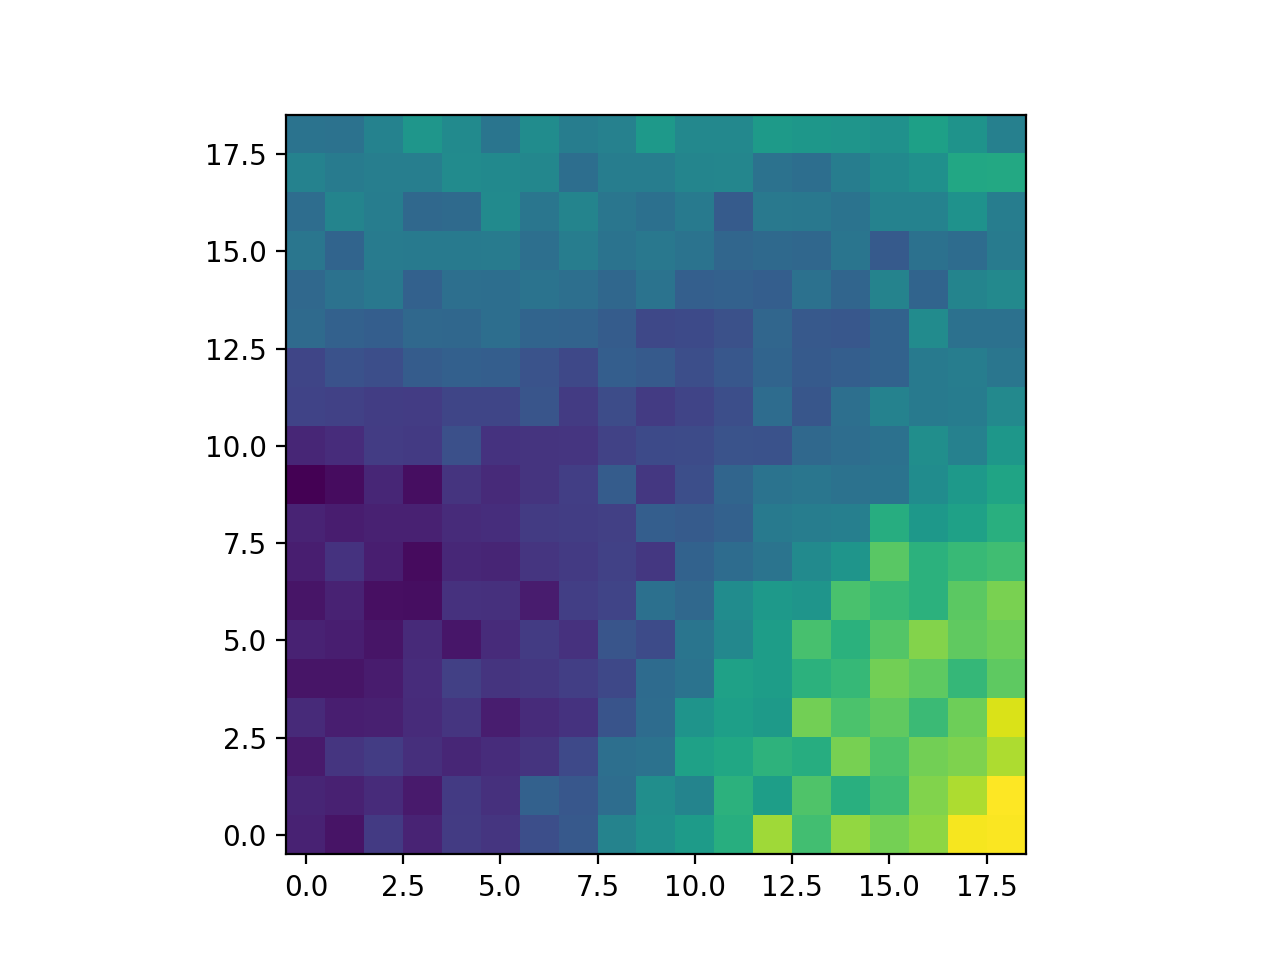

<IPython.core.display.Javascript object>


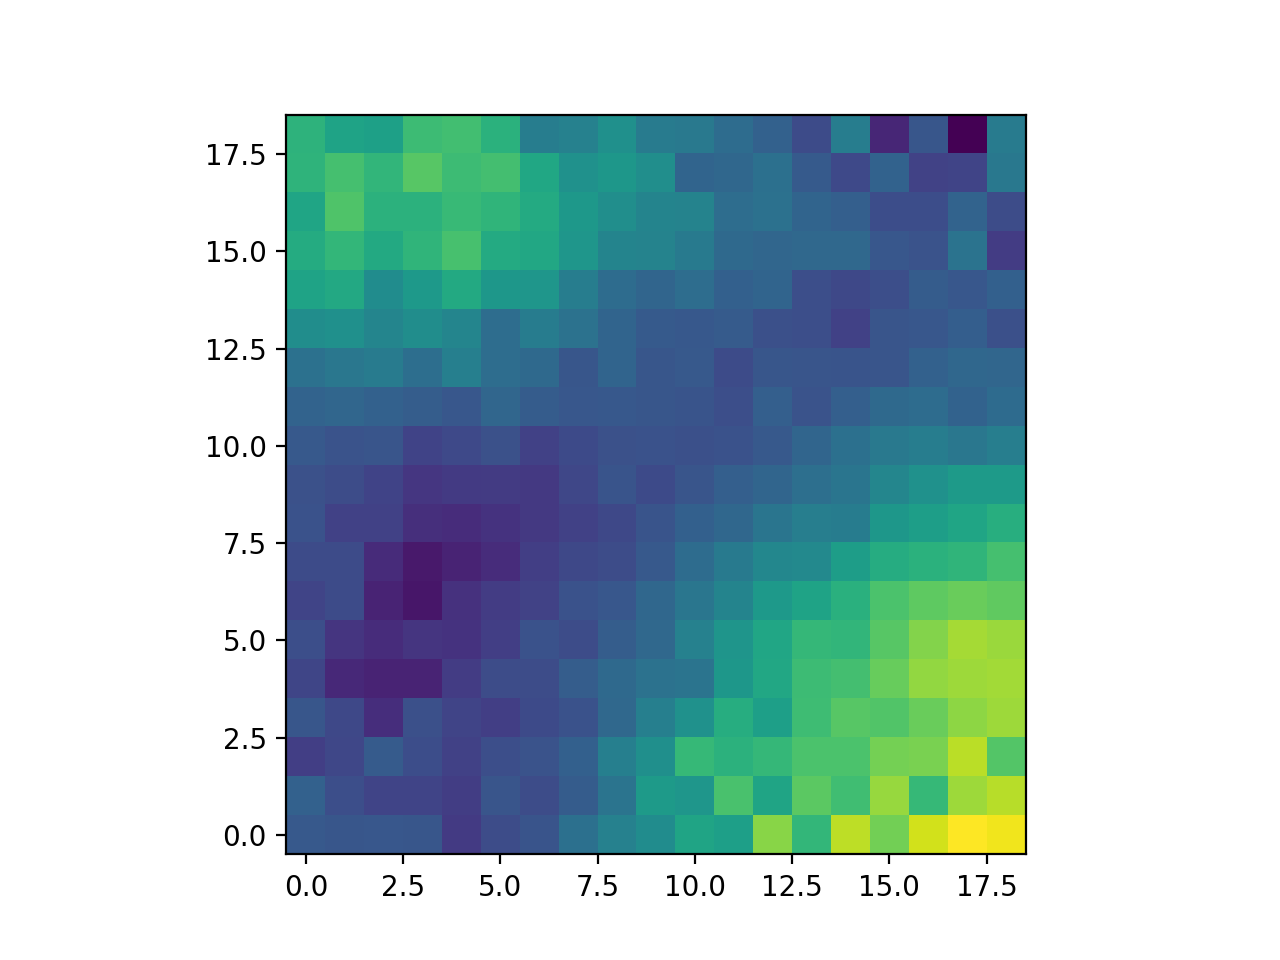

<IPython.core.display.Javascript object>


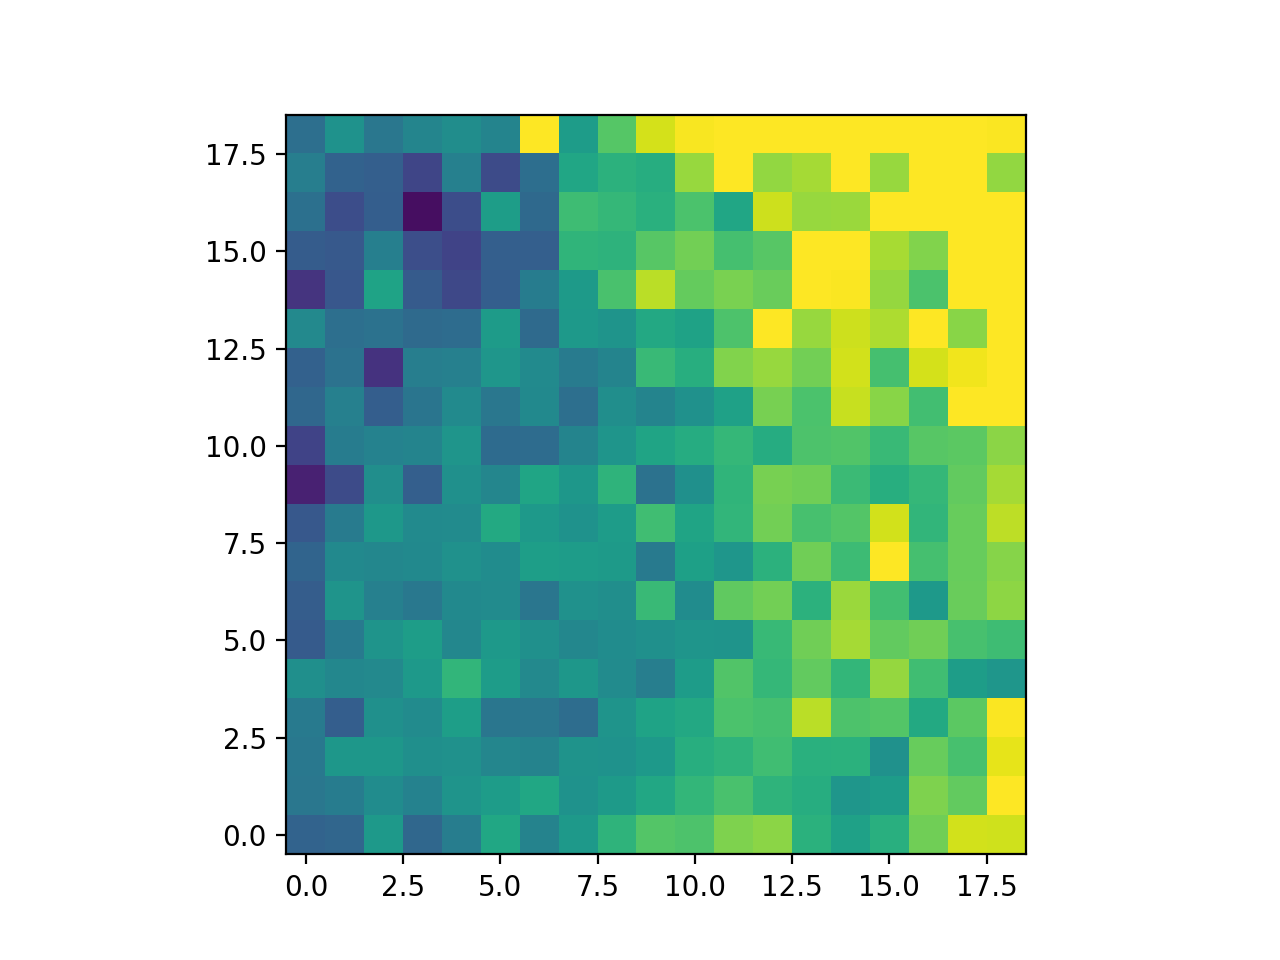

In [37]:
df = pd.concat([pd.DataFrame(s) for s in shapes])
from ziff.stats import BinnedStatistic
%matplotlib notebook
df['resT'] = df['T_data'] - df['T_model']
bs = BinnedStatistic(df, groupby = ('name'))
bins_u, bins_v, hist = bs.get_spatial_bs('T_data_normalized')
fig, ax = P.subplots()
ax.imshow(hist.T,origin='lower')
bins_u, bins_v, hist = bs.get_spatial_bs('T_model_normalized')
fig, ax = P.subplots()
ax.imshow(hist.T,origin='lower')
bins_u, bins_v, hist = bs.get_spatial_bs('resT')
fig, ax = P.subplots()
ax.imshow(hist.T,origin='lower',vmin=-0.02, vmax = 0.02)


<IPython.core.display.Javascript object>


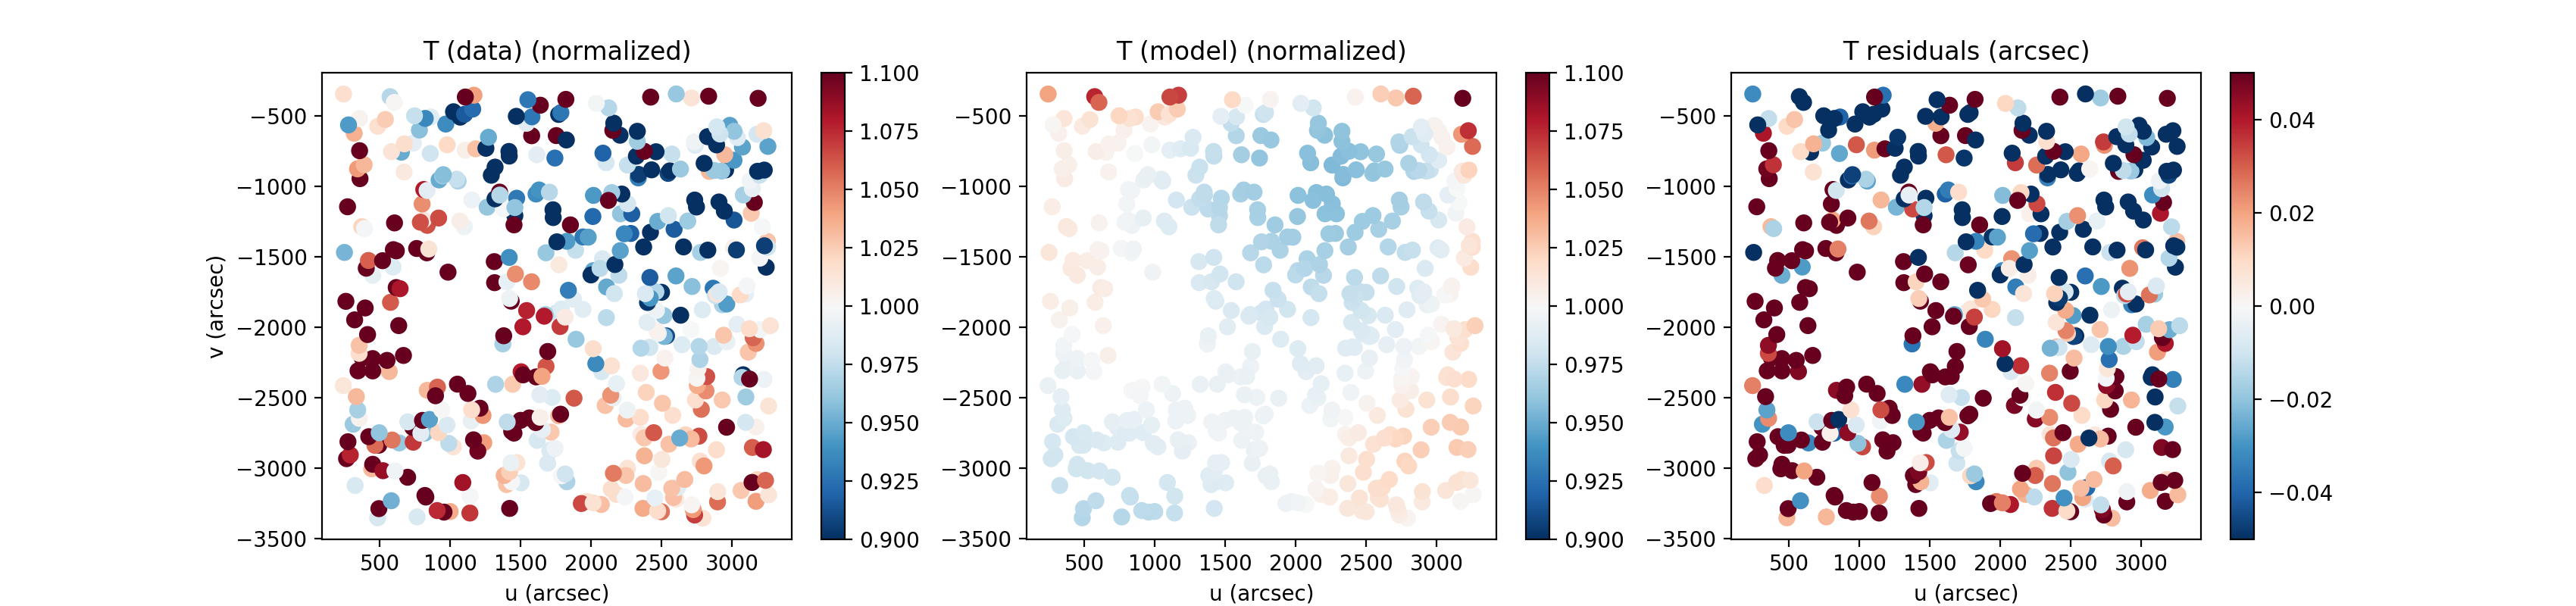

In [28]:
fig, axes = P.subplots(1,3,figsize=(17,4))
scat_kwargs = {'cmap':'RdBu_r', 's':50}

s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[0].set_title('T (data) (normalized)')
axes[0].set_xlabel('u (arcsec)')
axes[0].set_ylabel('v (arcsec)')

fig.colorbar(s,ax=axes[0])

s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[1].set_xlabel('u (arcsec)')
axes[1].set_title('T (model) (normalized)')
fig.colorbar(s,ax=axes[1])


s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),vmin=-0.05,vmax=0.05,**scat_kwargs)
axes[2].set_xlabel('u (arcsec)')
axes[2].set_title('T residuals (arcsec)')
fig.colorbar(s,ax=axes[2])

# WITHOUT MAP

In [4]:
import ziff.ziff 
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

z = ziff.ziff.ZiffCollection.from_zquery(zquery, groupby=('filefracday'),build_default_cat = False, load_default_cat = False)
z.eval_func('load_default_catalog')
z.eval_func('set_config_value',key_path = 'psf,interp,order',value=3)
z.eval_func('set_config_value',key_path = 'psf,outliers,max_remove',value=20)
z.eval_func('run_piff', catalog = 'gaia_calibration', overwrite_cat=True, save_suffix = 'output_nomap.piff')
z.eval_func('load_psf', save_suffix = 'output_nomap.piff')




03:52:43 INFO:test


Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs
Loading default catalogs


/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))
03:52:44 INFO:Reading in 1 images
03:52:44 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_sciimg.fits
03:52:44 INFO:Setting pointing from keywords TELRA, TELDEC
03:52:44 INFO:Setting pointing to: 13.995 h, -9.850 d


Loading default catalogs
Loading default catalogs


03:52:44 INFO:Reading in 1 images
03:52:44 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_sciimg.fits
03:52:44 INFO:Setting pointing from keywords TELRA, TELDEC
03:52:44 INFO:Setting pointing to: 13.995 h, -9.850 d
03:52:45 WARNING:Iteration 1: Fitting 200 stars
03:52:48 INFO:Beginning solution of matrix size (2250, 2250)
03:52:49 INFO:Ill-conditioned matrix (rcond=2.28653e-25): result may not be accurate.
03:52:49 WARNING:             Total chisq = 24285.61 / 44935 dof
03:52:49 WARNING:Iteration 2: Fitting 200 stars
03:52:53 INFO:Beginning solution of matrix size (2250, 2250)
03:52:53 INFO:Ill-conditioned matrix (rcond=2.28698e-25): result may not be accurate.
03:52:54 INFO:Found 5 stars with chisq > thresh
03:52:54 INFO:             Removed 5 outliers
03:52:54 WARNING:             Total chisq = 6177.64 / 43810 dof
03:52:54 WARNING:Iteration 3: Fitting 195 stars
03:52:58 INFO:Beginning solution of matrix size (22

03:53:44 INFO:Setting pointing from keywords TELRA, TELDEC
03:53:44 INFO:Setting pointing to: 13.729 h, 4.550 d
03:53:44 WARNING:Iteration 1: Fitting 195 stars
03:53:48 INFO:Beginning solution of matrix size (2250, 2250)
03:53:49 INFO:Ill-conditioned matrix (rcond=1.10413e-24): result may not be accurate.
03:53:49 WARNING:             Total chisq = 19533.90 / 43797 dof
03:53:49 WARNING:Iteration 2: Fitting 195 stars
03:53:53 INFO:Beginning solution of matrix size (2250, 2250)
03:53:53 INFO:Ill-conditioned matrix (rcond=1.12335e-24): result may not be accurate.
03:53:54 INFO:Found 4 stars with chisq > thresh
03:53:54 INFO:             Removed 4 outliers
03:53:54 WARNING:             Total chisq = 7588.14 / 42897 dof
03:53:54 WARNING:Iteration 3: Fitting 191 stars
03:53:58 INFO:Beginning solution of matrix size (2250, 2250)
03:53:58 INFO:Ill-conditioned matrix (rcond=1.14453e-24): result may not be accurate.
03:53:58 INFO:Found 1 stars with chisq > thresh
03:53:58 INFO:             Remov

03:54:42 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/485243/ztf_20190301485243_000717_zg_c07_o_q1_sciimg.fits
03:54:42 INFO:Setting pointing from keywords TELRA, TELDEC
03:54:42 INFO:Setting pointing to: 13.391 h, 40.550 d
03:54:43 INFO:Reading in 1 images
03:54:43 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/485243/ztf_20190301485243_000717_zg_c07_o_q1_sciimg.fits
03:54:43 INFO:Setting pointing from keywords TELRA, TELDEC
03:54:43 INFO:Setting pointing to: 13.391 h, 40.550 d
03:54:43 WARNING:Iteration 1: Fitting 120 stars
03:54:45 INFO:Beginning solution of matrix size (2250, 2250)
03:54:45 INFO:Ill-conditioned matrix (rcond=1.01271e-24): result may not be accurate.
03:54:46 WARNING:             Total chisq = 9818.24 / 26922 dof
03:54:46 WARNING:Iteration 2: Fitting 120 stars
03:54:48 INFO:Beginning solution of matrix size (2250, 2250)
03:54:48 INFO:Ill-conditioned matrix (rcond=1.00753e-24): result may not be accurate.
03:5

03:55:32 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/487315/ztf_20190301487315_000845_zg_c07_o_q1_sciimg.fits
03:55:32 INFO:Setting pointing from keywords TELRA, TELDEC
03:55:32 INFO:Setting pointing to: 14.286 h, 69.350 d
03:55:32 INFO:Reading in 1 images
03:55:32 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/487315/ztf_20190301487315_000845_zg_c07_o_q1_sciimg.fits
03:55:32 INFO:Setting pointing from keywords TELRA, TELDEC
03:55:32 INFO:Setting pointing to: 14.286 h, 69.350 d
03:55:33 WARNING:Iteration 1: Fitting 200 stars
03:55:36 INFO:Beginning solution of matrix size (2250, 2250)
03:55:36 INFO:Ill-conditioned matrix (rcond=1.85132e-25): result may not be accurate.
03:55:37 WARNING:             Total chisq = 27350.26 / 44452 dof
03:55:37 WARNING:Iteration 2: Fitting 200 stars
03:55:41 INFO:Beginning solution of matrix size (2250, 2250)
03:55:41 INFO:Ill-conditioned matrix (rcond=1.84649e-25): result may not be accurate.
03:

03:56:27 INFO:Setting pointing to: 14.540 h, 40.550 d
03:56:27 INFO:Reading in 1 images
03:56:27 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/489178/ztf_20190301489178_000719_zg_c07_o_q1_sciimg.fits
03:56:27 INFO:Setting pointing from keywords TELRA, TELDEC
03:56:27 INFO:Setting pointing to: 14.540 h, 40.550 d
03:56:27 WARNING:Iteration 1: Fitting 172 stars
03:56:31 INFO:Beginning solution of matrix size (2250, 2250)
03:56:31 INFO:Ill-conditioned matrix (rcond=7.06226e-25): result may not be accurate.
03:56:31 WARNING:             Total chisq = 7776.28 / 38542 dof
03:56:31 WARNING:Iteration 2: Fitting 172 stars
03:56:35 INFO:Beginning solution of matrix size (2250, 2250)
03:56:35 INFO:Ill-conditioned matrix (rcond=7.08898e-25): result may not be accurate.
03:56:35 INFO:Found 3 stars with chisq > thresh
03:56:35 INFO:             Removed 3 outliers
03:56:35 WARNING:             Total chisq = 6097.33 / 37875 dof
03:56:35 WARNING:Iteration 3: Fitting 169 star

03:57:20 INFO:Setting pointing from keywords TELRA, TELDEC
03:57:20 INFO:Setting pointing to: 15.556 h, 62.150 d
03:57:20 WARNING:Iteration 1: Fitting 200 stars
03:57:24 INFO:Beginning solution of matrix size (2250, 2250)
03:57:24 INFO:Ill-conditioned matrix (rcond=1.04129e-25): result may not be accurate.
03:57:25 WARNING:             Total chisq = 9663.52 / 44622 dof
03:57:25 WARNING:Iteration 2: Fitting 200 stars
03:57:28 INFO:Beginning solution of matrix size (2250, 2250)
03:57:28 INFO:Ill-conditioned matrix (rcond=1.04612e-25): result may not be accurate.
03:57:29 INFO:Found 5 stars with chisq > thresh
03:57:29 INFO:             Removed 5 outliers
03:57:29 WARNING:             Total chisq = 6763.92 / 43526 dof
03:57:29 WARNING:Iteration 3: Fitting 195 stars
03:57:33 INFO:Beginning solution of matrix size (2250, 2250)
03:57:33 INFO:Ill-conditioned matrix (rcond=1.10045e-25): result may not be accurate.
03:57:34 WARNING:             Total chisq = 6587.51 / 43526 dof
/Users/graziani/

03:58:20 INFO:Ill-conditioned matrix (rcond=5.65637e-25): result may not be accurate.
03:58:20 WARNING:             Total chisq = 20942.28 / 44798 dof
03:58:20 WARNING:Iteration 2: Fitting 200 stars
03:58:24 INFO:Beginning solution of matrix size (2250, 2250)
03:58:24 INFO:Ill-conditioned matrix (rcond=5.64808e-25): result may not be accurate.
03:58:25 INFO:Found 7 stars with chisq > thresh
03:58:25 INFO:             Removed 7 outliers
03:58:25 WARNING:             Total chisq = 5995.26 / 43223 dof
03:58:25 WARNING:Iteration 3: Fitting 193 stars
03:58:28 INFO:Beginning solution of matrix size (2250, 2250)
03:58:28 INFO:Ill-conditioned matrix (rcond=5.74305e-25): result may not be accurate.
03:58:29 WARNING:             Total chisq = 5703.37 / 43223 dof
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/493310/ztf_20190301493310_000761_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.war

03:59:21 INFO:Beginning solution of matrix size (2250, 2250)
03:59:21 INFO:Ill-conditioned matrix (rcond=8.49947e-26): result may not be accurate.
03:59:21 INFO:Found 6 stars with chisq > thresh
03:59:21 INFO:             Removed 6 outliers
03:59:21 WARNING:             Total chisq = 5587.87 / 43280 dof
03:59:21 WARNING:Iteration 3: Fitting 194 stars
03:59:25 INFO:Beginning solution of matrix size (2250, 2250)
03:59:25 INFO:Ill-conditioned matrix (rcond=8.56044e-26): result may not be accurate.
03:59:26 WARNING:             Total chisq = 5388.48 / 43280 dof
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/495660/ztf_20190301495660_000825_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/

04:00:18 INFO:             Removed 2 outliers
04:00:18 WARNING:             Total chisq = 5912.94 / 44362 dof
04:00:18 WARNING:Iteration 3: Fitting 198 stars
04:00:22 INFO:Beginning solution of matrix size (2250, 2250)
04:00:22 INFO:Ill-conditioned matrix (rcond=1.80406e-26): result may not be accurate.
04:00:23 WARNING:             Total chisq = 5758.74 / 44362 dof
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/497512/ztf_20190301497512_000762_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/497512/ztf_20190301497512_000762_zg_c07_o_q1_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))
04:00:23 INFO:Reading in 1 images
04:00:23 WARNING:Getting wcs from ima

04:01:18 INFO:Beginning solution of matrix size (2250, 2250)
04:01:18 INFO:Ill-conditioned matrix (rcond=1.90661e-27): result may not be accurate.
04:01:19 WARNING:             Total chisq = 7897.13 / 43272 dof
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/499838/ztf_20190301499838_000680_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/499838/ztf_20190301499838_000680_zg_c07_o_q1_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))
04:01:19 INFO:Reading in 1 images
04:01:19 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/499838/ztf_20190301499838_000680_zg_c07_o_q1_sciimg.fits
04:01:19 INFO:Setting pointing from keywords TELRA, TE

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [5]:
z.eval_func('set_config_value', key_path = 'i/o,nstars', value = 10000)
stars = z.eval_func('make_stars',catalog = 'gaia_full',overwrite_cat=False,append_df_keys = ['RPmag','BPmag','Gmag','colormag','sky','xpos','ypos'])
new_stars = z.eval_func_stars('reflux_stars',stars,fit_center=False, which='piff')
shapes = z.eval_func_stars('compute_shapes',new_stars)




04:06:51 WARNING:Using already saved catalogs
04:06:51 INFO:Reading in 1 images
04:06:51 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_sciimg.fits
04:06:51 INFO:Setting pointing from keywords TELRA, TELDEC
04:06:51 INFO:Setting pointing to: 13.995 h, -9.850 d
04:06:51 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_sciimg.fits
04:06:51 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/480845/ztf_20190301480845_000374_zg_c07_o_q1_gaia_full.fits.
04:06:51 INFO:Processing catalog 0 with 928 stars
04:06:52 WARNING:Read a total of 928 stars from 1 image
04:06:54 WARNING:Using already saved catalogs
04:06:54 INFO:Reading in 1 images
04:06:54 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c07_o_q1_sciimg.fits
04:06:54 INFO:Setting pointing from keywords TELRA, TELDEC
04:06:54 I

04:07:19 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c07_o_q1_gaia_full.fits.
04:07:19 INFO:Processing catalog 0 with 465 stars
04:07:19 WARNING:Read a total of 465 stars from 1 image
04:07:21 WARNING:Using already saved catalogs
04:07:21 INFO:Reading in 1 images
04:07:21 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/487315/ztf_20190301487315_000845_zg_c07_o_q1_sciimg.fits
04:07:21 INFO:Setting pointing from keywords TELRA, TELDEC
04:07:21 INFO:Setting pointing to: 14.286 h, 69.350 d
04:07:21 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/487315/ztf_20190301487315_000845_zg_c07_o_q1_sciimg.fits
04:07:21 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/487315/ztf_20190301487315_000845_zg_c07_o_q1_gaia_full.fits.
04:07:21 INFO:Processing catalog 0 with 629 stars
04:07:21 WARNING:Read a total of 629 stars from 1 image
04:07:23 WARNING:Using already saved catalogs


04:07:48 INFO:Setting pointing from keywords TELRA, TELDEC
04:07:48 INFO:Setting pointing to: 15.114 h, 40.550 d
04:07:48 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/492396/ztf_20190301492396_000720_zg_c07_o_q1_sciimg.fits
04:07:48 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/492396/ztf_20190301492396_000720_zg_c07_o_q1_gaia_full.fits.
04:07:48 INFO:Processing catalog 0 with 594 stars
04:07:49 WARNING:Read a total of 594 stars from 1 image
04:07:50 WARNING:Using already saved catalogs
04:07:50 INFO:Reading in 1 images
04:07:50 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/492847/ztf_20190301492847_000721_zg_c07_o_q1_sciimg.fits
04:07:50 INFO:Setting pointing from keywords TELRA, TELDEC
04:07:50 INFO:Setting pointing to: 15.689 h, 40.550 d
04:07:50 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/492847/ztf_20190301492847_000721_zg_c07_o_q1_sciimg.fits
04:07:50 WARNING:Reading star catalog /Users/

04:08:31 INFO:Processing catalog 0 with 1090 stars
04:08:32 WARNING:Read a total of 1090 stars from 1 image
04:08:35 WARNING:Using already saved catalogs
04:08:35 INFO:Reading in 1 images
04:08:35 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/498924/ztf_20190301498924_000724_zg_c07_o_q1_sciimg.fits
04:08:35 INFO:Setting pointing from keywords TELRA, TELDEC
04:08:35 INFO:Setting pointing to: 17.412 h, 40.550 d
04:08:35 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/498924/ztf_20190301498924_000724_zg_c07_o_q1_sciimg.fits
04:08:35 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/498924/ztf_20190301498924_000724_zg_c07_o_q1_gaia_full.fits.
04:08:35 INFO:Processing catalog 0 with 1435 stars
04:08:36 WARNING:Read a total of 1435 stars from 1 image
04:08:40 WARNING:Using already saved catalogs
04:08:40 INFO:Reading in 1 images
04:08:40 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/499387/ztf_20190

Processing 1/928 Processing 2/928 Processing 3/928 Processing 4/928 Processing 5/928 Processing 6/928 Processing 7/928 Processing 8/928 Processing 9/928 Processing 10/928 Processing 11/928 Processing 12/928 Processing 13/928 Processing 14/928 Processing 15/928 Processing 16/928 Processing 17/928 Processing 18/928 Processing 19/928 Processing 20/928 Processing 21/928 Processing 22/928 Processing 23/928 Processing 24/928 Processing 25/928 Processing 26/928 Processing 27/928 Processing 28/928 Processing 29/928 Processing 30/928 Processing 31/928 Processing 32/928 Processing 33/928 Processing 34/928 Processing 35/928 Processing 36/928 Processing 37/928 Processing 38/928 Processing 39/928 Processing 40/928 Processing 41/928 Processing 42/928 Processing 43/928 Processing 44/928 Processing 45/928 Processing 46/928 Processing 47/928 Processing 48/928 Processing 49/928 Processing 50/928 Processing 51/928 Processing 52/928 Processing 53/928 Processing 54/928 Processing 55/928 Processing 56/928 P

Processing 472/928 Processing 473/928 Processing 474/928 Processing 475/928 Processing 476/928 Processing 477/928 Processing 478/928 Processing 479/928 Processing 480/928 Processing 481/928 Processing 482/928 Processing 483/928 Processing 484/928 Processing 485/928 Processing 486/928 Processing 487/928 Processing 488/928 Processing 489/928 Processing 490/928 Processing 491/928 Processing 492/928 Processing 493/928 Processing 494/928 Processing 495/928 Processing 496/928 Processing 497/928 Processing 498/928 Processing 499/928 Processing 500/928 Processing 501/928 Processing 502/928 Processing 503/928 Processing 504/928 Processing 505/928 Processing 506/928 Processing 507/928 Processing 508/928 Processing 509/928 Processing 510/928 Processing 511/928 Processing 512/928 Processing 513/928 Processing 514/928 Processing 515/928 Processing 516/928 Processing 517/928 Processing 518/928 Processing 519/928 Processing 520/928 Processing 521/928 Processing 522/928 Processing 523/928 Processing 5

04:08:53 INFO:Reading in 1 images


Processing 892/928 Processing 893/928 Processing 894/928 Processing 895/928 Processing 896/928 Processing 897/928 Processing 898/928 Processing 899/928 Processing 900/928 Processing 901/928 Processing 902/928 Processing 903/928 Processing 904/928 Processing 905/928 Processing 906/928 Processing 907/928 Processing 908/928 Processing 909/928 Processing 910/928 Processing 911/928 Processing 912/928 Processing 913/928 Processing 914/928 Processing 915/928 Processing 916/928 Processing 917/928 Processing 918/928 Processing 919/928 Processing 920/928 Processing 921/928 Processing 922/928 Processing 923/928 Processing 924/928 Processing 925/928 Processing 926/928 Processing 927/928 Processing 928/928 

04:08:53 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c07_o_q1_sciimg.fits
04:08:53 INFO:Setting pointing from keywords TELRA, TELDEC
04:08:53 INFO:Setting pointing to: 14.807 h, 11.750 d


Processing 1/703 Processing 2/703 Processing 3/703 Processing 4/703 Processing 5/703 Processing 6/703 Processing 7/703 Processing 8/703 Processing 9/703 Processing 10/703 Processing 11/703 Processing 12/703 Processing 13/703 Processing 14/703 Processing 15/703 Processing 16/703 Processing 17/703 Processing 18/703 Processing 19/703 Processing 20/703 Processing 21/703 Processing 22/703 Processing 23/703 Processing 24/703 Processing 25/703 Processing 26/703 Processing 27/703 Processing 28/703 Processing 29/703 Processing 30/703 Processing 31/703 Processing 32/703 Processing 33/703 Processing 34/703 Processing 35/703 Processing 36/703 Processing 37/703 Processing 38/703 Processing 39/703 Processing 40/703 Processing 41/703 Processing 42/703 Processing 43/703 Processing 44/703 Processing 45/703 Processing 46/703 Processing 47/703 Processing 48/703 Processing 49/703 Processing 50/703 Processing 51/703 Processing 52/703 Processing 53/703 Processing 54/703 Processing 55/703 Processing 56/703 P

Processing 461/703 Processing 462/703 Processing 463/703 Processing 464/703 Processing 465/703 Processing 466/703 Processing 467/703 Processing 468/703 Processing 469/703 Processing 470/703 Processing 471/703 Processing 472/703 Processing 473/703 Processing 474/703 Processing 475/703 Processing 476/703 Processing 477/703 Processing 478/703 Processing 479/703 Processing 480/703 Processing 481/703 Processing 482/703 Processing 483/703 Processing 484/703 Processing 485/703 Processing 486/703 Processing 487/703 Processing 488/703 Processing 489/703 Processing 490/703 Processing 491/703 Processing 492/703 Processing 493/703 Processing 494/703 Processing 495/703 Processing 496/703 Processing 497/703 Processing 498/703 Processing 499/703 Processing 500/703 Processing 501/703 Processing 502/703 Processing 503/703 Processing 504/703 Processing 505/703 Processing 506/703 Processing 507/703 Processing 508/703 Processing 509/703 Processing 510/703 Processing 511/703 Processing 512/703 Processing 5

04:08:56 INFO:Reading in 1 images


Processing 659/703 Processing 660/703 Processing 661/703 Processing 662/703 Processing 663/703 Processing 664/703 Processing 665/703 Processing 666/703 Processing 667/703 Processing 668/703 Processing 669/703 Processing 670/703 Processing 671/703 Processing 672/703 Processing 673/703 Processing 674/703 Processing 675/703 Processing 676/703 Processing 677/703 Processing 678/703 Processing 679/703 Processing 680/703 Processing 681/703 Processing 682/703 Processing 683/703 Processing 684/703 Processing 685/703 Processing 686/703 Processing 687/703 Processing 688/703 Processing 689/703 Processing 690/703 Processing 691/703 Processing 692/703 Processing 693/703 Processing 694/703 Processing 695/703 Processing 696/703 Processing 697/703 Processing 698/703 Processing 699/703 Processing 700/703 Processing 701/703 Processing 702/703 Processing 703/703 

04:08:56 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482025/ztf_20190301482025_000529_zg_c07_o_q1_sciimg.fits
04:08:56 INFO:Setting pointing from keywords TELRA, TELDEC
04:08:56 INFO:Setting pointing to: 14.342 h, 11.750 d


Processing 1/629 Processing 2/629 Processing 3/629 Processing 4/629 Processing 5/629 Processing 6/629 Processing 7/629 Processing 8/629 Processing 9/629 Processing 10/629 Processing 11/629 Processing 12/629 Processing 13/629 Processing 14/629 Processing 15/629 Processing 16/629 Processing 17/629 Processing 18/629 Processing 19/629 Processing 20/629 Processing 21/629 Processing 22/629 Processing 23/629 Processing 24/629 Processing 25/629 Processing 26/629 Processing 27/629 Processing 28/629 Processing 29/629 Processing 30/629 Processing 31/629 Processing 32/629 Processing 33/629 Processing 34/629 Processing 35/629 Processing 36/629 Processing 37/629 Processing 38/629 Processing 39/629 Processing 40/629 Processing 41/629 Processing 42/629 Processing 43/629 Processing 44/629 Processing 45/629 Processing 46/629 Processing 47/629 Processing 48/629 Processing 49/629 Processing 50/629 Processing 51/629 Processing 52/629 Processing 53/629 Processing 54/629 Processing 55/629 Processing 56/629 P

Processing 443/629 Processing 444/629 Processing 445/629 Processing 446/629 Processing 447/629 Processing 448/629 Processing 449/629 Processing 450/629 Processing 451/629 Processing 452/629 Processing 453/629 Processing 454/629 Processing 455/629 Processing 456/629 Processing 457/629 Processing 458/629 Processing 459/629 Processing 460/629 Processing 461/629 Processing 462/629 Processing 463/629 Processing 464/629 Processing 465/629 Processing 466/629 Processing 467/629 Processing 468/629 Processing 469/629 Processing 470/629 Processing 471/629 Processing 472/629 Processing 473/629 Processing 474/629 Processing 475/629 Processing 476/629 Processing 477/629 Processing 478/629 Processing 479/629 Processing 480/629 Processing 481/629 Processing 482/629 Processing 483/629 Processing 484/629 Processing 485/629 Processing 486/629 Processing 487/629 Processing 488/629 Processing 489/629 Processing 490/629 Processing 491/629 Processing 492/629 Processing 493/629 Processing 494/629 Processing 4

04:08:59 INFO:Reading in 1 images


Processing 590/629 Processing 591/629 Processing 592/629 Processing 593/629 Processing 594/629 Processing 595/629 Processing 596/629 Processing 597/629 Processing 598/629 Processing 599/629 Processing 600/629 Processing 601/629 Processing 602/629 Processing 603/629 Processing 604/629 Processing 605/629 Processing 606/629 Processing 607/629 Processing 608/629 Processing 609/629 Processing 610/629 Processing 611/629 Processing 612/629 Processing 613/629 Processing 614/629 Processing 615/629 Processing 616/629 Processing 617/629 Processing 618/629 Processing 619/629 Processing 620/629 Processing 621/629 Processing 622/629 Processing 623/629 Processing 624/629 Processing 625/629 Processing 626/629 Processing 627/629 Processing 628/629 Processing 629/629 

04:08:59 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482477/ztf_20190301482477_000425_zg_c07_o_q1_sciimg.fits
04:08:59 INFO:Setting pointing from keywords TELRA, TELDEC
04:08:59 INFO:Setting pointing to: 13.762 h, -2.650 d


Processing 1/652 Processing 2/652 Processing 3/652 Processing 4/652 Processing 5/652 Processing 6/652 Processing 7/652 Processing 8/652 Processing 9/652 Processing 10/652 Processing 11/652 Processing 12/652 Processing 13/652 Processing 14/652 Processing 15/652 Processing 16/652 Processing 17/652 Processing 18/652 Processing 19/652 Processing 20/652 Processing 21/652 Processing 22/652 Processing 23/652 Processing 24/652 Processing 25/652 Processing 26/652 Processing 27/652 Processing 28/652 Processing 29/652 Processing 30/652 Processing 31/652 Processing 32/652 Processing 33/652 Processing 34/652 Processing 35/652 Processing 36/652 Processing 37/652 Processing 38/652 Processing 39/652 Processing 40/652 Processing 41/652 Processing 42/652 Processing 43/652 Processing 44/652 Processing 45/652 Processing 46/652 Processing 47/652 Processing 48/652 Processing 49/652 Processing 50/652 Processing 51/652 Processing 52/652 Processing 53/652 Processing 54/652 Processing 55/652 Processing 56/652 P

Processing 462/652 Processing 463/652 Processing 464/652 Processing 465/652 Processing 466/652 Processing 467/652 Processing 468/652 Processing 469/652 Processing 470/652 Processing 471/652 Processing 472/652 Processing 473/652 Processing 474/652 Processing 475/652 Processing 476/652 Processing 477/652 Processing 478/652 Processing 479/652 Processing 480/652 Processing 481/652 Processing 482/652 Processing 483/652 Processing 484/652 Processing 485/652 Processing 486/652 Processing 487/652 Processing 488/652 Processing 489/652 Processing 490/652 Processing 491/652 Processing 492/652 Processing 493/652 Processing 494/652 Processing 495/652 Processing 496/652 Processing 497/652 Processing 498/652 Processing 499/652 Processing 500/652 Processing 501/652 Processing 502/652 Processing 503/652 Processing 504/652 Processing 505/652 Processing 506/652 Processing 507/652 Processing 508/652 Processing 509/652 Processing 510/652 Processing 511/652 Processing 512/652 Processing 513/652 Processing 5

04:09:02 INFO:Reading in 1 images


Processing 610/652 Processing 611/652 Processing 612/652 Processing 613/652 Processing 614/652 Processing 615/652 Processing 616/652 Processing 617/652 Processing 618/652 Processing 619/652 Processing 620/652 Processing 621/652 Processing 622/652 Processing 623/652 Processing 624/652 Processing 625/652 Processing 626/652 Processing 627/652 Processing 628/652 Processing 629/652 Processing 630/652 Processing 631/652 Processing 632/652 Processing 633/652 Processing 634/652 Processing 635/652 Processing 636/652 Processing 637/652 Processing 638/652 Processing 639/652 Processing 640/652 Processing 641/652 Processing 642/652 Processing 643/652 Processing 644/652 Processing 645/652 Processing 646/652 Processing 647/652 Processing 648/652 Processing 649/652 Processing 650/652 Processing 651/652 Processing 652/652 

04:09:02 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/482963/ztf_20190301482963_000476_zg_c07_o_q1_sciimg.fits
04:09:02 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:02 INFO:Setting pointing to: 13.729 h, 4.550 d


Processing 1/595 Processing 2/595 Processing 3/595 Processing 4/595 Processing 5/595 Processing 6/595 Processing 7/595 Processing 8/595 Processing 9/595 Processing 10/595 Processing 11/595 Processing 12/595 Processing 13/595 Processing 14/595 Processing 15/595 Processing 16/595 Processing 17/595 Processing 18/595 Processing 19/595 Processing 20/595 Processing 21/595 Processing 22/595 Processing 23/595 Processing 24/595 Processing 25/595 Processing 26/595 Processing 27/595 Processing 28/595 Processing 29/595 Processing 30/595 Processing 31/595 Processing 32/595 Processing 33/595 Processing 34/595 Processing 35/595 Processing 36/595 Processing 37/595 Processing 38/595 Processing 39/595 Processing 40/595 Processing 41/595 Processing 42/595 Processing 43/595 Processing 44/595 Processing 45/595 Processing 46/595 Processing 47/595 Processing 48/595 Processing 49/595 Processing 50/595 Processing 51/595 Processing 52/595 Processing 53/595 Processing 54/595 Processing 55/595 Processing 56/595 P

Processing 439/595 Processing 440/595 Processing 441/595 Processing 442/595 Processing 443/595 Processing 444/595 Processing 445/595 Processing 446/595 Processing 447/595 Processing 448/595 Processing 449/595 Processing 450/595 Processing 451/595 Processing 452/595 Processing 453/595 Processing 454/595 Processing 455/595 Processing 456/595 Processing 457/595 Processing 458/595 Processing 459/595 Processing 460/595 Processing 461/595 Processing 462/595 Processing 463/595 Processing 464/595 Processing 465/595 Processing 466/595 Processing 467/595 Processing 468/595 Processing 469/595 Processing 470/595 Processing 471/595 Processing 472/595 Processing 473/595 Processing 474/595 Processing 475/595 Processing 476/595 Processing 477/595 Processing 478/595 Processing 479/595 Processing 480/595 Processing 481/595 Processing 482/595 Processing 483/595 Processing 484/595 Processing 485/595 Processing 486/595 Processing 487/595 Processing 488/595 Processing 489/595 Processing 490/595 Processing 4

04:09:05 INFO:Reading in 1 images


Processing 587/595 Processing 588/595 Processing 589/595 Processing 590/595 Processing 591/595 Processing 592/595 Processing 593/595 Processing 594/595 Processing 595/595 

04:09:05 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
04:09:05 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:05 INFO:Setting pointing to: 13.931 h, 18.950 d


Processing 1/459 Processing 2/459 Processing 3/459 Processing 4/459 Processing 5/459 Processing 6/459 Processing 7/459 Processing 8/459 Processing 9/459 Processing 10/459 Processing 11/459 Processing 12/459 Processing 13/459 Processing 14/459 Processing 15/459 Processing 16/459 Processing 17/459 Processing 18/459 Processing 19/459 Processing 20/459 Processing 21/459 Processing 22/459 Processing 23/459 Processing 24/459 Processing 25/459 Processing 26/459 Processing 27/459 Processing 28/459 Processing 29/459 Processing 30/459 Processing 31/459 Processing 32/459 Processing 33/459 Processing 34/459 Processing 35/459 Processing 36/459 Processing 37/459 Processing 38/459 Processing 39/459 Processing 40/459 Processing 41/459 Processing 42/459 Processing 43/459 Processing 44/459 Processing 45/459 Processing 46/459 Processing 47/459 Processing 48/459 Processing 49/459 Processing 50/459 Processing 51/459 Processing 52/459 Processing 53/459 Processing 54/459 Processing 55/459 Processing 56/459 P

04:09:07 INFO:Reading in 1 images


Processing 457/459 Processing 458/459 Processing 459/459 

04:09:07 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/484329/ztf_20190301484329_000528_zg_c07_o_q1_sciimg.fits
04:09:07 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:07 INFO:Setting pointing to: 13.877 h, 11.750 d


Processing 1/543 Processing 2/543 Processing 3/543 Processing 4/543 Processing 5/543 Processing 6/543 Processing 7/543 Processing 8/543 Processing 9/543 Processing 10/543 Processing 11/543 Processing 12/543 Processing 13/543 Processing 14/543 Processing 15/543 Processing 16/543 Processing 17/543 Processing 18/543 Processing 19/543 Processing 20/543 Processing 21/543 Processing 22/543 Processing 23/543 Processing 24/543 Processing 25/543 Processing 26/543 Processing 27/543 Processing 28/543 Processing 29/543 Processing 30/543 Processing 31/543 Processing 32/543 Processing 33/543 Processing 34/543 Processing 35/543 Processing 36/543 Processing 37/543 Processing 38/543 Processing 39/543 Processing 40/543 Processing 41/543 Processing 42/543 Processing 43/543 Processing 44/543 Processing 45/543 Processing 46/543 Processing 47/543 Processing 48/543 Processing 49/543 Processing 50/543 Processing 51/543 Processing 52/543 Processing 53/543 Processing 54/543 Processing 55/543 Processing 56/543 P

Processing 463/543 Processing 464/543 Processing 465/543 Processing 466/543 Processing 467/543 Processing 468/543 Processing 469/543 Processing 470/543 Processing 471/543 Processing 472/543 Processing 473/543 Processing 474/543 Processing 475/543 Processing 476/543 Processing 477/543 Processing 478/543 Processing 479/543 Processing 480/543 Processing 481/543 Processing 482/543 Processing 483/543 Processing 484/543 Processing 485/543 Processing 486/543 Processing 487/543 Processing 488/543 Processing 489/543 Processing 490/543 Processing 491/543 Processing 492/543 Processing 493/543 Processing 494/543 Processing 495/543 Processing 496/543 Processing 497/543 Processing 498/543 Processing 499/543 Processing 500/543 Processing 501/543 Processing 502/543 Processing 503/543 Processing 504/543 Processing 505/543 Processing 506/543 Processing 507/543 Processing 508/543 Processing 509/543 Processing 510/543 Processing 511/543 Processing 512/543 Processing 513/543 

04:09:09 INFO:Reading in 1 images


Processing 514/543 Processing 515/543 Processing 516/543 Processing 517/543 Processing 518/543 Processing 519/543 Processing 520/543 Processing 521/543 Processing 522/543 Processing 523/543 Processing 524/543 Processing 525/543 Processing 526/543 Processing 527/543 Processing 528/543 Processing 529/543 Processing 530/543 Processing 531/543 Processing 532/543 Processing 533/543 Processing 534/543 Processing 535/543 Processing 536/543 Processing 537/543 Processing 538/543 Processing 539/543 Processing 540/543 Processing 541/543 Processing 542/543 Processing 543/543 

04:09:09 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/484792/ztf_20190301484792_000527_zg_c07_o_q1_sciimg.fits
04:09:09 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:09 INFO:Setting pointing to: 13.402 h, 11.750 d


Processing 1/539 Processing 2/539 Processing 3/539 Processing 4/539 Processing 5/539 Processing 6/539 Processing 7/539 Processing 8/539 Processing 9/539 Processing 10/539 Processing 11/539 Processing 12/539 Processing 13/539 Processing 14/539 Processing 15/539 Processing 16/539 Processing 17/539 Processing 18/539 Processing 19/539 Processing 20/539 Processing 21/539 Processing 22/539 Processing 23/539 Processing 24/539 Processing 25/539 Processing 26/539 Processing 27/539 Processing 28/539 Processing 29/539 Processing 30/539 Processing 31/539 Processing 32/539 Processing 33/539 Processing 34/539 Processing 35/539 Processing 36/539 Processing 37/539 Processing 38/539 Processing 39/539 Processing 40/539 Processing 41/539 Processing 42/539 Processing 43/539 Processing 44/539 Processing 45/539 Processing 46/539 Processing 47/539 Processing 48/539 Processing 49/539 Processing 50/539 Processing 51/539 Processing 52/539 Processing 53/539 Processing 54/539 Processing 55/539 Processing 56/539 P

Processing 461/539 Processing 462/539 Processing 463/539 Processing 464/539 Processing 465/539 Processing 466/539 Processing 467/539 Processing 468/539 Processing 469/539 Processing 470/539 Processing 471/539 Processing 472/539 Processing 473/539 Processing 474/539 Processing 475/539 Processing 476/539 Processing 477/539 Processing 478/539 Processing 479/539 Processing 480/539 Processing 481/539 Processing 482/539 Processing 483/539 Processing 484/539 Processing 485/539 Processing 486/539 Processing 487/539 Processing 488/539 Processing 489/539 Processing 490/539 Processing 491/539 Processing 492/539 Processing 493/539 Processing 494/539 Processing 495/539 Processing 496/539 Processing 497/539 Processing 498/539 Processing 499/539 Processing 500/539 Processing 501/539 Processing 502/539 Processing 503/539 Processing 504/539 Processing 505/539 Processing 506/539 Processing 507/539 Processing 508/539 Processing 509/539 Processing 510/539 Processing 511/539 Processing 512/539 

04:09:11 INFO:Reading in 1 images


Processing 513/539 Processing 514/539 Processing 515/539 Processing 516/539 Processing 517/539 Processing 518/539 Processing 519/539 Processing 520/539 Processing 521/539 Processing 522/539 Processing 523/539 Processing 524/539 Processing 525/539 Processing 526/539 Processing 527/539 Processing 528/539 Processing 529/539 Processing 530/539 Processing 531/539 Processing 532/539 Processing 533/539 Processing 534/539 Processing 535/539 Processing 536/539 Processing 537/539 Processing 538/539 Processing 539/539 

04:09:12 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/485243/ztf_20190301485243_000717_zg_c07_o_q1_sciimg.fits
04:09:12 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:12 INFO:Setting pointing to: 13.391 h, 40.550 d


Processing 1/394 Processing 2/394 Processing 3/394 Processing 4/394 Processing 5/394 Processing 6/394 Processing 7/394 Processing 8/394 Processing 9/394 Processing 10/394 Processing 11/394 Processing 12/394 Processing 13/394 Processing 14/394 Processing 15/394 Processing 16/394 Processing 17/394 Processing 18/394 Processing 19/394 Processing 20/394 Processing 21/394 Processing 22/394 Processing 23/394 Processing 24/394 Processing 25/394 Processing 26/394 Processing 27/394 Processing 28/394 Processing 29/394 Processing 30/394 Processing 31/394 Processing 32/394 Processing 33/394 Processing 34/394 Processing 35/394 Processing 36/394 Processing 37/394 Processing 38/394 Processing 39/394 Processing 40/394 Processing 41/394 Processing 42/394 Processing 43/394 Processing 44/394 Processing 45/394 Processing 46/394 Processing 47/394 Processing 48/394 Processing 49/394 Processing 50/394 Processing 51/394 Processing 52/394 Processing 53/394 Processing 54/394 Processing 55/394 Processing 56/394 P

04:09:13 INFO:Reading in 1 images


Processing 360/394 Processing 361/394 Processing 362/394 Processing 363/394 Processing 364/394 Processing 365/394 Processing 366/394 Processing 367/394 Processing 368/394 Processing 369/394 Processing 370/394 Processing 371/394 Processing 372/394 Processing 373/394 Processing 374/394 Processing 375/394 Processing 376/394 Processing 377/394 Processing 378/394 Processing 379/394 Processing 380/394 Processing 381/394 Processing 382/394 Processing 383/394 Processing 384/394 Processing 385/394 Processing 386/394 Processing 387/394 Processing 388/394 Processing 389/394 Processing 390/394 Processing 391/394 Processing 392/394 Processing 393/394 Processing 394/394 

04:09:13 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/485938/ztf_20190301485938_000718_zg_c07_o_q1_sciimg.fits
04:09:13 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:13 INFO:Setting pointing to: 13.966 h, 40.550 d


Processing 1/460 Processing 2/460 Processing 3/460 Processing 4/460 Processing 5/460 Processing 6/460 Processing 7/460 Processing 8/460 Processing 9/460 Processing 10/460 Processing 11/460 Processing 12/460 Processing 13/460 Processing 14/460 Processing 15/460 Processing 16/460 Processing 17/460 Processing 18/460 Processing 19/460 Processing 20/460 Processing 21/460 Processing 22/460 Processing 23/460 Processing 24/460 Processing 25/460 Processing 26/460 Processing 27/460 Processing 28/460 Processing 29/460 Processing 30/460 Processing 31/460 Processing 32/460 Processing 33/460 Processing 34/460 Processing 35/460 Processing 36/460 Processing 37/460 Processing 38/460 Processing 39/460 Processing 40/460 Processing 41/460 Processing 42/460 Processing 43/460 Processing 44/460 Processing 45/460 Processing 46/460 Processing 47/460 Processing 48/460 Processing 49/460 Processing 50/460 Processing 51/460 Processing 52/460 Processing 53/460 Processing 54/460 Processing 55/460 Processing 56/460 P

04:09:15 INFO:Reading in 1 images


Processing 431/460 Processing 432/460 Processing 433/460 Processing 434/460 Processing 435/460 Processing 436/460 Processing 437/460 Processing 438/460 Processing 439/460 Processing 440/460 Processing 441/460 Processing 442/460 Processing 443/460 Processing 444/460 Processing 445/460 Processing 446/460 Processing 447/460 Processing 448/460 Processing 449/460 Processing 450/460 Processing 451/460 Processing 452/460 Processing 453/460 Processing 454/460 Processing 455/460 Processing 456/460 Processing 457/460 Processing 458/460 Processing 459/460 Processing 460/460 

04:09:16 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/486412/ztf_20190301486412_000757_zg_c07_o_q1_sciimg.fits
04:09:16 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:16 INFO:Setting pointing to: 13.648 h, 47.750 d


Processing 1/448 Processing 2/448 Processing 3/448 Processing 4/448 Processing 5/448 Processing 6/448 Processing 7/448 Processing 8/448 Processing 9/448 Processing 10/448 Processing 11/448 Processing 12/448 Processing 13/448 Processing 14/448 Processing 15/448 Processing 16/448 Processing 17/448 Processing 18/448 Processing 19/448 Processing 20/448 Processing 21/448 Processing 22/448 Processing 23/448 Processing 24/448 Processing 25/448 Processing 26/448 Processing 27/448 Processing 28/448 Processing 29/448 Processing 30/448 Processing 31/448 Processing 32/448 Processing 33/448 Processing 34/448 Processing 35/448 Processing 36/448 Processing 37/448 Processing 38/448 Processing 39/448 Processing 40/448 Processing 41/448 Processing 42/448 Processing 43/448 Processing 44/448 Processing 45/448 Processing 46/448 Processing 47/448 Processing 48/448 Processing 49/448 Processing 50/448 Processing 51/448 Processing 52/448 Processing 53/448 Processing 54/448 Processing 55/448 Processing 56/448 P

04:09:17 INFO:Reading in 1 images


Processing 441/448 Processing 442/448 Processing 443/448 Processing 444/448 Processing 445/448 Processing 446/448 Processing 447/448 Processing 448/448 

04:09:18 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c07_o_q1_sciimg.fits
04:09:18 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:18 INFO:Setting pointing to: 13.493 h, 54.950 d


Processing 1/465 Processing 2/465 Processing 3/465 Processing 4/465 Processing 5/465 Processing 6/465 Processing 7/465 Processing 8/465 Processing 9/465 Processing 10/465 Processing 11/465 Processing 12/465 Processing 13/465 Processing 14/465 Processing 15/465 Processing 16/465 Processing 17/465 Processing 18/465 Processing 19/465 Processing 20/465 Processing 21/465 Processing 22/465 Processing 23/465 Processing 24/465 Processing 25/465 Processing 26/465 Processing 27/465 Processing 28/465 Processing 29/465 Processing 30/465 Processing 31/465 Processing 32/465 Processing 33/465 Processing 34/465 Processing 35/465 Processing 36/465 Processing 37/465 Processing 38/465 Processing 39/465 Processing 40/465 Processing 41/465 Processing 42/465 Processing 43/465 Processing 44/465 Processing 45/465 Processing 46/465 Processing 47/465 Processing 48/465 Processing 49/465 Processing 50/465 Processing 51/465 Processing 52/465 Processing 53/465 Processing 54/465 Processing 55/465 Processing 56/465 P

04:09:20 INFO:Reading in 1 images


Processing 456/465 Processing 457/465 Processing 458/465 Processing 459/465 Processing 460/465 Processing 461/465 Processing 462/465 Processing 463/465 Processing 464/465 Processing 465/465 

04:09:20 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/487315/ztf_20190301487315_000845_zg_c07_o_q1_sciimg.fits
04:09:20 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:20 INFO:Setting pointing to: 14.286 h, 69.350 d


Processing 1/629 Processing 2/629 Processing 3/629 Processing 4/629 Processing 5/629 Processing 6/629 Processing 7/629 Processing 8/629 Processing 9/629 Processing 10/629 Processing 11/629 Processing 12/629 Processing 13/629 Processing 14/629 Processing 15/629 Processing 16/629 Processing 17/629 Processing 18/629 Processing 19/629 Processing 20/629 Processing 21/629 Processing 22/629 Processing 23/629 Processing 24/629 Processing 25/629 Processing 26/629 Processing 27/629 Processing 28/629 Processing 29/629 Processing 30/629 Processing 31/629 Processing 32/629 Processing 33/629 Processing 34/629 Processing 35/629 Processing 36/629 Processing 37/629 Processing 38/629 Processing 39/629 Processing 40/629 Processing 41/629 Processing 42/629 Processing 43/629 Processing 44/629 Processing 45/629 Processing 46/629 Processing 47/629 Processing 48/629 Processing 49/629 Processing 50/629 Processing 51/629 Processing 52/629 Processing 53/629 Processing 54/629 Processing 55/629 Processing 56/629 P

Processing 455/629 Processing 456/629 Processing 457/629 Processing 458/629 Processing 459/629 Processing 460/629 Processing 461/629 Processing 462/629 Processing 463/629 Processing 464/629 Processing 465/629 Processing 466/629 Processing 467/629 Processing 468/629 Processing 469/629 Processing 470/629 Processing 471/629 Processing 472/629 Processing 473/629 Processing 474/629 Processing 475/629 Processing 476/629 Processing 477/629 Processing 478/629 Processing 479/629 Processing 480/629 Processing 481/629 Processing 482/629 Processing 483/629 Processing 484/629 Processing 485/629 Processing 486/629 Processing 487/629 Processing 488/629 Processing 489/629 Processing 490/629 Processing 491/629 Processing 492/629 Processing 493/629 Processing 494/629 Processing 495/629 Processing 496/629 Processing 497/629 Processing 498/629 Processing 499/629 Processing 500/629 Processing 501/629 Processing 502/629 Processing 503/629 Processing 504/629 Processing 505/629 Processing 506/629 Processing 5

04:09:22 INFO:Reading in 1 images


Processing 602/629 Processing 603/629 Processing 604/629 Processing 605/629 Processing 606/629 Processing 607/629 Processing 608/629 Processing 609/629 Processing 610/629 Processing 611/629 Processing 612/629 Processing 613/629 Processing 614/629 Processing 615/629 Processing 616/629 Processing 617/629 Processing 618/629 Processing 619/629 Processing 620/629 Processing 621/629 Processing 622/629 Processing 623/629 Processing 624/629 Processing 625/629 Processing 626/629 Processing 627/629 Processing 628/629 Processing 629/629 

04:09:23 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/487801/ztf_20190301487801_000822_zg_c07_o_q1_sciimg.fits
04:09:23 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:23 INFO:Setting pointing to: 14.667 h, 62.150 d


Processing 1/625 Processing 2/625 Processing 3/625 Processing 4/625 Processing 5/625 Processing 6/625 Processing 7/625 Processing 8/625 Processing 9/625 Processing 10/625 Processing 11/625 Processing 12/625 Processing 13/625 Processing 14/625 Processing 15/625 Processing 16/625 Processing 17/625 Processing 18/625 Processing 19/625 Processing 20/625 Processing 21/625 Processing 22/625 Processing 23/625 Processing 24/625 Processing 25/625 Processing 26/625 Processing 27/625 Processing 28/625 Processing 29/625 Processing 30/625 Processing 31/625 Processing 32/625 Processing 33/625 Processing 34/625 Processing 35/625 Processing 36/625 Processing 37/625 Processing 38/625 Processing 39/625 Processing 40/625 Processing 41/625 Processing 42/625 Processing 43/625 Processing 44/625 Processing 45/625 Processing 46/625 Processing 47/625 Processing 48/625 Processing 49/625 Processing 50/625 Processing 51/625 Processing 52/625 Processing 53/625 Processing 54/625 Processing 55/625 Processing 56/625 P

Processing 443/625 Processing 444/625 Processing 445/625 Processing 446/625 Processing 447/625 Processing 448/625 Processing 449/625 Processing 450/625 Processing 451/625 Processing 452/625 Processing 453/625 Processing 454/625 Processing 455/625 Processing 456/625 Processing 457/625 Processing 458/625 Processing 459/625 Processing 460/625 Processing 461/625 Processing 462/625 Processing 463/625 Processing 464/625 Processing 465/625 Processing 466/625 Processing 467/625 Processing 468/625 Processing 469/625 Processing 470/625 Processing 471/625 Processing 472/625 Processing 473/625 Processing 474/625 Processing 475/625 Processing 476/625 Processing 477/625 Processing 478/625 Processing 479/625 Processing 480/625 Processing 481/625 Processing 482/625 Processing 483/625 Processing 484/625 Processing 485/625 Processing 486/625 Processing 487/625 Processing 488/625 Processing 489/625 Processing 490/625 Processing 491/625 Processing 492/625 Processing 493/625 Processing 494/625 Processing 4

04:09:25 INFO:Reading in 1 images


Processing 586/625 Processing 587/625 Processing 588/625 Processing 589/625 Processing 590/625 Processing 591/625 Processing 592/625 Processing 593/625 Processing 594/625 Processing 595/625 Processing 596/625 Processing 597/625 Processing 598/625 Processing 599/625 Processing 600/625 Processing 601/625 Processing 602/625 Processing 603/625 Processing 604/625 Processing 605/625 Processing 606/625 Processing 607/625 Processing 608/625 Processing 609/625 Processing 610/625 Processing 611/625 Processing 612/625 Processing 613/625 Processing 614/625 Processing 615/625 Processing 616/625 Processing 617/625 Processing 618/625 Processing 619/625 Processing 620/625 Processing 621/625 Processing 622/625 Processing 623/625 Processing 624/625 Processing 625/625 

04:09:25 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/488252/ztf_20190301488252_000792_zg_c07_o_q1_sciimg.fits
04:09:25 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:25 INFO:Setting pointing to: 14.227 h, 54.950 d


Processing 1/523 Processing 2/523 Processing 3/523 Processing 4/523 Processing 5/523 Processing 6/523 Processing 7/523 Processing 8/523 Processing 9/523 Processing 10/523 Processing 11/523 Processing 12/523 Processing 13/523 Processing 14/523 Processing 15/523 Processing 16/523 Processing 17/523 Processing 18/523 Processing 19/523 Processing 20/523 Processing 21/523 Processing 22/523 Processing 23/523 Processing 24/523 Processing 25/523 Processing 26/523 Processing 27/523 Processing 28/523 Processing 29/523 Processing 30/523 Processing 31/523 Processing 32/523 Processing 33/523 Processing 34/523 Processing 35/523 Processing 36/523 Processing 37/523 Processing 38/523 Processing 39/523 Processing 40/523 Processing 41/523 Processing 42/523 Processing 43/523 Processing 44/523 Processing 45/523 Processing 46/523 Processing 47/523 Processing 48/523 Processing 49/523 Processing 50/523 Processing 51/523 Processing 52/523 Processing 53/523 Processing 54/523 Processing 55/523 Processing 56/523 P

Processing 440/523 Processing 441/523 Processing 442/523 Processing 443/523 Processing 444/523 Processing 445/523 Processing 446/523 Processing 447/523 Processing 448/523 Processing 449/523 Processing 450/523 Processing 451/523 Processing 452/523 Processing 453/523 Processing 454/523 Processing 455/523 Processing 456/523 Processing 457/523 Processing 458/523 Processing 459/523 Processing 460/523 Processing 461/523 Processing 462/523 Processing 463/523 Processing 464/523 Processing 465/523 Processing 466/523 Processing 467/523 Processing 468/523 Processing 469/523 Processing 470/523 Processing 471/523 Processing 472/523 Processing 473/523 Processing 474/523 Processing 475/523 Processing 476/523 Processing 477/523 Processing 478/523 Processing 479/523 Processing 480/523 Processing 481/523 Processing 482/523 Processing 483/523 Processing 484/523 Processing 485/523 Processing 486/523 Processing 487/523 Processing 488/523 

04:09:28 INFO:Reading in 1 images


Processing 489/523 Processing 490/523 Processing 491/523 Processing 492/523 Processing 493/523 Processing 494/523 Processing 495/523 Processing 496/523 Processing 497/523 Processing 498/523 Processing 499/523 Processing 500/523 Processing 501/523 Processing 502/523 Processing 503/523 Processing 504/523 Processing 505/523 Processing 506/523 Processing 507/523 Processing 508/523 Processing 509/523 Processing 510/523 Processing 511/523 Processing 512/523 Processing 513/523 Processing 514/523 Processing 515/523 Processing 516/523 Processing 517/523 Processing 518/523 Processing 519/523 Processing 520/523 Processing 521/523 Processing 522/523 Processing 523/523 

04:09:28 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/488715/ztf_20190301488715_000758_zg_c07_o_q1_sciimg.fits
04:09:28 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:28 INFO:Setting pointing to: 14.300 h, 47.750 d


Processing 1/549 Processing 2/549 Processing 3/549 Processing 4/549 Processing 5/549 Processing 6/549 Processing 7/549 Processing 8/549 Processing 9/549 Processing 10/549 Processing 11/549 Processing 12/549 Processing 13/549 Processing 14/549 Processing 15/549 Processing 16/549 Processing 17/549 Processing 18/549 Processing 19/549 Processing 20/549 Processing 21/549 Processing 22/549 Processing 23/549 Processing 24/549 Processing 25/549 Processing 26/549 Processing 27/549 Processing 28/549 Processing 29/549 Processing 30/549 Processing 31/549 Processing 32/549 Processing 33/549 Processing 34/549 Processing 35/549 Processing 36/549 Processing 37/549 Processing 38/549 Processing 39/549 Processing 40/549 Processing 41/549 Processing 42/549 Processing 43/549 Processing 44/549 Processing 45/549 Processing 46/549 Processing 47/549 Processing 48/549 Processing 49/549 Processing 50/549 Processing 51/549 Processing 52/549 Processing 53/549 Processing 54/549 Processing 55/549 Processing 56/549 P

Processing 459/549 Processing 460/549 Processing 461/549 Processing 462/549 Processing 463/549 Processing 464/549 Processing 465/549 Processing 466/549 Processing 467/549 Processing 468/549 Processing 469/549 Processing 470/549 Processing 471/549 Processing 472/549 Processing 473/549 Processing 474/549 Processing 475/549 Processing 476/549 Processing 477/549 Processing 478/549 Processing 479/549 Processing 480/549 Processing 481/549 Processing 482/549 Processing 483/549 Processing 484/549 Processing 485/549 Processing 486/549 Processing 487/549 Processing 488/549 Processing 489/549 Processing 490/549 Processing 491/549 Processing 492/549 Processing 493/549 Processing 494/549 Processing 495/549 Processing 496/549 Processing 497/549 Processing 498/549 Processing 499/549 Processing 500/549 Processing 501/549 Processing 502/549 Processing 503/549 Processing 504/549 Processing 505/549 Processing 506/549 Processing 507/549 Processing 508/549 Processing 509/549 Processing 510/549 

04:09:30 INFO:Reading in 1 images


Processing 511/549 Processing 512/549 Processing 513/549 Processing 514/549 Processing 515/549 Processing 516/549 Processing 517/549 Processing 518/549 Processing 519/549 Processing 520/549 Processing 521/549 Processing 522/549 Processing 523/549 Processing 524/549 Processing 525/549 Processing 526/549 Processing 527/549 Processing 528/549 Processing 529/549 Processing 530/549 Processing 531/549 Processing 532/549 Processing 533/549 Processing 534/549 Processing 535/549 Processing 536/549 Processing 537/549 Processing 538/549 Processing 539/549 Processing 540/549 Processing 541/549 Processing 542/549 Processing 543/549 Processing 544/549 Processing 545/549 Processing 546/549 Processing 547/549 Processing 548/549 Processing 549/549 

04:09:30 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/489178/ztf_20190301489178_000719_zg_c07_o_q1_sciimg.fits
04:09:30 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:30 INFO:Setting pointing to: 14.540 h, 40.550 d


Processing 1/521 Processing 2/521 Processing 3/521 Processing 4/521 Processing 5/521 Processing 6/521 Processing 7/521 Processing 8/521 Processing 9/521 Processing 10/521 Processing 11/521 Processing 12/521 Processing 13/521 Processing 14/521 Processing 15/521 Processing 16/521 Processing 17/521 Processing 18/521 Processing 19/521 Processing 20/521 Processing 21/521 Processing 22/521 Processing 23/521 Processing 24/521 Processing 25/521 Processing 26/521 Processing 27/521 Processing 28/521 Processing 29/521 Processing 30/521 Processing 31/521 Processing 32/521 Processing 33/521 Processing 34/521 Processing 35/521 Processing 36/521 Processing 37/521 Processing 38/521 Processing 39/521 Processing 40/521 Processing 41/521 Processing 42/521 Processing 43/521 Processing 44/521 Processing 45/521 Processing 46/521 Processing 47/521 Processing 48/521 Processing 49/521 Processing 50/521 Processing 51/521 Processing 52/521 Processing 53/521 Processing 54/521 Processing 55/521 Processing 56/521 P

Processing 449/521 Processing 450/521 Processing 451/521 Processing 452/521 Processing 453/521 Processing 454/521 Processing 455/521 Processing 456/521 Processing 457/521 Processing 458/521 Processing 459/521 Processing 460/521 Processing 461/521 Processing 462/521 Processing 463/521 Processing 464/521 Processing 465/521 Processing 466/521 Processing 467/521 Processing 468/521 Processing 469/521 Processing 470/521 Processing 471/521 Processing 472/521 Processing 473/521 Processing 474/521 Processing 475/521 Processing 476/521 Processing 477/521 Processing 478/521 Processing 479/521 Processing 480/521 Processing 481/521 Processing 482/521 Processing 483/521 Processing 484/521 Processing 485/521 Processing 486/521 Processing 487/521 Processing 488/521 Processing 489/521 Processing 490/521 Processing 491/521 Processing 492/521 Processing 493/521 Processing 494/521 Processing 495/521 Processing 496/521 

04:09:33 INFO:Reading in 1 images


Processing 497/521 Processing 498/521 Processing 499/521 Processing 500/521 Processing 501/521 Processing 502/521 Processing 503/521 Processing 504/521 Processing 505/521 Processing 506/521 Processing 507/521 Processing 508/521 Processing 509/521 Processing 510/521 Processing 511/521 Processing 512/521 Processing 513/521 Processing 514/521 Processing 515/521 Processing 516/521 Processing 517/521 Processing 518/521 Processing 519/521 Processing 520/521 Processing 521/521 

04:09:33 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/489630/ztf_20190301489630_000759_zg_c07_o_q1_sciimg.fits
04:09:33 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:33 INFO:Setting pointing to: 14.952 h, 47.750 d


Processing 1/577 Processing 2/577 Processing 3/577 Processing 4/577 Processing 5/577 Processing 6/577 Processing 7/577 Processing 8/577 Processing 9/577 Processing 10/577 Processing 11/577 Processing 12/577 Processing 13/577 Processing 14/577 Processing 15/577 Processing 16/577 Processing 17/577 Processing 18/577 Processing 19/577 Processing 20/577 Processing 21/577 Processing 22/577 Processing 23/577 Processing 24/577 Processing 25/577 Processing 26/577 Processing 27/577 Processing 28/577 Processing 29/577 Processing 30/577 Processing 31/577 Processing 32/577 Processing 33/577 Processing 34/577 Processing 35/577 Processing 36/577 Processing 37/577 Processing 38/577 Processing 39/577 Processing 40/577 Processing 41/577 Processing 42/577 Processing 43/577 Processing 44/577 Processing 45/577 Processing 46/577 Processing 47/577 Processing 48/577 Processing 49/577 Processing 50/577 Processing 51/577 Processing 52/577 Processing 53/577 Processing 54/577 Processing 55/577 Processing 56/577 P

Processing 455/577 Processing 456/577 Processing 457/577 Processing 458/577 Processing 459/577 Processing 460/577 Processing 461/577 Processing 462/577 Processing 463/577 Processing 464/577 Processing 465/577 Processing 466/577 Processing 467/577 Processing 468/577 Processing 469/577 Processing 470/577 Processing 471/577 Processing 472/577 Processing 473/577 Processing 474/577 Processing 475/577 Processing 476/577 Processing 477/577 Processing 478/577 Processing 479/577 Processing 480/577 Processing 481/577 Processing 482/577 Processing 483/577 Processing 484/577 Processing 485/577 Processing 486/577 Processing 487/577 Processing 488/577 Processing 489/577 Processing 490/577 Processing 491/577 Processing 492/577 Processing 493/577 Processing 494/577 Processing 495/577 Processing 496/577 Processing 497/577 Processing 498/577 Processing 499/577 Processing 500/577 Processing 501/577 Processing 502/577 Processing 503/577 Processing 504/577 Processing 505/577 Processing 506/577 Processing 5

04:09:35 INFO:Reading in 1 images


Processing 548/577 Processing 549/577 Processing 550/577 Processing 551/577 Processing 552/577 Processing 553/577 Processing 554/577 Processing 555/577 Processing 556/577 Processing 557/577 Processing 558/577 Processing 559/577 Processing 560/577 Processing 561/577 Processing 562/577 Processing 563/577 Processing 564/577 Processing 565/577 Processing 566/577 Processing 567/577 Processing 568/577 Processing 569/577 Processing 570/577 Processing 571/577 Processing 572/577 Processing 573/577 Processing 574/577 Processing 575/577 Processing 576/577 Processing 577/577 

04:09:35 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/490081/ztf_20190301490081_000793_zg_c07_o_q1_sciimg.fits
04:09:35 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:35 INFO:Setting pointing to: 14.967 h, 54.950 d


Processing 1/581 Processing 2/581 Processing 3/581 Processing 4/581 Processing 5/581 Processing 6/581 Processing 7/581 Processing 8/581 Processing 9/581 Processing 10/581 Processing 11/581 Processing 12/581 Processing 13/581 Processing 14/581 Processing 15/581 Processing 16/581 Processing 17/581 Processing 18/581 Processing 19/581 Processing 20/581 Processing 21/581 Processing 22/581 Processing 23/581 Processing 24/581 Processing 25/581 Processing 26/581 Processing 27/581 Processing 28/581 Processing 29/581 Processing 30/581 Processing 31/581 Processing 32/581 Processing 33/581 Processing 34/581 Processing 35/581 Processing 36/581 Processing 37/581 Processing 38/581 Processing 39/581 Processing 40/581 Processing 41/581 Processing 42/581 Processing 43/581 Processing 44/581 Processing 45/581 Processing 46/581 Processing 47/581 Processing 48/581 Processing 49/581 Processing 50/581 Processing 51/581 Processing 52/581 Processing 53/581 Processing 54/581 Processing 55/581 Processing 56/581 P

Processing 465/581 Processing 466/581 Processing 467/581 Processing 468/581 Processing 469/581 Processing 470/581 Processing 471/581 Processing 472/581 Processing 473/581 Processing 474/581 Processing 475/581 Processing 476/581 Processing 477/581 Processing 478/581 Processing 479/581 Processing 480/581 Processing 481/581 Processing 482/581 Processing 483/581 Processing 484/581 Processing 485/581 Processing 486/581 Processing 487/581 Processing 488/581 Processing 489/581 Processing 490/581 Processing 491/581 Processing 492/581 Processing 493/581 Processing 494/581 Processing 495/581 Processing 496/581 Processing 497/581 Processing 498/581 Processing 499/581 Processing 500/581 Processing 501/581 Processing 502/581 Processing 503/581 Processing 504/581 Processing 505/581 Processing 506/581 Processing 507/581 Processing 508/581 Processing 509/581 Processing 510/581 Processing 511/581 Processing 512/581 Processing 513/581 Processing 514/581 Processing 515/581 Processing 516/581 Processing 5

04:09:38 INFO:Reading in 1 images


Processing 562/581 Processing 563/581 Processing 564/581 Processing 565/581 Processing 566/581 Processing 567/581 Processing 568/581 Processing 569/581 Processing 570/581 Processing 571/581 Processing 572/581 Processing 573/581 Processing 574/581 Processing 575/581 Processing 576/581 Processing 577/581 Processing 578/581 Processing 579/581 Processing 580/581 Processing 581/581 

04:09:38 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/490544/ztf_20190301490544_000846_zg_c07_o_q1_sciimg.fits
04:09:38 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:38 INFO:Setting pointing to: 15.429 h, 69.350 d


Processing 1/760 Processing 2/760 Processing 3/760 Processing 4/760 Processing 5/760 Processing 6/760 Processing 7/760 Processing 8/760 Processing 9/760 Processing 10/760 Processing 11/760 Processing 12/760 Processing 13/760 Processing 14/760 Processing 15/760 Processing 16/760 Processing 17/760 Processing 18/760 Processing 19/760 Processing 20/760 Processing 21/760 Processing 22/760 Processing 23/760 Processing 24/760 Processing 25/760 Processing 26/760 Processing 27/760 Processing 28/760 Processing 29/760 Processing 30/760 Processing 31/760 Processing 32/760 Processing 33/760 Processing 34/760 Processing 35/760 Processing 36/760 Processing 37/760 Processing 38/760 Processing 39/760 Processing 40/760 Processing 41/760 Processing 42/760 Processing 43/760 Processing 44/760 Processing 45/760 Processing 46/760 Processing 47/760 Processing 48/760 Processing 49/760 Processing 50/760 Processing 51/760 Processing 52/760 Processing 53/760 Processing 54/760 Processing 55/760 Processing 56/760 P

Processing 487/760 Processing 488/760 Processing 489/760 Processing 490/760 Processing 491/760 Processing 492/760 Processing 493/760 Processing 494/760 Processing 495/760 Processing 496/760 Processing 497/760 Processing 498/760 Processing 499/760 Processing 500/760 Processing 501/760 Processing 502/760 Processing 503/760 Processing 504/760 Processing 505/760 Processing 506/760 Processing 507/760 Processing 508/760 Processing 509/760 Processing 510/760 Processing 511/760 Processing 512/760 Processing 513/760 Processing 514/760 Processing 515/760 Processing 516/760 Processing 517/760 Processing 518/760 Processing 519/760 Processing 520/760 Processing 521/760 Processing 522/760 Processing 523/760 Processing 524/760 Processing 525/760 Processing 526/760 Processing 527/760 Processing 528/760 Processing 529/760 Processing 530/760 Processing 531/760 Processing 532/760 Processing 533/760 Processing 534/760 Processing 535/760 Processing 536/760 Processing 537/760 Processing 538/760 Processing 5

04:09:41 INFO:Reading in 1 images


Processing 733/760 Processing 734/760 Processing 735/760 Processing 736/760 Processing 737/760 Processing 738/760 Processing 739/760 Processing 740/760 Processing 741/760 Processing 742/760 Processing 743/760 Processing 744/760 Processing 745/760 Processing 746/760 Processing 747/760 Processing 748/760 Processing 749/760 Processing 750/760 Processing 751/760 Processing 752/760 Processing 753/760 Processing 754/760 Processing 755/760 Processing 756/760 Processing 757/760 Processing 758/760 Processing 759/760 Processing 760/760 

04:09:42 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/491019/ztf_20190301491019_000823_zg_c07_o_q1_sciimg.fits
04:09:42 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:42 INFO:Setting pointing to: 15.556 h, 62.150 d


Processing 1/730 Processing 2/730 Processing 3/730 Processing 4/730 Processing 5/730 Processing 6/730 Processing 7/730 Processing 8/730 Processing 9/730 Processing 10/730 Processing 11/730 Processing 12/730 Processing 13/730 Processing 14/730 Processing 15/730 Processing 16/730 Processing 17/730 Processing 18/730 Processing 19/730 Processing 20/730 Processing 21/730 Processing 22/730 Processing 23/730 Processing 24/730 Processing 25/730 Processing 26/730 Processing 27/730 Processing 28/730 Processing 29/730 Processing 30/730 Processing 31/730 Processing 32/730 Processing 33/730 Processing 34/730 Processing 35/730 Processing 36/730 Processing 37/730 Processing 38/730 Processing 39/730 Processing 40/730 Processing 41/730 Processing 42/730 Processing 43/730 Processing 44/730 Processing 45/730 Processing 46/730 Processing 47/730 Processing 48/730 Processing 49/730 Processing 50/730 Processing 51/730 Processing 52/730 Processing 53/730 Processing 54/730 Processing 55/730 Processing 56/730 P

Processing 449/730 Processing 450/730 Processing 451/730 Processing 452/730 Processing 453/730 Processing 454/730 Processing 455/730 Processing 456/730 Processing 457/730 Processing 458/730 Processing 459/730 Processing 460/730 Processing 461/730 Processing 462/730 Processing 463/730 Processing 464/730 Processing 465/730 Processing 466/730 Processing 467/730 Processing 468/730 Processing 469/730 Processing 470/730 Processing 471/730 Processing 472/730 Processing 473/730 Processing 474/730 Processing 475/730 Processing 476/730 Processing 477/730 Processing 478/730 Processing 479/730 Processing 480/730 Processing 481/730 Processing 482/730 Processing 483/730 Processing 484/730 Processing 485/730 Processing 486/730 Processing 487/730 Processing 488/730 Processing 489/730 Processing 490/730 Processing 491/730 Processing 492/730 Processing 493/730 Processing 494/730 Processing 495/730 Processing 496/730 Processing 497/730 Processing 498/730 Processing 499/730 Processing 500/730 Processing 5

04:09:45 INFO:Reading in 1 images


Processing 694/730 Processing 695/730 Processing 696/730 Processing 697/730 Processing 698/730 Processing 699/730 Processing 700/730 Processing 701/730 Processing 702/730 Processing 703/730 Processing 704/730 Processing 705/730 Processing 706/730 Processing 707/730 Processing 708/730 Processing 709/730 Processing 710/730 Processing 711/730 Processing 712/730 Processing 713/730 Processing 714/730 Processing 715/730 Processing 716/730 Processing 717/730 Processing 718/730 Processing 719/730 Processing 720/730 Processing 721/730 Processing 722/730 Processing 723/730 Processing 724/730 Processing 725/730 Processing 726/730 Processing 727/730 Processing 728/730 Processing 729/730 Processing 730/730 

04:09:45 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/491481/ztf_20190301491481_000794_zg_c07_o_q1_sciimg.fits
04:09:45 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:45 INFO:Setting pointing to: 15.707 h, 54.950 d


Processing 1/668 Processing 2/668 Processing 3/668 Processing 4/668 Processing 5/668 Processing 6/668 Processing 7/668 Processing 8/668 Processing 9/668 Processing 10/668 Processing 11/668 Processing 12/668 Processing 13/668 Processing 14/668 Processing 15/668 Processing 16/668 Processing 17/668 Processing 18/668 Processing 19/668 Processing 20/668 Processing 21/668 Processing 22/668 Processing 23/668 Processing 24/668 Processing 25/668 Processing 26/668 Processing 27/668 Processing 28/668 Processing 29/668 Processing 30/668 Processing 31/668 Processing 32/668 Processing 33/668 Processing 34/668 Processing 35/668 Processing 36/668 Processing 37/668 Processing 38/668 Processing 39/668 Processing 40/668 Processing 41/668 Processing 42/668 Processing 43/668 Processing 44/668 Processing 45/668 Processing 46/668 Processing 47/668 Processing 48/668 Processing 49/668 Processing 50/668 Processing 51/668 Processing 52/668 Processing 53/668 Processing 54/668 Processing 55/668 Processing 56/668 P

Processing 443/668 Processing 444/668 Processing 445/668 Processing 446/668 Processing 447/668 Processing 448/668 Processing 449/668 Processing 450/668 Processing 451/668 Processing 452/668 Processing 453/668 Processing 454/668 Processing 455/668 Processing 456/668 Processing 457/668 Processing 458/668 Processing 459/668 Processing 460/668 Processing 461/668 Processing 462/668 Processing 463/668 Processing 464/668 Processing 465/668 Processing 466/668 Processing 467/668 Processing 468/668 Processing 469/668 Processing 470/668 Processing 471/668 Processing 472/668 Processing 473/668 Processing 474/668 Processing 475/668 Processing 476/668 Processing 477/668 Processing 478/668 Processing 479/668 Processing 480/668 Processing 481/668 Processing 482/668 Processing 483/668 Processing 484/668 Processing 485/668 Processing 486/668 Processing 487/668 Processing 488/668 Processing 489/668 Processing 490/668 Processing 491/668 Processing 492/668 Processing 493/668 Processing 494/668 Processing 4

04:09:48 INFO:Reading in 1 images


Processing 638/668 Processing 639/668 Processing 640/668 Processing 641/668 Processing 642/668 Processing 643/668 Processing 644/668 Processing 645/668 Processing 646/668 Processing 647/668 Processing 648/668 Processing 649/668 Processing 650/668 Processing 651/668 Processing 652/668 Processing 653/668 Processing 654/668 Processing 655/668 Processing 656/668 Processing 657/668 Processing 658/668 Processing 659/668 Processing 660/668 Processing 661/668 Processing 662/668 Processing 663/668 Processing 664/668 Processing 665/668 Processing 666/668 Processing 667/668 Processing 668/668 

04:09:48 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/491933/ztf_20190301491933_000760_zg_c07_o_q1_sciimg.fits
04:09:48 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:48 INFO:Setting pointing to: 15.603 h, 47.750 d


Processing 1/645 Processing 2/645 Processing 3/645 Processing 4/645 Processing 5/645 Processing 6/645 Processing 7/645 Processing 8/645 Processing 9/645 Processing 10/645 Processing 11/645 Processing 12/645 Processing 13/645 Processing 14/645 Processing 15/645 Processing 16/645 Processing 17/645 Processing 18/645 Processing 19/645 Processing 20/645 Processing 21/645 Processing 22/645 Processing 23/645 Processing 24/645 Processing 25/645 Processing 26/645 Processing 27/645 Processing 28/645 Processing 29/645 Processing 30/645 Processing 31/645 Processing 32/645 Processing 33/645 Processing 34/645 Processing 35/645 Processing 36/645 Processing 37/645 Processing 38/645 Processing 39/645 Processing 40/645 Processing 41/645 Processing 42/645 Processing 43/645 Processing 44/645 Processing 45/645 Processing 46/645 Processing 47/645 Processing 48/645 Processing 49/645 Processing 50/645 Processing 51/645 Processing 52/645 Processing 53/645 Processing 54/645 Processing 55/645 Processing 56/645 P

Processing 452/645 Processing 453/645 Processing 454/645 Processing 455/645 Processing 456/645 Processing 457/645 Processing 458/645 Processing 459/645 Processing 460/645 Processing 461/645 Processing 462/645 Processing 463/645 Processing 464/645 Processing 465/645 Processing 466/645 Processing 467/645 Processing 468/645 Processing 469/645 Processing 470/645 Processing 471/645 Processing 472/645 Processing 473/645 Processing 474/645 Processing 475/645 Processing 476/645 Processing 477/645 Processing 478/645 Processing 479/645 Processing 480/645 Processing 481/645 Processing 482/645 Processing 483/645 Processing 484/645 Processing 485/645 Processing 486/645 Processing 487/645 Processing 488/645 Processing 489/645 Processing 490/645 Processing 491/645 Processing 492/645 Processing 493/645 Processing 494/645 Processing 495/645 Processing 496/645 Processing 497/645 Processing 498/645 Processing 499/645 Processing 500/645 Processing 501/645 Processing 502/645 Processing 503/645 Processing 5

04:09:50 INFO:Reading in 1 images


Processing 607/645 Processing 608/645 Processing 609/645 Processing 610/645 Processing 611/645 Processing 612/645 Processing 613/645 Processing 614/645 Processing 615/645 Processing 616/645 Processing 617/645 Processing 618/645 Processing 619/645 Processing 620/645 Processing 621/645 Processing 622/645 Processing 623/645 Processing 624/645 Processing 625/645 Processing 626/645 Processing 627/645 Processing 628/645 Processing 629/645 Processing 630/645 Processing 631/645 Processing 632/645 Processing 633/645 Processing 634/645 Processing 635/645 Processing 636/645 Processing 637/645 Processing 638/645 Processing 639/645 Processing 640/645 Processing 641/645 Processing 642/645 Processing 643/645 Processing 644/645 Processing 645/645 

04:09:51 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/492396/ztf_20190301492396_000720_zg_c07_o_q1_sciimg.fits
04:09:51 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:51 INFO:Setting pointing to: 15.114 h, 40.550 d


Processing 1/594 Processing 2/594 Processing 3/594 Processing 4/594 Processing 5/594 Processing 6/594 Processing 7/594 Processing 8/594 Processing 9/594 Processing 10/594 Processing 11/594 Processing 12/594 Processing 13/594 Processing 14/594 Processing 15/594 Processing 16/594 Processing 17/594 Processing 18/594 Processing 19/594 Processing 20/594 Processing 21/594 Processing 22/594 Processing 23/594 Processing 24/594 Processing 25/594 Processing 26/594 Processing 27/594 Processing 28/594 Processing 29/594 Processing 30/594 Processing 31/594 Processing 32/594 Processing 33/594 Processing 34/594 Processing 35/594 Processing 36/594 Processing 37/594 Processing 38/594 Processing 39/594 Processing 40/594 Processing 41/594 Processing 42/594 Processing 43/594 Processing 44/594 Processing 45/594 Processing 46/594 Processing 47/594 Processing 48/594 Processing 49/594 Processing 50/594 Processing 51/594 Processing 52/594 Processing 53/594 Processing 54/594 Processing 55/594 Processing 56/594 P

Processing 486/594 Processing 487/594 Processing 488/594 Processing 489/594 Processing 490/594 Processing 491/594 Processing 492/594 Processing 493/594 Processing 494/594 Processing 495/594 Processing 496/594 Processing 497/594 Processing 498/594 Processing 499/594 Processing 500/594 Processing 501/594 Processing 502/594 Processing 503/594 Processing 504/594 Processing 505/594 Processing 506/594 Processing 507/594 Processing 508/594 Processing 509/594 Processing 510/594 Processing 511/594 Processing 512/594 Processing 513/594 Processing 514/594 Processing 515/594 Processing 516/594 Processing 517/594 Processing 518/594 Processing 519/594 Processing 520/594 Processing 521/594 Processing 522/594 Processing 523/594 Processing 524/594 Processing 525/594 Processing 526/594 Processing 527/594 Processing 528/594 Processing 529/594 Processing 530/594 Processing 531/594 Processing 532/594 Processing 533/594 Processing 534/594 Processing 535/594 Processing 536/594 Processing 537/594 Processing 5

04:09:53 INFO:Reading in 1 images
04:09:53 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/492847/ztf_20190301492847_000721_zg_c07_o_q1_sciimg.fits
04:09:53 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:53 INFO:Setting pointing to: 15.689 h, 40.550 d


Processing 585/594 Processing 586/594 Processing 587/594 Processing 588/594 Processing 589/594 Processing 590/594 Processing 591/594 Processing 592/594 Processing 593/594 Processing 594/594 Processing 1/716 Processing 2/716 Processing 3/716 Processing 4/716 Processing 5/716 Processing 6/716 Processing 7/716 Processing 8/716 Processing 9/716 Processing 10/716 Processing 11/716 Processing 12/716 Processing 13/716 Processing 14/716 Processing 15/716 Processing 16/716 Processing 17/716 Processing 18/716 Processing 19/716 Processing 20/716 Processing 21/716 Processing 22/716 Processing 23/716 Processing 24/716 Processing 25/716 Processing 26/716 Processing 27/716 Processing 28/716 Processing 29/716 Processing 30/716 Processing 31/716 Processing 32/716 Processing 33/716 Processing 34/716 Processing 35/716 Processing 36/716 Processing 37/716 Processing 38/716 Processing 39/716 Processing 40/716 Processing 41/716 Processing 42/716 Processing 43/716 Processing 44/716 Processing 45/716 Processin

Processing 443/716 Processing 444/716 Processing 445/716 Processing 446/716 Processing 447/716 Processing 448/716 Processing 449/716 Processing 450/716 Processing 451/716 Processing 452/716 Processing 453/716 Processing 454/716 Processing 455/716 Processing 456/716 Processing 457/716 Processing 458/716 Processing 459/716 Processing 460/716 Processing 461/716 Processing 462/716 Processing 463/716 Processing 464/716 Processing 465/716 Processing 466/716 Processing 467/716 Processing 468/716 Processing 469/716 Processing 470/716 Processing 471/716 Processing 472/716 Processing 473/716 Processing 474/716 Processing 475/716 Processing 476/716 Processing 477/716 Processing 478/716 Processing 479/716 Processing 480/716 Processing 481/716 Processing 482/716 Processing 483/716 Processing 484/716 Processing 485/716 Processing 486/716 Processing 487/716 Processing 488/716 Processing 489/716 Processing 490/716 Processing 491/716 Processing 492/716 Processing 493/716 Processing 494/716 Processing 4

04:09:57 INFO:Reading in 1 images


Processing 678/716 Processing 679/716 Processing 680/716 Processing 681/716 Processing 682/716 Processing 683/716 Processing 684/716 Processing 685/716 Processing 686/716 Processing 687/716 Processing 688/716 Processing 689/716 Processing 690/716 Processing 691/716 Processing 692/716 Processing 693/716 Processing 694/716 Processing 695/716 Processing 696/716 Processing 697/716 Processing 698/716 Processing 699/716 Processing 700/716 Processing 701/716 Processing 702/716 Processing 703/716 Processing 704/716 Processing 705/716 Processing 706/716 Processing 707/716 Processing 708/716 Processing 709/716 Processing 710/716 Processing 711/716 Processing 712/716 Processing 713/716 Processing 714/716 Processing 715/716 Processing 716/716 

04:09:57 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/493310/ztf_20190301493310_000761_zg_c07_o_q1_sciimg.fits
04:09:57 INFO:Setting pointing from keywords TELRA, TELDEC
04:09:57 INFO:Setting pointing to: 16.255 h, 47.750 d


Processing 1/821 Processing 2/821 Processing 3/821 Processing 4/821 Processing 5/821 Processing 6/821 Processing 7/821 Processing 8/821 Processing 9/821 Processing 10/821 Processing 11/821 Processing 12/821 Processing 13/821 Processing 14/821 Processing 15/821 Processing 16/821 Processing 17/821 Processing 18/821 Processing 19/821 Processing 20/821 Processing 21/821 Processing 22/821 Processing 23/821 Processing 24/821 Processing 25/821 Processing 26/821 Processing 27/821 Processing 28/821 Processing 29/821 Processing 30/821 Processing 31/821 Processing 32/821 Processing 33/821 Processing 34/821 Processing 35/821 Processing 36/821 Processing 37/821 Processing 38/821 Processing 39/821 Processing 40/821 Processing 41/821 Processing 42/821 Processing 43/821 Processing 44/821 Processing 45/821 Processing 46/821 Processing 47/821 Processing 48/821 Processing 49/821 Processing 50/821 Processing 51/821 Processing 52/821 Processing 53/821 Processing 54/821 Processing 55/821 Processing 56/821 P

Processing 462/821 Processing 463/821 Processing 464/821 Processing 465/821 Processing 466/821 Processing 467/821 Processing 468/821 Processing 469/821 Processing 470/821 Processing 471/821 Processing 472/821 Processing 473/821 Processing 474/821 Processing 475/821 Processing 476/821 Processing 477/821 Processing 478/821 Processing 479/821 Processing 480/821 Processing 481/821 Processing 482/821 Processing 483/821 Processing 484/821 Processing 485/821 Processing 486/821 Processing 487/821 Processing 488/821 Processing 489/821 Processing 490/821 Processing 491/821 Processing 492/821 Processing 493/821 Processing 494/821 Processing 495/821 Processing 496/821 Processing 497/821 Processing 498/821 Processing 499/821 Processing 500/821 Processing 501/821 Processing 502/821 Processing 503/821 Processing 504/821 Processing 505/821 Processing 506/821 Processing 507/821 Processing 508/821 Processing 509/821 Processing 510/821 Processing 511/821 Processing 512/821 Processing 513/821 Processing 5

04:10:00 INFO:Reading in 1 images
04:10:00 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/493773/ztf_20190301493773_000795_zg_c07_o_q1_sciimg.fits
04:10:00 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:00 INFO:Setting pointing to: 16.447 h, 54.950 d


Processing 821/821 Processing 1/874 Processing 2/874 Processing 3/874 Processing 4/874 Processing 5/874 Processing 6/874 Processing 7/874 Processing 8/874 Processing 9/874 Processing 10/874 Processing 11/874 Processing 12/874 Processing 13/874 Processing 14/874 Processing 15/874 Processing 16/874 Processing 17/874 Processing 18/874 Processing 19/874 Processing 20/874 Processing 21/874 Processing 22/874 Processing 23/874 Processing 24/874 Processing 25/874 Processing 26/874 Processing 27/874 Processing 28/874 Processing 29/874 Processing 30/874 Processing 31/874 Processing 32/874 Processing 33/874 Processing 34/874 Processing 35/874 Processing 36/874 Processing 37/874 Processing 38/874 Processing 39/874 Processing 40/874 Processing 41/874 Processing 42/874 Processing 43/874 Processing 44/874 Processing 45/874 Processing 46/874 Processing 47/874 Processing 48/874 Processing 49/874 Processing 50/874 Processing 51/874 Processing 52/874 Processing 53/874 Processing 54/874 Processing 55/874 

Processing 468/874 Processing 469/874 Processing 470/874 Processing 471/874 Processing 472/874 Processing 473/874 Processing 474/874 Processing 475/874 Processing 476/874 Processing 477/874 Processing 478/874 Processing 479/874 Processing 480/874 Processing 481/874 Processing 482/874 Processing 483/874 Processing 484/874 Processing 485/874 Processing 486/874 Processing 487/874 Processing 488/874 Processing 489/874 Processing 490/874 Processing 491/874 Processing 492/874 Processing 493/874 Processing 494/874 Processing 495/874 Processing 496/874 Processing 497/874 Processing 498/874 Processing 499/874 Processing 500/874 Processing 501/874 Processing 502/874 Processing 503/874 Processing 504/874 Processing 505/874 Processing 506/874 Processing 507/874 Processing 508/874 Processing 509/874 Processing 510/874 Processing 511/874 Processing 512/874 Processing 513/874 Processing 514/874 Processing 515/874 Processing 516/874 Processing 517/874 Processing 518/874 Processing 519/874 Processing 5

04:10:04 INFO:Reading in 1 images


Processing 830/874 Processing 831/874 Processing 832/874 Processing 833/874 Processing 834/874 Processing 835/874 Processing 836/874 Processing 837/874 Processing 838/874 Processing 839/874 Processing 840/874 Processing 841/874 Processing 842/874 Processing 843/874 Processing 844/874 Processing 845/874 Processing 846/874 Processing 847/874 Processing 848/874 Processing 849/874 Processing 850/874 Processing 851/874 Processing 852/874 Processing 853/874 Processing 854/874 Processing 855/874 Processing 856/874 Processing 857/874 Processing 858/874 Processing 859/874 Processing 860/874 Processing 861/874 Processing 862/874 Processing 863/874 Processing 864/874 Processing 865/874 Processing 866/874 Processing 867/874 Processing 868/874 Processing 869/874 Processing 870/874 Processing 871/874 Processing 872/874 Processing 873/874 Processing 874/874 

04:10:04 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/494236/ztf_20190301494236_000824_zg_c07_o_q1_sciimg.fits
04:10:04 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:04 INFO:Setting pointing to: 16.444 h, 62.150 d


Processing 1/803 Processing 2/803 Processing 3/803 Processing 4/803 Processing 5/803 Processing 6/803 Processing 7/803 Processing 8/803 Processing 9/803 Processing 10/803 Processing 11/803 Processing 12/803 Processing 13/803 Processing 14/803 Processing 15/803 Processing 16/803 Processing 17/803 Processing 18/803 Processing 19/803 Processing 20/803 Processing 21/803 Processing 22/803 Processing 23/803 Processing 24/803 Processing 25/803 Processing 26/803 Processing 27/803 Processing 28/803 Processing 29/803 Processing 30/803 Processing 31/803 Processing 32/803 Processing 33/803 Processing 34/803 Processing 35/803 Processing 36/803 Processing 37/803 Processing 38/803 Processing 39/803 Processing 40/803 Processing 41/803 Processing 42/803 Processing 43/803 Processing 44/803 Processing 45/803 Processing 46/803 Processing 47/803 Processing 48/803 Processing 49/803 Processing 50/803 Processing 51/803 Processing 52/803 Processing 53/803 Processing 54/803 Processing 55/803 Processing 56/803 P

Processing 444/803 Processing 445/803 Processing 446/803 Processing 447/803 Processing 448/803 Processing 449/803 Processing 450/803 Processing 451/803 Processing 452/803 Processing 453/803 Processing 454/803 Processing 455/803 Processing 456/803 Processing 457/803 Processing 458/803 Processing 459/803 Processing 460/803 Processing 461/803 Processing 462/803 Processing 463/803 Processing 464/803 Processing 465/803 Processing 466/803 Processing 467/803 Processing 468/803 Processing 469/803 Processing 470/803 Processing 471/803 Processing 472/803 Processing 473/803 Processing 474/803 Processing 475/803 Processing 476/803 Processing 477/803 Processing 478/803 Processing 479/803 Processing 480/803 Processing 481/803 Processing 482/803 Processing 483/803 Processing 484/803 Processing 485/803 Processing 486/803 Processing 487/803 Processing 488/803 Processing 489/803 Processing 490/803 Processing 491/803 Processing 492/803 Processing 493/803 Processing 494/803 Processing 495/803 Processing 4

04:10:07 INFO:Reading in 1 images


Processing 790/803 Processing 791/803 Processing 792/803 Processing 793/803 Processing 794/803 Processing 795/803 Processing 796/803 Processing 797/803 Processing 798/803 Processing 799/803 Processing 800/803 Processing 801/803 Processing 802/803 Processing 803/803 

04:10:07 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/494688/ztf_20190301494688_000847_zg_c07_o_q1_sciimg.fits
04:10:07 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:07 INFO:Setting pointing to: 16.571 h, 69.350 d


Processing 1/897 Processing 2/897 Processing 3/897 Processing 4/897 Processing 5/897 Processing 6/897 Processing 7/897 Processing 8/897 Processing 9/897 Processing 10/897 Processing 11/897 Processing 12/897 Processing 13/897 Processing 14/897 Processing 15/897 Processing 16/897 Processing 17/897 Processing 18/897 Processing 19/897 Processing 20/897 Processing 21/897 Processing 22/897 Processing 23/897 Processing 24/897 Processing 25/897 Processing 26/897 Processing 27/897 Processing 28/897 Processing 29/897 Processing 30/897 Processing 31/897 Processing 32/897 Processing 33/897 Processing 34/897 Processing 35/897 Processing 36/897 Processing 37/897 Processing 38/897 Processing 39/897 Processing 40/897 Processing 41/897 Processing 42/897 Processing 43/897 Processing 44/897 Processing 45/897 Processing 46/897 Processing 47/897 Processing 48/897 Processing 49/897 Processing 50/897 Processing 51/897 Processing 52/897 Processing 53/897 Processing 54/897 Processing 55/897 Processing 56/897 P

Processing 451/897 Processing 452/897 Processing 453/897 Processing 454/897 Processing 455/897 Processing 456/897 Processing 457/897 Processing 458/897 Processing 459/897 Processing 460/897 Processing 461/897 Processing 462/897 Processing 463/897 Processing 464/897 Processing 465/897 Processing 466/897 Processing 467/897 Processing 468/897 Processing 469/897 Processing 470/897 Processing 471/897 Processing 472/897 Processing 473/897 Processing 474/897 Processing 475/897 Processing 476/897 Processing 477/897 Processing 478/897 Processing 479/897 Processing 480/897 Processing 481/897 Processing 482/897 Processing 483/897 Processing 484/897 Processing 485/897 Processing 486/897 Processing 487/897 Processing 488/897 Processing 489/897 Processing 490/897 Processing 491/897 Processing 492/897 Processing 493/897 Processing 494/897 Processing 495/897 Processing 496/897 Processing 497/897 Processing 498/897 Processing 499/897 Processing 500/897 Processing 501/897 Processing 502/897 Processing 5

04:10:11 INFO:Reading in 1 images
04:10:11 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/495660/ztf_20190301495660_000825_zg_c07_o_q1_sciimg.fits


Processing 894/897 Processing 895/897 Processing 896/897 Processing 897/897 

04:10:11 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:11 INFO:Setting pointing to: 17.333 h, 62.150 d


Processing 1/1194 Processing 2/1194 Processing 3/1194 Processing 4/1194 Processing 5/1194 Processing 6/1194 Processing 7/1194 Processing 8/1194 Processing 9/1194 Processing 10/1194 Processing 11/1194 Processing 12/1194 Processing 13/1194 Processing 14/1194 Processing 15/1194 Processing 16/1194 Processing 17/1194 Processing 18/1194 Processing 19/1194 Processing 20/1194 Processing 21/1194 Processing 22/1194 Processing 23/1194 Processing 24/1194 Processing 25/1194 Processing 26/1194 Processing 27/1194 Processing 28/1194 Processing 29/1194 Processing 30/1194 Processing 31/1194 Processing 32/1194 Processing 33/1194 Processing 34/1194 Processing 35/1194 Processing 36/1194 Processing 37/1194 Processing 38/1194 Processing 39/1194 Processing 40/1194 Processing 41/1194 Processing 42/1194 Processing 43/1194 Processing 44/1194 Processing 45/1194 Processing 46/1194 Processing 47/1194 Processing 48/1194 Processing 49/1194 Processing 50/1194 Processing 51/1194 Processing 52/1194 Processing 53/1194 Pr

Processing 464/1194 Processing 465/1194 Processing 466/1194 Processing 467/1194 Processing 468/1194 Processing 469/1194 Processing 470/1194 Processing 471/1194 Processing 472/1194 Processing 473/1194 Processing 474/1194 Processing 475/1194 Processing 476/1194 Processing 477/1194 Processing 478/1194 Processing 479/1194 Processing 480/1194 Processing 481/1194 Processing 482/1194 Processing 483/1194 Processing 484/1194 Processing 485/1194 Processing 486/1194 Processing 487/1194 Processing 488/1194 Processing 489/1194 Processing 490/1194 Processing 491/1194 Processing 492/1194 Processing 493/1194 Processing 494/1194 Processing 495/1194 Processing 496/1194 Processing 497/1194 Processing 498/1194 Processing 499/1194 Processing 500/1194 Processing 501/1194 Processing 502/1194 Processing 503/1194 Processing 504/1194 Processing 505/1194 Processing 506/1194 Processing 507/1194 Processing 508/1194 Processing 509/1194 Processing 510/1194 Processing 511/1194 Processing 512/1194 Processing 513/1194 

Processing 922/1194 Processing 923/1194 Processing 924/1194 Processing 925/1194 Processing 926/1194 Processing 927/1194 Processing 928/1194 Processing 929/1194 Processing 930/1194 Processing 931/1194 Processing 932/1194 Processing 933/1194 Processing 934/1194 Processing 935/1194 Processing 936/1194 Processing 937/1194 Processing 938/1194 Processing 939/1194 Processing 940/1194 Processing 941/1194 Processing 942/1194 Processing 943/1194 Processing 944/1194 Processing 945/1194 Processing 946/1194 Processing 947/1194 Processing 948/1194 Processing 949/1194 Processing 950/1194 Processing 951/1194 Processing 952/1194 Processing 953/1194 Processing 954/1194 Processing 955/1194 Processing 956/1194 Processing 957/1194 Processing 958/1194 Processing 959/1194 Processing 960/1194 Processing 961/1194 Processing 962/1194 Processing 963/1194 Processing 964/1194 Processing 965/1194 Processing 966/1194 Processing 967/1194 Processing 968/1194 Processing 969/1194 Processing 970/1194 Processing 971/1194 

04:10:16 INFO:Reading in 1 images
04:10:16 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/496123/ztf_20190301496123_000796_zg_c07_o_q1_sciimg.fits
04:10:16 INFO:Setting pointing from keywords TELRA, TELDEC


Processing 1179/1194 Processing 1180/1194 Processing 1181/1194 Processing 1182/1194 Processing 1183/1194 Processing 1184/1194 Processing 1185/1194 Processing 1186/1194 Processing 1187/1194 Processing 1188/1194 Processing 1189/1194 Processing 1190/1194 Processing 1191/1194 Processing 1192/1194 Processing 1193/1194 Processing 1194/1194 

04:10:16 INFO:Setting pointing to: 17.187 h, 54.950 d


Processing 1/1073 Processing 2/1073 Processing 3/1073 Processing 4/1073 Processing 5/1073 Processing 6/1073 Processing 7/1073 Processing 8/1073 Processing 9/1073 Processing 10/1073 Processing 11/1073 Processing 12/1073 Processing 13/1073 Processing 14/1073 Processing 15/1073 Processing 16/1073 Processing 17/1073 Processing 18/1073 Processing 19/1073 Processing 20/1073 Processing 21/1073 Processing 22/1073 Processing 23/1073 Processing 24/1073 Processing 25/1073 Processing 26/1073 Processing 27/1073 Processing 28/1073 Processing 29/1073 Processing 30/1073 Processing 31/1073 Processing 32/1073 Processing 33/1073 Processing 34/1073 Processing 35/1073 Processing 36/1073 Processing 37/1073 Processing 38/1073 Processing 39/1073 Processing 40/1073 Processing 41/1073 Processing 42/1073 Processing 43/1073 Processing 44/1073 Processing 45/1073 Processing 46/1073 Processing 47/1073 Processing 48/1073 Processing 49/1073 Processing 50/1073 Processing 51/1073 Processing 52/1073 Processing 53/1073 Pr

Processing 421/1073 Processing 422/1073 Processing 423/1073 Processing 424/1073 Processing 425/1073 Processing 426/1073 Processing 427/1073 Processing 428/1073 Processing 429/1073 Processing 430/1073 Processing 431/1073 Processing 432/1073 Processing 433/1073 Processing 434/1073 Processing 435/1073 Processing 436/1073 Processing 437/1073 Processing 438/1073 Processing 439/1073 Processing 440/1073 Processing 441/1073 Processing 442/1073 Processing 443/1073 Processing 444/1073 Processing 445/1073 Processing 446/1073 Processing 447/1073 Processing 448/1073 Processing 449/1073 Processing 450/1073 Processing 451/1073 Processing 452/1073 Processing 453/1073 Processing 454/1073 Processing 455/1073 Processing 456/1073 Processing 457/1073 Processing 458/1073 Processing 459/1073 Processing 460/1073 Processing 461/1073 Processing 462/1073 Processing 463/1073 Processing 464/1073 Processing 465/1073 Processing 466/1073 Processing 467/1073 Processing 468/1073 Processing 469/1073 Processing 470/1073 

Processing 879/1073 Processing 880/1073 Processing 881/1073 Processing 882/1073 Processing 883/1073 Processing 884/1073 Processing 885/1073 Processing 886/1073 Processing 887/1073 Processing 888/1073 Processing 889/1073 Processing 890/1073 Processing 891/1073 Processing 892/1073 Processing 893/1073 Processing 894/1073 Processing 895/1073 Processing 896/1073 Processing 897/1073 Processing 898/1073 Processing 899/1073 Processing 900/1073 Processing 901/1073 Processing 902/1073 Processing 903/1073 Processing 904/1073 Processing 905/1073 Processing 906/1073 Processing 907/1073 Processing 908/1073 Processing 909/1073 Processing 910/1073 Processing 911/1073 Processing 912/1073 Processing 913/1073 Processing 914/1073 Processing 915/1073 Processing 916/1073 Processing 917/1073 Processing 918/1073 Processing 919/1073 Processing 920/1073 Processing 921/1073 Processing 922/1073 Processing 923/1073 Processing 924/1073 Processing 925/1073 Processing 926/1073 Processing 927/1073 Processing 928/1073 

04:10:21 INFO:Reading in 1 images


Processing 1030/1073 Processing 1031/1073 Processing 1032/1073 Processing 1033/1073 Processing 1034/1073 Processing 1035/1073 Processing 1036/1073 Processing 1037/1073 Processing 1038/1073 Processing 1039/1073 Processing 1040/1073 Processing 1041/1073 Processing 1042/1073 Processing 1043/1073 Processing 1044/1073 Processing 1045/1073 Processing 1046/1073 Processing 1047/1073 Processing 1048/1073 Processing 1049/1073 Processing 1050/1073 Processing 1051/1073 Processing 1052/1073 Processing 1053/1073 Processing 1054/1073 Processing 1055/1073 Processing 1056/1073 Processing 1057/1073 Processing 1058/1073 Processing 1059/1073 Processing 1060/1073 Processing 1061/1073 Processing 1062/1073 Processing 1063/1073 Processing 1064/1073 Processing 1065/1073 Processing 1066/1073 Processing 1067/1073 Processing 1068/1073 Processing 1069/1073 Processing 1070/1073 Processing 1071/1073 Processing 1072/1073 Processing 1073/1073 

04:10:21 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/496574/ztf_20190301496574_000797_zg_c07_o_q1_sciimg.fits
04:10:21 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:21 INFO:Setting pointing to: 17.926 h, 54.950 d


Processing 1/1507 Processing 2/1507 Processing 3/1507 Processing 4/1507 Processing 5/1507 Processing 6/1507 Processing 7/1507 Processing 8/1507 Processing 9/1507 Processing 10/1507 Processing 11/1507 Processing 12/1507 Processing 13/1507 Processing 14/1507 Processing 15/1507 Processing 16/1507 Processing 17/1507 Processing 18/1507 Processing 19/1507 Processing 20/1507 Processing 21/1507 Processing 22/1507 Processing 23/1507 Processing 24/1507 Processing 25/1507 Processing 26/1507 Processing 27/1507 Processing 28/1507 Processing 29/1507 Processing 30/1507 Processing 31/1507 Processing 32/1507 Processing 33/1507 Processing 34/1507 Processing 35/1507 Processing 36/1507 Processing 37/1507 Processing 38/1507 Processing 39/1507 Processing 40/1507 Processing 41/1507 Processing 42/1507 Processing 43/1507 Processing 44/1507 Processing 45/1507 Processing 46/1507 Processing 47/1507 Processing 48/1507 Processing 49/1507 Processing 50/1507 Processing 51/1507 Processing 52/1507 Processing 53/1507 Pr

Processing 457/1507 Processing 458/1507 Processing 459/1507 Processing 460/1507 Processing 461/1507 Processing 462/1507 Processing 463/1507 Processing 464/1507 Processing 465/1507 Processing 466/1507 Processing 467/1507 Processing 468/1507 Processing 469/1507 Processing 470/1507 Processing 471/1507 Processing 472/1507 Processing 473/1507 Processing 474/1507 Processing 475/1507 Processing 476/1507 Processing 477/1507 Processing 478/1507 Processing 479/1507 Processing 480/1507 Processing 481/1507 Processing 482/1507 Processing 483/1507 Processing 484/1507 Processing 485/1507 Processing 486/1507 Processing 487/1507 Processing 488/1507 Processing 489/1507 Processing 490/1507 Processing 491/1507 Processing 492/1507 Processing 493/1507 Processing 494/1507 Processing 495/1507 Processing 496/1507 Processing 497/1507 Processing 498/1507 Processing 499/1507 Processing 500/1507 Processing 501/1507 Processing 502/1507 Processing 503/1507 Processing 504/1507 Processing 505/1507 Processing 506/1507 

Processing 910/1507 Processing 911/1507 Processing 912/1507 Processing 913/1507 Processing 914/1507 Processing 915/1507 Processing 916/1507 Processing 917/1507 Processing 918/1507 Processing 919/1507 Processing 920/1507 Processing 921/1507 Processing 922/1507 Processing 923/1507 Processing 924/1507 Processing 925/1507 Processing 926/1507 Processing 927/1507 Processing 928/1507 Processing 929/1507 Processing 930/1507 Processing 931/1507 Processing 932/1507 Processing 933/1507 Processing 934/1507 Processing 935/1507 Processing 936/1507 Processing 937/1507 Processing 938/1507 Processing 939/1507 Processing 940/1507 Processing 941/1507 Processing 942/1507 Processing 943/1507 Processing 944/1507 Processing 945/1507 Processing 946/1507 Processing 947/1507 Processing 948/1507 Processing 949/1507 Processing 950/1507 Processing 951/1507 Processing 952/1507 Processing 953/1507 Processing 954/1507 Processing 955/1507 Processing 956/1507 Processing 957/1507 Processing 958/1507 Processing 959/1507 

Processing 1319/1507 Processing 1320/1507 Processing 1321/1507 Processing 1322/1507 Processing 1323/1507 Processing 1324/1507 Processing 1325/1507 Processing 1326/1507 Processing 1327/1507 Processing 1328/1507 Processing 1329/1507 Processing 1330/1507 Processing 1331/1507 Processing 1332/1507 Processing 1333/1507 Processing 1334/1507 Processing 1335/1507 Processing 1336/1507 Processing 1337/1507 Processing 1338/1507 Processing 1339/1507 Processing 1340/1507 Processing 1341/1507 Processing 1342/1507 Processing 1343/1507 Processing 1344/1507 Processing 1345/1507 Processing 1346/1507 Processing 1347/1507 Processing 1348/1507 Processing 1349/1507 Processing 1350/1507 Processing 1351/1507 Processing 1352/1507 Processing 1353/1507 Processing 1354/1507 Processing 1355/1507 Processing 1356/1507 Processing 1357/1507 Processing 1358/1507 Processing 1359/1507 Processing 1360/1507 Processing 1361/1507 Processing 1362/1507 Processing 1363/1507 Processing 1364/1507 Processing 1365/1507 Processing 13

04:10:27 INFO:Reading in 1 images


Processing 1474/1507 Processing 1475/1507 Processing 1476/1507 Processing 1477/1507 Processing 1478/1507 Processing 1479/1507 Processing 1480/1507 Processing 1481/1507 Processing 1482/1507 Processing 1483/1507 Processing 1484/1507 Processing 1485/1507 Processing 1486/1507 Processing 1487/1507 Processing 1488/1507 Processing 1489/1507 Processing 1490/1507 Processing 1491/1507 Processing 1492/1507 Processing 1493/1507 Processing 1494/1507 Processing 1495/1507 Processing 1496/1507 Processing 1497/1507 Processing 1498/1507 Processing 1499/1507 Processing 1500/1507 Processing 1501/1507 Processing 1502/1507 Processing 1503/1507 Processing 1504/1507 Processing 1505/1507 Processing 1506/1507 Processing 1507/1507 

04:10:27 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/497049/ztf_20190301497049_000763_zg_c07_o_q1_sciimg.fits
04:10:27 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:27 INFO:Setting pointing to: 17.558 h, 47.750 d


Processing 1/1403 Processing 2/1403 Processing 3/1403 Processing 4/1403 Processing 5/1403 Processing 6/1403 Processing 7/1403 Processing 8/1403 Processing 9/1403 Processing 10/1403 Processing 11/1403 Processing 12/1403 Processing 13/1403 Processing 14/1403 Processing 15/1403 Processing 16/1403 Processing 17/1403 Processing 18/1403 Processing 19/1403 Processing 20/1403 Processing 21/1403 Processing 22/1403 Processing 23/1403 Processing 24/1403 Processing 25/1403 Processing 26/1403 Processing 27/1403 Processing 28/1403 Processing 29/1403 Processing 30/1403 Processing 31/1403 Processing 32/1403 Processing 33/1403 Processing 34/1403 Processing 35/1403 Processing 36/1403 Processing 37/1403 Processing 38/1403 Processing 39/1403 Processing 40/1403 Processing 41/1403 Processing 42/1403 Processing 43/1403 Processing 44/1403 Processing 45/1403 Processing 46/1403 Processing 47/1403 Processing 48/1403 Processing 49/1403 Processing 50/1403 Processing 51/1403 Processing 52/1403 Processing 53/1403 Pr

Processing 419/1403 Processing 420/1403 Processing 421/1403 Processing 422/1403 Processing 423/1403 Processing 424/1403 Processing 425/1403 Processing 426/1403 Processing 427/1403 Processing 428/1403 Processing 429/1403 Processing 430/1403 Processing 431/1403 Processing 432/1403 Processing 433/1403 Processing 434/1403 Processing 435/1403 Processing 436/1403 Processing 437/1403 Processing 438/1403 Processing 439/1403 Processing 440/1403 Processing 441/1403 Processing 442/1403 Processing 443/1403 Processing 444/1403 Processing 445/1403 Processing 446/1403 Processing 447/1403 Processing 448/1403 Processing 449/1403 Processing 450/1403 Processing 451/1403 Processing 452/1403 Processing 453/1403 Processing 454/1403 Processing 455/1403 Processing 456/1403 Processing 457/1403 Processing 458/1403 Processing 459/1403 Processing 460/1403 Processing 461/1403 Processing 462/1403 Processing 463/1403 Processing 464/1403 Processing 465/1403 Processing 466/1403 Processing 467/1403 Processing 468/1403 

Processing 838/1403 Processing 839/1403 Processing 840/1403 Processing 841/1403 Processing 842/1403 Processing 843/1403 Processing 844/1403 Processing 845/1403 Processing 846/1403 Processing 847/1403 Processing 848/1403 Processing 849/1403 Processing 850/1403 Processing 851/1403 Processing 852/1403 Processing 853/1403 Processing 854/1403 Processing 855/1403 Processing 856/1403 Processing 857/1403 Processing 858/1403 Processing 859/1403 Processing 860/1403 Processing 861/1403 Processing 862/1403 Processing 863/1403 Processing 864/1403 Processing 865/1403 Processing 866/1403 Processing 867/1403 Processing 868/1403 Processing 869/1403 Processing 870/1403 Processing 871/1403 Processing 872/1403 Processing 873/1403 Processing 874/1403 Processing 875/1403 Processing 876/1403 Processing 877/1403 Processing 878/1403 Processing 879/1403 Processing 880/1403 Processing 881/1403 Processing 882/1403 Processing 883/1403 Processing 884/1403 Processing 885/1403 Processing 886/1403 Processing 887/1403 

Processing 1254/1403 Processing 1255/1403 Processing 1256/1403 Processing 1257/1403 Processing 1258/1403 Processing 1259/1403 Processing 1260/1403 Processing 1261/1403 Processing 1262/1403 Processing 1263/1403 Processing 1264/1403 Processing 1265/1403 Processing 1266/1403 Processing 1267/1403 Processing 1268/1403 Processing 1269/1403 Processing 1270/1403 Processing 1271/1403 Processing 1272/1403 Processing 1273/1403 Processing 1274/1403 Processing 1275/1403 Processing 1276/1403 Processing 1277/1403 Processing 1278/1403 Processing 1279/1403 Processing 1280/1403 Processing 1281/1403 Processing 1282/1403 Processing 1283/1403 Processing 1284/1403 Processing 1285/1403 Processing 1286/1403 Processing 1287/1403 Processing 1288/1403 Processing 1289/1403 Processing 1290/1403 Processing 1291/1403 Processing 1292/1403 Processing 1293/1403 Processing 1294/1403 Processing 1295/1403 Processing 1296/1403 Processing 1297/1403 Processing 1298/1403 Processing 1299/1403 Processing 1300/1403 Processing 13

04:10:33 INFO:Reading in 1 images
04:10:33 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/497512/ztf_20190301497512_000762_zg_c07_o_q1_sciimg.fits
04:10:33 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:33 INFO:Setting pointing to: 16.906 h, 47.750 d


Processing 1403/1403 Processing 1/1050 Processing 2/1050 Processing 3/1050 Processing 4/1050 Processing 5/1050 Processing 6/1050 Processing 7/1050 Processing 8/1050 Processing 9/1050 Processing 10/1050 Processing 11/1050 Processing 12/1050 Processing 13/1050 Processing 14/1050 Processing 15/1050 Processing 16/1050 Processing 17/1050 Processing 18/1050 Processing 19/1050 Processing 20/1050 Processing 21/1050 Processing 22/1050 Processing 23/1050 Processing 24/1050 Processing 25/1050 Processing 26/1050 Processing 27/1050 Processing 28/1050 Processing 29/1050 Processing 30/1050 Processing 31/1050 Processing 32/1050 Processing 33/1050 Processing 34/1050 Processing 35/1050 Processing 36/1050 Processing 37/1050 Processing 38/1050 Processing 39/1050 Processing 40/1050 Processing 41/1050 Processing 42/1050 Processing 43/1050 Processing 44/1050 Processing 45/1050 Processing 46/1050 Processing 47/1050 Processing 48/1050 Processing 49/1050 Processing 50/1050 Processing 51/1050 Processing 52/1050 

Processing 421/1050 Processing 422/1050 Processing 423/1050 Processing 424/1050 Processing 425/1050 Processing 426/1050 Processing 427/1050 Processing 428/1050 Processing 429/1050 Processing 430/1050 Processing 431/1050 Processing 432/1050 Processing 433/1050 Processing 434/1050 Processing 435/1050 Processing 436/1050 Processing 437/1050 Processing 438/1050 Processing 439/1050 Processing 440/1050 Processing 441/1050 Processing 442/1050 Processing 443/1050 Processing 444/1050 Processing 445/1050 Processing 446/1050 Processing 447/1050 Processing 448/1050 Processing 449/1050 Processing 450/1050 Processing 451/1050 Processing 452/1050 Processing 453/1050 Processing 454/1050 Processing 455/1050 Processing 456/1050 Processing 457/1050 Processing 458/1050 Processing 459/1050 Processing 460/1050 Processing 461/1050 Processing 462/1050 Processing 463/1050 Processing 464/1050 Processing 465/1050 Processing 466/1050 Processing 467/1050 Processing 468/1050 Processing 469/1050 Processing 470/1050 

Processing 841/1050 Processing 842/1050 Processing 843/1050 Processing 844/1050 Processing 845/1050 Processing 846/1050 Processing 847/1050 Processing 848/1050 Processing 849/1050 Processing 850/1050 Processing 851/1050 Processing 852/1050 Processing 853/1050 Processing 854/1050 Processing 855/1050 Processing 856/1050 Processing 857/1050 Processing 858/1050 Processing 859/1050 Processing 860/1050 Processing 861/1050 Processing 862/1050 Processing 863/1050 Processing 864/1050 Processing 865/1050 Processing 866/1050 Processing 867/1050 Processing 868/1050 Processing 869/1050 Processing 870/1050 Processing 871/1050 Processing 872/1050 Processing 873/1050 Processing 874/1050 Processing 875/1050 Processing 876/1050 Processing 877/1050 Processing 878/1050 Processing 879/1050 Processing 880/1050 Processing 881/1050 Processing 882/1050 Processing 883/1050 Processing 884/1050 Processing 885/1050 Processing 886/1050 Processing 887/1050 Processing 888/1050 Processing 889/1050 Processing 890/1050 

04:10:37 INFO:Reading in 1 images
04:10:37 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/498461/ztf_20190301498461_000723_zg_c07_o_q1_sciimg.fits
04:10:37 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:37 INFO:Setting pointing to: 16.838 h, 40.550 d


Processing 1/1090 Processing 2/1090 Processing 3/1090 Processing 4/1090 Processing 5/1090 Processing 6/1090 Processing 7/1090 Processing 8/1090 Processing 9/1090 Processing 10/1090 Processing 11/1090 Processing 12/1090 Processing 13/1090 Processing 14/1090 Processing 15/1090 Processing 16/1090 Processing 17/1090 Processing 18/1090 Processing 19/1090 Processing 20/1090 Processing 21/1090 Processing 22/1090 Processing 23/1090 Processing 24/1090 Processing 25/1090 Processing 26/1090 Processing 27/1090 Processing 28/1090 Processing 29/1090 Processing 30/1090 Processing 31/1090 Processing 32/1090 Processing 33/1090 Processing 34/1090 Processing 35/1090 Processing 36/1090 Processing 37/1090 Processing 38/1090 Processing 39/1090 Processing 40/1090 Processing 41/1090 Processing 42/1090 Processing 43/1090 Processing 44/1090 Processing 45/1090 Processing 46/1090 Processing 47/1090 Processing 48/1090 Processing 49/1090 Processing 50/1090 Processing 51/1090 Processing 52/1090 Processing 53/1090 Pr

Processing 463/1090 Processing 464/1090 Processing 465/1090 Processing 466/1090 Processing 467/1090 Processing 468/1090 Processing 469/1090 Processing 470/1090 Processing 471/1090 Processing 472/1090 Processing 473/1090 Processing 474/1090 Processing 475/1090 Processing 476/1090 Processing 477/1090 Processing 478/1090 Processing 479/1090 Processing 480/1090 Processing 481/1090 Processing 482/1090 Processing 483/1090 Processing 484/1090 Processing 485/1090 Processing 486/1090 Processing 487/1090 Processing 488/1090 Processing 489/1090 Processing 490/1090 Processing 491/1090 Processing 492/1090 Processing 493/1090 Processing 494/1090 Processing 495/1090 Processing 496/1090 Processing 497/1090 Processing 498/1090 Processing 499/1090 Processing 500/1090 Processing 501/1090 Processing 502/1090 Processing 503/1090 Processing 504/1090 Processing 505/1090 Processing 506/1090 Processing 507/1090 Processing 508/1090 Processing 509/1090 Processing 510/1090 Processing 511/1090 Processing 512/1090 

Processing 916/1090 Processing 917/1090 Processing 918/1090 Processing 919/1090 Processing 920/1090 Processing 921/1090 Processing 922/1090 Processing 923/1090 Processing 924/1090 Processing 925/1090 Processing 926/1090 Processing 927/1090 Processing 928/1090 Processing 929/1090 Processing 930/1090 Processing 931/1090 Processing 932/1090 Processing 933/1090 Processing 934/1090 Processing 935/1090 Processing 936/1090 Processing 937/1090 Processing 938/1090 Processing 939/1090 Processing 940/1090 Processing 941/1090 Processing 942/1090 Processing 943/1090 Processing 944/1090 Processing 945/1090 Processing 946/1090 Processing 947/1090 Processing 948/1090 Processing 949/1090 Processing 950/1090 Processing 951/1090 Processing 952/1090 Processing 953/1090 Processing 954/1090 Processing 955/1090 Processing 956/1090 Processing 957/1090 Processing 958/1090 Processing 959/1090 Processing 960/1090 Processing 961/1090 Processing 962/1090 Processing 963/1090 Processing 964/1090 Processing 965/1090 

04:10:42 INFO:Reading in 1 images


Processing 1065/1090 Processing 1066/1090 Processing 1067/1090 Processing 1068/1090 Processing 1069/1090 Processing 1070/1090 Processing 1071/1090 Processing 1072/1090 Processing 1073/1090 Processing 1074/1090 Processing 1075/1090 Processing 1076/1090 Processing 1077/1090 Processing 1078/1090 Processing 1079/1090 Processing 1080/1090 Processing 1081/1090 Processing 1082/1090 Processing 1083/1090 Processing 1084/1090 Processing 1085/1090 Processing 1086/1090 Processing 1087/1090 Processing 1088/1090 Processing 1089/1090 Processing 1090/1090 

04:10:42 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/498924/ztf_20190301498924_000724_zg_c07_o_q1_sciimg.fits
04:10:42 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:42 INFO:Setting pointing to: 17.412 h, 40.550 d


Processing 1/1435 Processing 2/1435 Processing 3/1435 Processing 4/1435 Processing 5/1435 Processing 6/1435 Processing 7/1435 Processing 8/1435 Processing 9/1435 Processing 10/1435 Processing 11/1435 Processing 12/1435 Processing 13/1435 Processing 14/1435 Processing 15/1435 Processing 16/1435 Processing 17/1435 Processing 18/1435 Processing 19/1435 Processing 20/1435 Processing 21/1435 Processing 22/1435 Processing 23/1435 Processing 24/1435 Processing 25/1435 Processing 26/1435 Processing 27/1435 Processing 28/1435 Processing 29/1435 Processing 30/1435 Processing 31/1435 Processing 32/1435 Processing 33/1435 Processing 34/1435 Processing 35/1435 Processing 36/1435 Processing 37/1435 Processing 38/1435 Processing 39/1435 Processing 40/1435 Processing 41/1435 Processing 42/1435 Processing 43/1435 Processing 44/1435 Processing 45/1435 Processing 46/1435 Processing 47/1435 Processing 48/1435 Processing 49/1435 Processing 50/1435 Processing 51/1435 Processing 52/1435 Processing 53/1435 Pr

Processing 423/1435 Processing 424/1435 Processing 425/1435 Processing 426/1435 Processing 427/1435 Processing 428/1435 Processing 429/1435 Processing 430/1435 Processing 431/1435 Processing 432/1435 Processing 433/1435 Processing 434/1435 Processing 435/1435 Processing 436/1435 Processing 437/1435 Processing 438/1435 Processing 439/1435 Processing 440/1435 Processing 441/1435 Processing 442/1435 Processing 443/1435 Processing 444/1435 Processing 445/1435 Processing 446/1435 Processing 447/1435 Processing 448/1435 Processing 449/1435 Processing 450/1435 Processing 451/1435 Processing 452/1435 Processing 453/1435 Processing 454/1435 Processing 455/1435 Processing 456/1435 Processing 457/1435 Processing 458/1435 Processing 459/1435 Processing 460/1435 Processing 461/1435 Processing 462/1435 Processing 463/1435 Processing 464/1435 Processing 465/1435 Processing 466/1435 Processing 467/1435 Processing 468/1435 Processing 469/1435 Processing 470/1435 Processing 471/1435 Processing 472/1435 

Processing 864/1435 Processing 865/1435 Processing 866/1435 Processing 867/1435 Processing 868/1435 Processing 869/1435 Processing 870/1435 Processing 871/1435 Processing 872/1435 Processing 873/1435 Processing 874/1435 Processing 875/1435 Processing 876/1435 Processing 877/1435 Processing 878/1435 Processing 879/1435 Processing 880/1435 Processing 881/1435 Processing 882/1435 Processing 883/1435 Processing 884/1435 Processing 885/1435 Processing 886/1435 Processing 887/1435 Processing 888/1435 Processing 889/1435 Processing 890/1435 Processing 891/1435 Processing 892/1435 Processing 893/1435 Processing 894/1435 Processing 895/1435 Processing 896/1435 Processing 897/1435 Processing 898/1435 Processing 899/1435 Processing 900/1435 Processing 901/1435 Processing 902/1435 Processing 903/1435 Processing 904/1435 Processing 905/1435 Processing 906/1435 Processing 907/1435 Processing 908/1435 Processing 909/1435 Processing 910/1435 Processing 911/1435 Processing 912/1435 Processing 913/1435 

Processing 1294/1435 Processing 1295/1435 Processing 1296/1435 Processing 1297/1435 Processing 1298/1435 Processing 1299/1435 Processing 1300/1435 Processing 1301/1435 Processing 1302/1435 Processing 1303/1435 Processing 1304/1435 Processing 1305/1435 Processing 1306/1435 Processing 1307/1435 Processing 1308/1435 Processing 1309/1435 Processing 1310/1435 Processing 1311/1435 Processing 1312/1435 Processing 1313/1435 Processing 1314/1435 Processing 1315/1435 Processing 1316/1435 Processing 1317/1435 Processing 1318/1435 Processing 1319/1435 Processing 1320/1435 Processing 1321/1435 Processing 1322/1435 Processing 1323/1435 Processing 1324/1435 Processing 1325/1435 Processing 1326/1435 Processing 1327/1435 Processing 1328/1435 Processing 1329/1435 Processing 1330/1435 Processing 1331/1435 Processing 1332/1435 Processing 1333/1435 Processing 1334/1435 Processing 1335/1435 Processing 1336/1435 Processing 1337/1435 Processing 1338/1435 Processing 1339/1435 Processing 1340/1435 Processing 13

04:10:48 INFO:Reading in 1 images


Processing 1392/1435 Processing 1393/1435 Processing 1394/1435 Processing 1395/1435 Processing 1396/1435 Processing 1397/1435 Processing 1398/1435 Processing 1399/1435 Processing 1400/1435 Processing 1401/1435 Processing 1402/1435 Processing 1403/1435 Processing 1404/1435 Processing 1405/1435 Processing 1406/1435 Processing 1407/1435 Processing 1408/1435 Processing 1409/1435 Processing 1410/1435 Processing 1411/1435 Processing 1412/1435 Processing 1413/1435 Processing 1414/1435 Processing 1415/1435 Processing 1416/1435 Processing 1417/1435 Processing 1418/1435 Processing 1419/1435 Processing 1420/1435 Processing 1421/1435 Processing 1422/1435 Processing 1423/1435 Processing 1424/1435 Processing 1425/1435 Processing 1426/1435 Processing 1427/1435 Processing 1428/1435 Processing 1429/1435 Processing 1430/1435 Processing 1431/1435 Processing 1432/1435 Processing 1433/1435 Processing 1434/1435 Processing 1435/1435 

04:10:48 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/499387/ztf_20190301499387_000681_zg_c07_o_q1_sciimg.fits
04:10:48 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:48 INFO:Setting pointing to: 17.267 h, 33.350 d


Processing 1/1471 Processing 2/1471 Processing 3/1471 Processing 4/1471 Processing 5/1471 Processing 6/1471 Processing 7/1471 Processing 8/1471 Processing 9/1471 Processing 10/1471 Processing 11/1471 Processing 12/1471 Processing 13/1471 Processing 14/1471 Processing 15/1471 Processing 16/1471 Processing 17/1471 Processing 18/1471 Processing 19/1471 Processing 20/1471 Processing 21/1471 Processing 22/1471 Processing 23/1471 Processing 24/1471 Processing 25/1471 Processing 26/1471 Processing 27/1471 Processing 28/1471 Processing 29/1471 Processing 30/1471 Processing 31/1471 Processing 32/1471 Processing 33/1471 Processing 34/1471 Processing 35/1471 Processing 36/1471 Processing 37/1471 Processing 38/1471 Processing 39/1471 Processing 40/1471 Processing 41/1471 Processing 42/1471 Processing 43/1471 Processing 44/1471 Processing 45/1471 Processing 46/1471 Processing 47/1471 Processing 48/1471 Processing 49/1471 Processing 50/1471 Processing 51/1471 Processing 52/1471 Processing 53/1471 Pr

Processing 433/1471 Processing 434/1471 Processing 435/1471 Processing 436/1471 Processing 437/1471 Processing 438/1471 Processing 439/1471 Processing 440/1471 Processing 441/1471 Processing 442/1471 Processing 443/1471 Processing 444/1471 Processing 445/1471 Processing 446/1471 Processing 447/1471 Processing 448/1471 Processing 449/1471 Processing 450/1471 Processing 451/1471 Processing 452/1471 Processing 453/1471 Processing 454/1471 Processing 455/1471 Processing 456/1471 Processing 457/1471 Processing 458/1471 Processing 459/1471 Processing 460/1471 Processing 461/1471 Processing 462/1471 Processing 463/1471 Processing 464/1471 Processing 465/1471 Processing 466/1471 Processing 467/1471 Processing 468/1471 Processing 469/1471 Processing 470/1471 Processing 471/1471 Processing 472/1471 Processing 473/1471 Processing 474/1471 Processing 475/1471 Processing 476/1471 Processing 477/1471 Processing 478/1471 Processing 479/1471 Processing 480/1471 Processing 481/1471 Processing 482/1471 

Processing 866/1471 Processing 867/1471 Processing 868/1471 Processing 869/1471 Processing 870/1471 Processing 871/1471 Processing 872/1471 Processing 873/1471 Processing 874/1471 Processing 875/1471 Processing 876/1471 Processing 877/1471 Processing 878/1471 Processing 879/1471 Processing 880/1471 Processing 881/1471 Processing 882/1471 Processing 883/1471 Processing 884/1471 Processing 885/1471 Processing 886/1471 Processing 887/1471 Processing 888/1471 Processing 889/1471 Processing 890/1471 Processing 891/1471 Processing 892/1471 Processing 893/1471 Processing 894/1471 Processing 895/1471 Processing 896/1471 Processing 897/1471 Processing 898/1471 Processing 899/1471 Processing 900/1471 Processing 901/1471 Processing 902/1471 Processing 903/1471 Processing 904/1471 Processing 905/1471 Processing 906/1471 Processing 907/1471 Processing 908/1471 Processing 909/1471 Processing 910/1471 Processing 911/1471 Processing 912/1471 Processing 913/1471 Processing 914/1471 Processing 915/1471 

Processing 1277/1471 Processing 1278/1471 Processing 1279/1471 Processing 1280/1471 Processing 1281/1471 Processing 1282/1471 Processing 1283/1471 Processing 1284/1471 Processing 1285/1471 Processing 1286/1471 Processing 1287/1471 Processing 1288/1471 Processing 1289/1471 Processing 1290/1471 Processing 1291/1471 Processing 1292/1471 Processing 1293/1471 Processing 1294/1471 Processing 1295/1471 Processing 1296/1471 Processing 1297/1471 Processing 1298/1471 Processing 1299/1471 Processing 1300/1471 Processing 1301/1471 Processing 1302/1471 Processing 1303/1471 Processing 1304/1471 Processing 1305/1471 Processing 1306/1471 Processing 1307/1471 Processing 1308/1471 Processing 1309/1471 Processing 1310/1471 Processing 1311/1471 Processing 1312/1471 Processing 1313/1471 Processing 1314/1471 Processing 1315/1471 Processing 1316/1471 Processing 1317/1471 Processing 1318/1471 Processing 1319/1471 Processing 1320/1471 Processing 1321/1471 Processing 1322/1471 Processing 1323/1471 Processing 13

04:10:54 INFO:Reading in 1 images


Processing 1434/1471 Processing 1435/1471 Processing 1436/1471 Processing 1437/1471 Processing 1438/1471 Processing 1439/1471 Processing 1440/1471 Processing 1441/1471 Processing 1442/1471 Processing 1443/1471 Processing 1444/1471 Processing 1445/1471 Processing 1446/1471 Processing 1447/1471 Processing 1448/1471 Processing 1449/1471 Processing 1450/1471 Processing 1451/1471 Processing 1452/1471 Processing 1453/1471 Processing 1454/1471 Processing 1455/1471 Processing 1456/1471 Processing 1457/1471 Processing 1458/1471 Processing 1459/1471 Processing 1460/1471 Processing 1461/1471 Processing 1462/1471 Processing 1463/1471 Processing 1464/1471 Processing 1465/1471 Processing 1466/1471 Processing 1467/1471 Processing 1468/1471 Processing 1469/1471 Processing 1470/1471 Processing 1471/1471 

04:10:54 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/499838/ztf_20190301499838_000680_zg_c07_o_q1_sciimg.fits
04:10:54 INFO:Setting pointing from keywords TELRA, TELDEC
04:10:54 INFO:Setting pointing to: 16.743 h, 33.350 d


Processing 1/1165 Processing 2/1165 Processing 3/1165 Processing 4/1165 Processing 5/1165 Processing 6/1165 Processing 7/1165 Processing 8/1165 Processing 9/1165 Processing 10/1165 Processing 11/1165 Processing 12/1165 Processing 13/1165 Processing 14/1165 Processing 15/1165 Processing 16/1165 Processing 17/1165 Processing 18/1165 Processing 19/1165 Processing 20/1165 Processing 21/1165 Processing 22/1165 Processing 23/1165 Processing 24/1165 Processing 25/1165 Processing 26/1165 Processing 27/1165 Processing 28/1165 Processing 29/1165 Processing 30/1165 Processing 31/1165 Processing 32/1165 Processing 33/1165 Processing 34/1165 Processing 35/1165 Processing 36/1165 Processing 37/1165 Processing 38/1165 Processing 39/1165 Processing 40/1165 Processing 41/1165 Processing 42/1165 Processing 43/1165 Processing 44/1165 Processing 45/1165 Processing 46/1165 Processing 47/1165 Processing 48/1165 Processing 49/1165 Processing 50/1165 Processing 51/1165 Processing 52/1165 Processing 53/1165 Pr

Processing 452/1165 Processing 453/1165 Processing 454/1165 Processing 455/1165 Processing 456/1165 Processing 457/1165 Processing 458/1165 Processing 459/1165 Processing 460/1165 Processing 461/1165 Processing 462/1165 Processing 463/1165 Processing 464/1165 Processing 465/1165 Processing 466/1165 Processing 467/1165 Processing 468/1165 Processing 469/1165 Processing 470/1165 Processing 471/1165 Processing 472/1165 Processing 473/1165 Processing 474/1165 Processing 475/1165 Processing 476/1165 Processing 477/1165 Processing 478/1165 Processing 479/1165 Processing 480/1165 Processing 481/1165 Processing 482/1165 Processing 483/1165 Processing 484/1165 Processing 485/1165 Processing 486/1165 Processing 487/1165 Processing 488/1165 Processing 489/1165 Processing 490/1165 Processing 491/1165 Processing 492/1165 Processing 493/1165 Processing 494/1165 Processing 495/1165 Processing 496/1165 Processing 497/1165 Processing 498/1165 Processing 499/1165 Processing 500/1165 Processing 501/1165 

Processing 902/1165 Processing 903/1165 Processing 904/1165 Processing 905/1165 Processing 906/1165 Processing 907/1165 Processing 908/1165 Processing 909/1165 Processing 910/1165 Processing 911/1165 Processing 912/1165 Processing 913/1165 Processing 914/1165 Processing 915/1165 Processing 916/1165 Processing 917/1165 Processing 918/1165 Processing 919/1165 Processing 920/1165 Processing 921/1165 Processing 922/1165 Processing 923/1165 Processing 924/1165 Processing 925/1165 Processing 926/1165 Processing 927/1165 Processing 928/1165 Processing 929/1165 Processing 930/1165 Processing 931/1165 Processing 932/1165 Processing 933/1165 Processing 934/1165 Processing 935/1165 Processing 936/1165 Processing 937/1165 Processing 938/1165 Processing 939/1165 Processing 940/1165 Processing 941/1165 Processing 942/1165 Processing 943/1165 Processing 944/1165 Processing 945/1165 Processing 946/1165 Processing 947/1165 Processing 948/1165 Processing 949/1165 Processing 950/1165 Processing 951/1165 

<IPython.core.display.Javascript object>


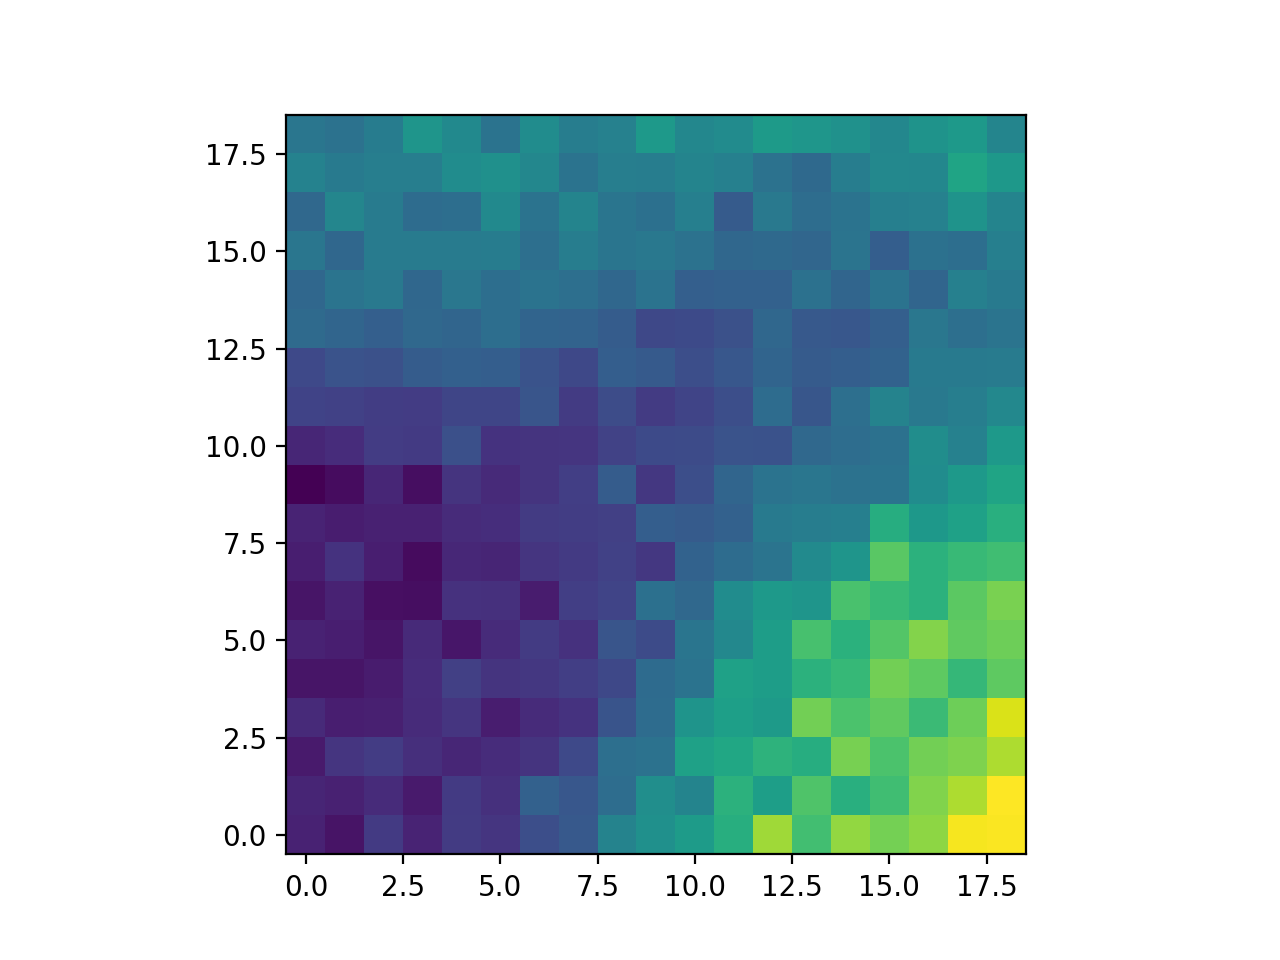

<IPython.core.display.Javascript object>


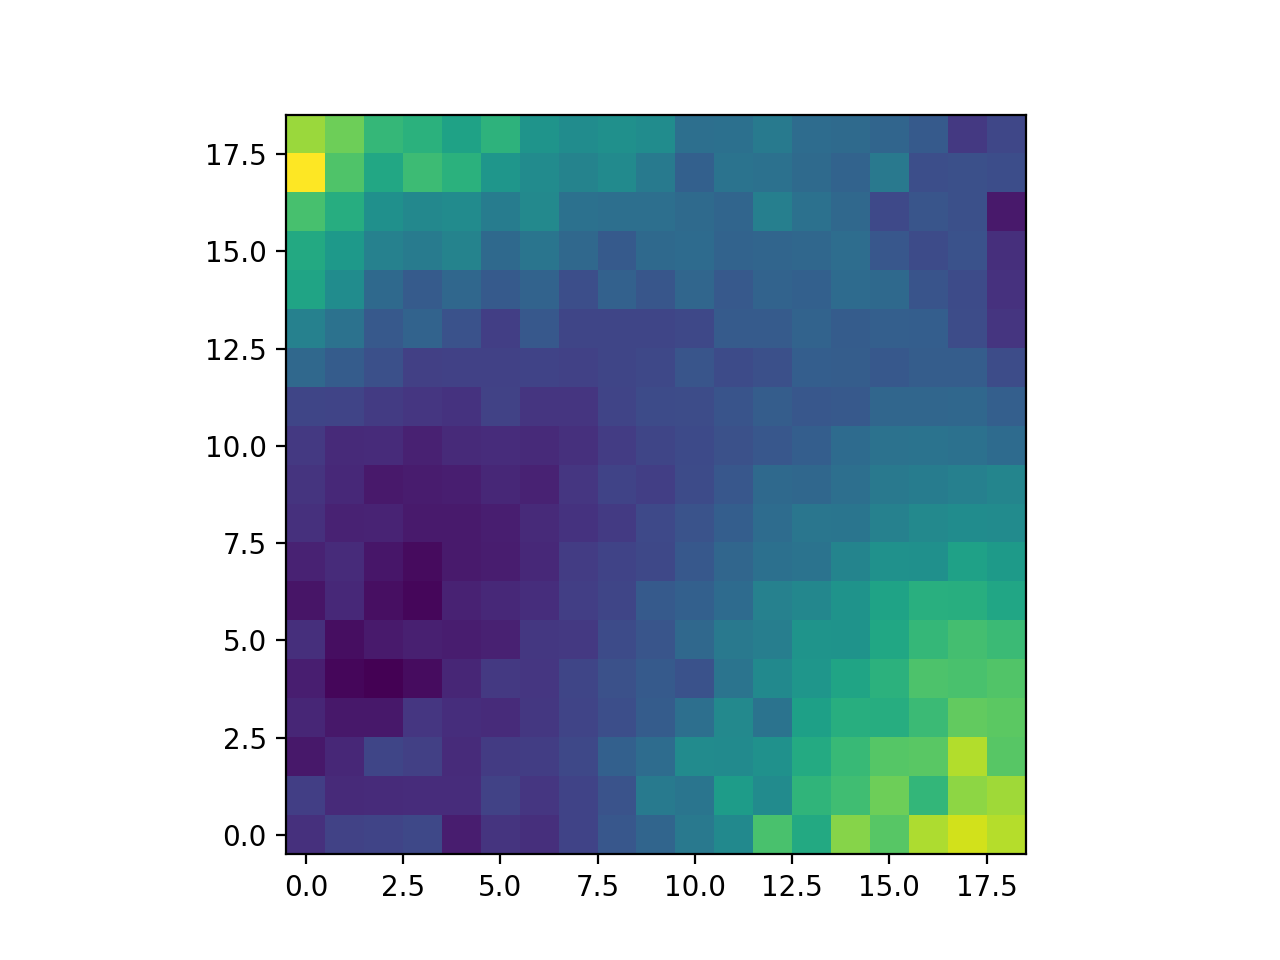

<IPython.core.display.Javascript object>


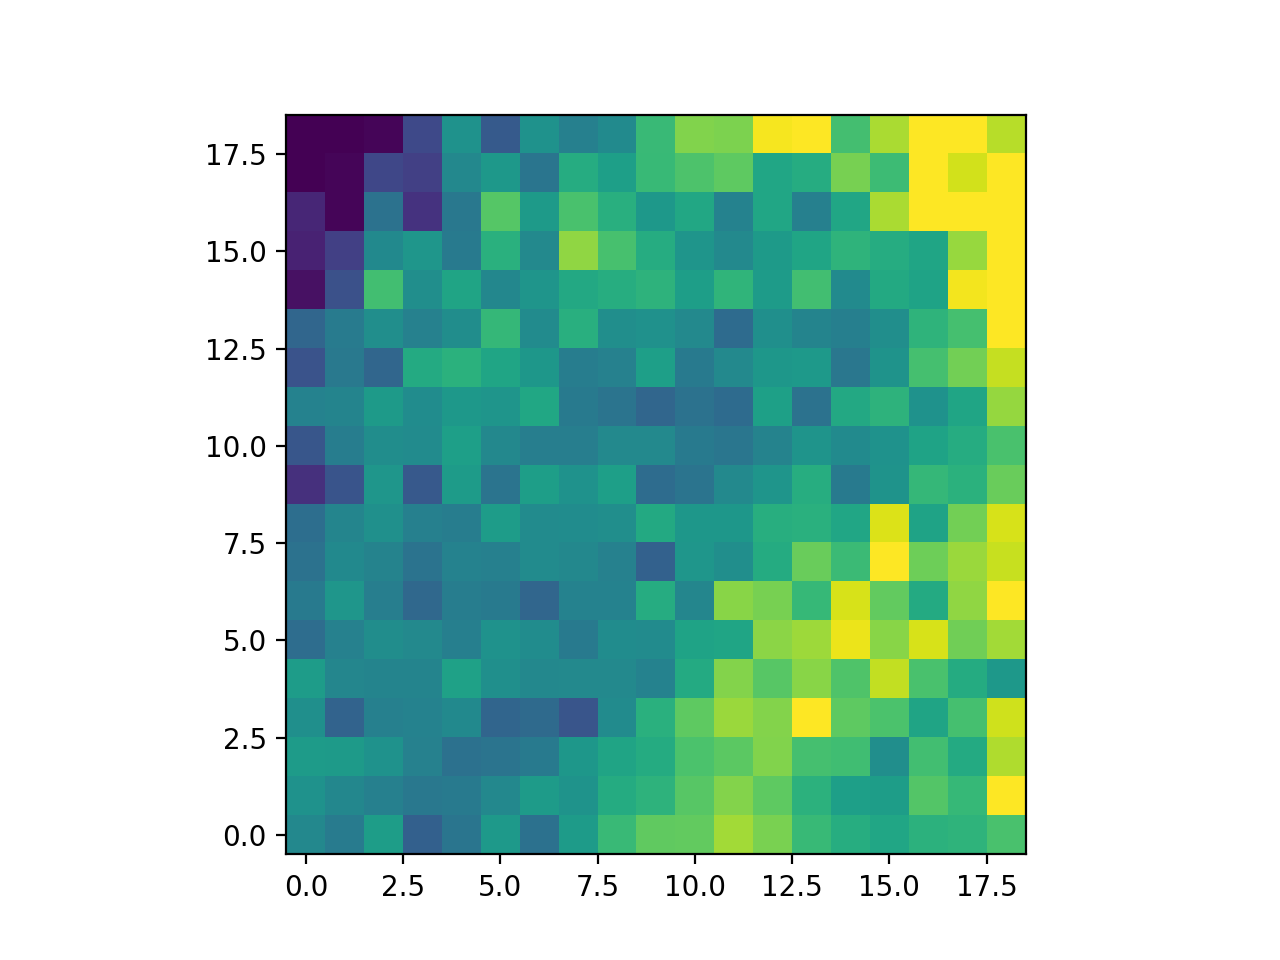

In [6]:
df = pd.concat([pd.DataFrame(s) for s in shapes])
from ziff.stats import BinnedStatistic
%matplotlib notebook
df['resT'] = df['T_data'] - df['T_model']
bs = BinnedStatistic(df, groupby = ('name'))
bins_u, bins_v, hist = bs.get_spatial_bs('T_data_normalized')
fig, ax = P.subplots()
ax.imshow(hist.T,origin='lower')
bins_u, bins_v, hist = bs.get_spatial_bs('T_model_normalized')
fig, ax = P.subplots()
ax.imshow(hist.T,origin='lower')
bins_u, bins_v, hist = bs.get_spatial_bs('resT')
fig, ax = P.subplots()
ax.imshow(hist.T,origin='lower',vmin=-0.02, vmax = 0.02)


# REAL MAP

<IPython.core.display.Javascript object>


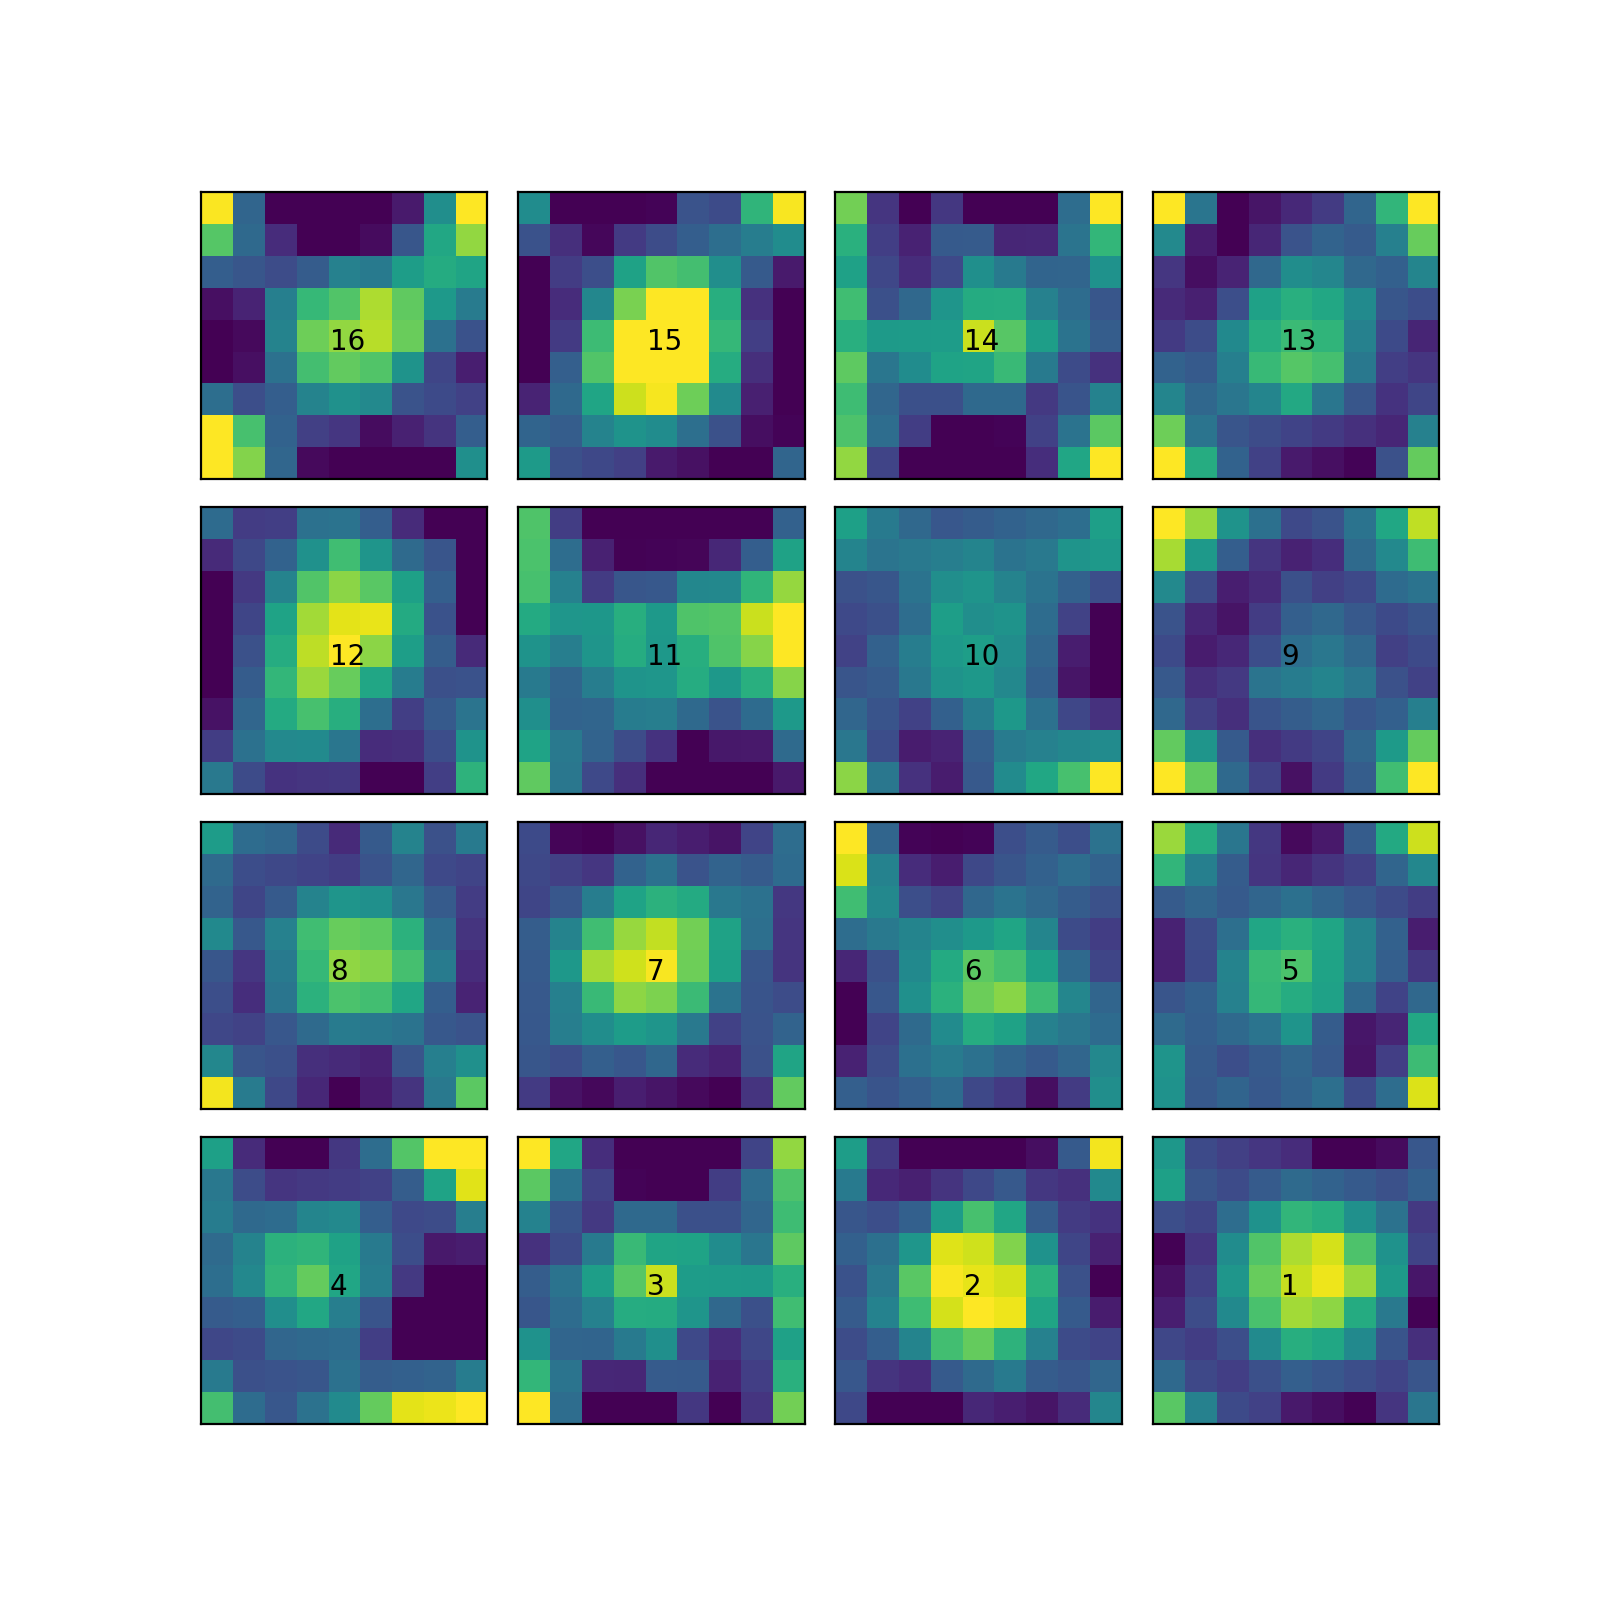

In [24]:
path = '/Users/graziani/libs/Ziff/ziff/data/'
names = {1:'12451-09-01',2:'12451-02-01',3:'10353-17-01',4:'12472-08-01',5:'13422-15-01',6:'13481-02-01',7:'13451-13-01',
         8:'13422-20-01',9:'13451-22-01',10:'13422-19-01',11:'13413-01-01',12:'13481-12-01',13:'12423-04-01',14:'10353-17-01',
         15:'10353-02-01',16:'12461-15-01'}
suffix = '_post-burnin_flatness.xls'
import numpy as np

rotated = [1,2,5,6,9,10,13,14]
def read_file(filename='/Users/graziani/libs/Ziff/ziff/data/10353-02-01_post burnin_flatness.xls'):
    df = pd.read_excel(filename,header=15,usecols='L:N',nrows=81,names='X Y Z'.split())
    df = pd.read_excel(filename,header=15,usecols='T:V',nrows=81,names='X Y Z'.split())
    return df

def read_plane(filename):
    df = pd.read_excel(filename,header=15,usecols='Z:AI',nrows=9,index_col=0)
    return df

def plot_plane(df,ax = None):
    if ax is None:
        fig, ax = P.subplots()
    s = ax.imshow(df.values.T,origin='lower')
    P.colorbar(s)
    return ax
    
def plot_thickness():
    fig, axes = P.subplots(4,4,figsize=(8,8),gridspec_kw={'hspace':0.1,'wspace':0.1})
    for i in range(4):
        for j in range(4):
            ccdindex = i+1+4*j
            y = 3-j
            x = 3-i #3-j
            df = read_plane(path + names[ccdindex] + suffix)
            # In order x,y needs to inverse x,y that's why there is a .T
            values = np.rot90(df.values,2)
            if ccdindex in rotated:
                #If rotated there is a 180deg rotation
                values = np.rot90(values,2)
            # Centering on 0
            #z = df['Z'] - N.median(df['Z'])
            #vmax = N.max(N.abs(z))    
            #vmax = 0.02
            #s = axes[y,x].scatter(df['ra'],df['dec'],c=z,vmin=-vmax,vmax=vmax,marker='s',s=130)
            
            #Now the .T is because usual axis=0 means y in numpy
            s = axes[y,x].imshow(values.T,origin='lower',vmin=-4,vmax=7,extent=(0,100,0,100))
            #fig.colorbar(s,ax=axes[y,x])
            axes[y,x].text(45,45,'{}'.format(ccdindex))
            #axes[y,x].set_title('{}'.format(ccdindex))
            axes[y,x].get_xaxis().set_visible(False)
            axes[y,x].get_yaxis().set_visible(False)

    return fig, axes
%matplotlib notebook
fig, axes = plot_thickness()
fig.savefig('/Users/graziani/temp/ccd_thickness.pdf')


In [6]:
X = -0.402,11.2,22.8,34.4,46,57.6,69.2,80.8,92.401
Y = 0.501,12.401,24.301,36.201,48.101,60.001,71.901,83.801,95.701

Z = [[7,1,-3,-6,-7,-8,-6,-4,-0],
[3,1,-1,-2,-2,-3,-3,-4,-4],
[-1,-0,1,3,3,3,1,-1,-5],
[-1,-1,4,7,8,7,5,0,-4],
[-4,-1,4,7,9,8,7,1,-3],
[-5,-2,2,5,7,9,6,2,-2],
[-5,-4,-1,1,4,4,2,1,-2],
[-4,-3,-2,-3,-2,-1,-0,-1,-1],
[1,-1,-5,-6,-6,-4,-3,-0,2]]

<IPython.core.display.Javascript object>


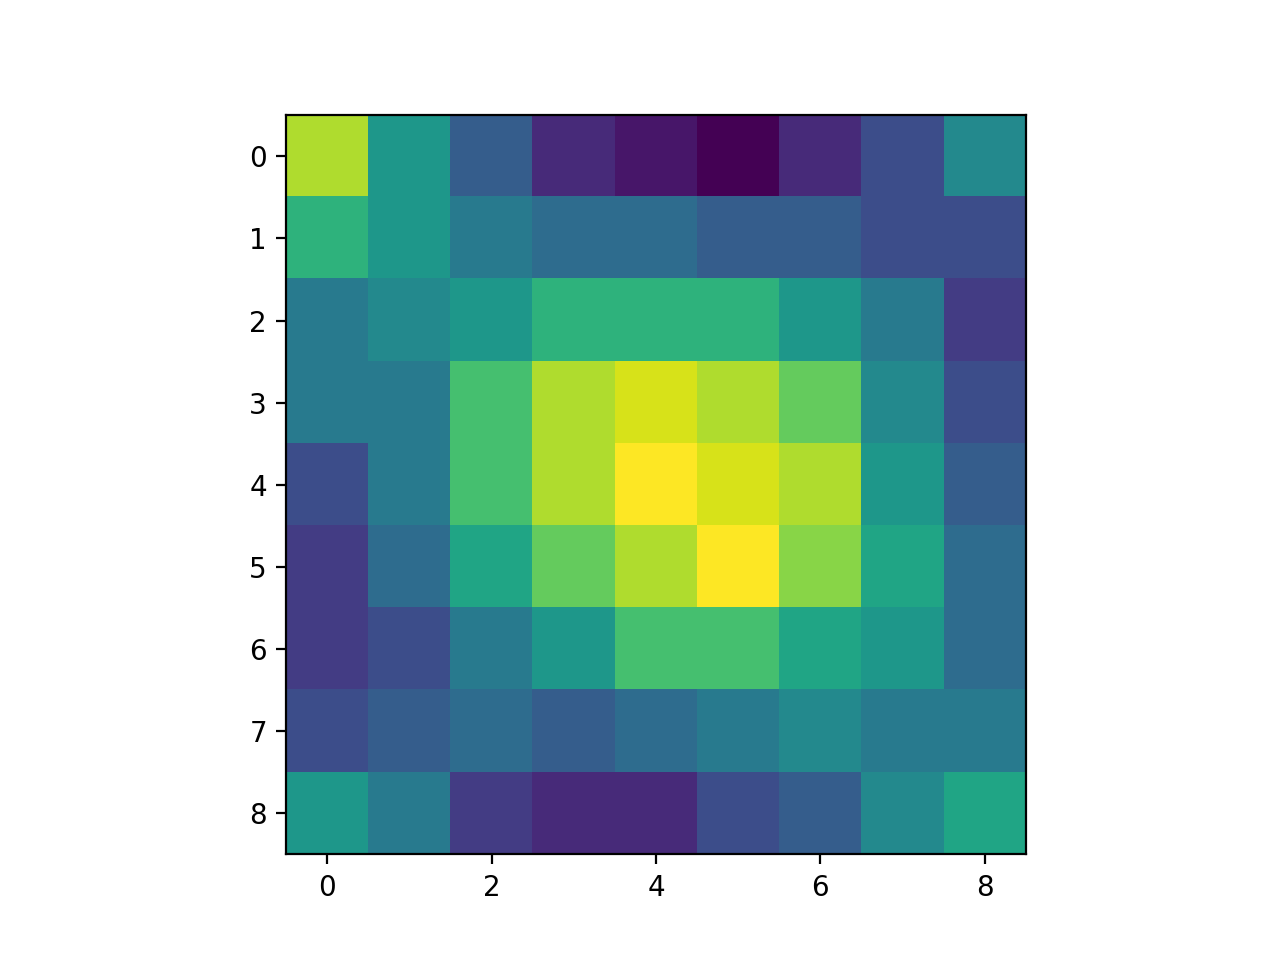

In [7]:
fig, ax = P.subplots()
ax.imshow(Z)

         -0.402     11.200    22.800    34.400    46.000    57.600    69.200  \
0.501   6.900448  1.356395 -3.183945 -5.724058 -7.264397 -7.804963 -6.345303   
12.401  3.206022  0.660112 -0.882085 -2.420341 -1.960907 -2.501246 -3.041586   
24.301 -1.490261 -0.036171  1.423490  2.883377  3.343037  2.802698  1.262131   
36.201 -1.188400 -0.732227  3.727207  7.187094  7.646754  7.106188  4.566075   
48.101 -3.884683 -1.428737  4.030924  7.490811  8.950471  8.408275  6.869566   
60.001 -4.580966 -2.124793  2.334868  4.796385  7.254189  8.711992  6.173283   
71.901 -5.275392 -3.821076 -1.361415  1.098245  3.559763  4.017340  2.475143   
83.801 -3.971675 -2.517585 -2.057925 -2.598038 -2.138377 -0.680800 -0.219283   
95.701  1.332042 -1.215498 -4.754207 -6.294320 -5.834660 -4.377083 -2.915566   

          80.800    92.401  
0.501  -3.885416 -0.427612  
12.401 -3.581925 -4.123895  
24.301 -1.277982 -4.820178  
36.201  0.025509 -3.514604  
48.101  1.331310 -3.212744  
60.001  1.631313 -1.90717

<IPython.core.display.Javascript object>


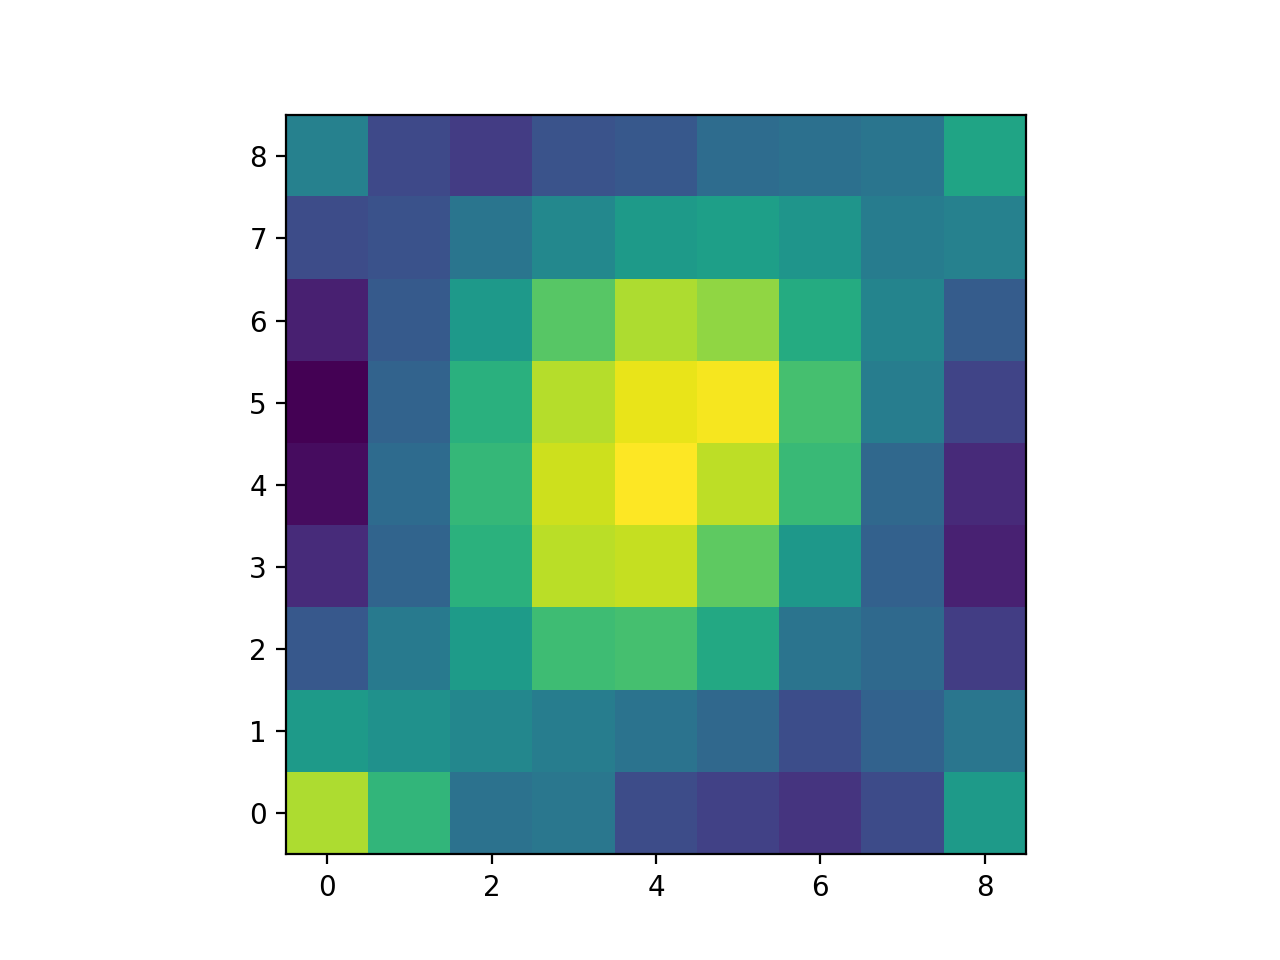

In [15]:
filename='/Users/graziani/libs/Ziff/ziff/data/10353-02-01_post-burnin_flatness.xls'
df = pd.read_excel(filename,header=15,usecols='Z:AI',nrows=9,index_col=0)
print(df)
fig, ax = P.subplots()
ax.imshow(df.values.T,origin='lower')

In [ ]:
a = N.arange()